# Advanced Regression assignment

## Importing necessary libraries and supressing warnings

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

## EDA

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [5]:
df.shape

(1460, 81)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
df_null_count = df.isna().sum().reset_index()

In [8]:
df_null_count.columns = ['Variable','Null_Count']

In [9]:
df_null_count.head()

Variable  Null_Count
0           Id           0
1   MSSubClass           0
2     MSZoning           0
3  LotFrontage         259
4      LotArea           0

## Treating Null Values

In [10]:
df_null_count['Null_Percentage'] = round((df_null_count['Null_Count']/df.shape[0])*100,2)

In [11]:
df_null_count[df_null_count['Null_Percentage']>=75]

Variable  Null_Count  Null_Percentage
6         Alley        1369            93.77
72       PoolQC        1453            99.52
73        Fence        1179            80.75
74  MiscFeature        1406            96.30

In [12]:
df_null_count[(df_null_count['Null_Percentage']>=50) & (df_null_count['Null_Percentage']<75)]

Variable  Null_Count  Null_Percentage
25  MasVnrType         872            59.73

In [13]:
df_null_count[(df_null_count['Null_Percentage']>=20) & (df_null_count['Null_Percentage']<50)]

Variable  Null_Count  Null_Percentage
57  FireplaceQu         690            47.26

In [14]:
df_null_count[(df_null_count['Null_Percentage']>0) & (df_null_count['Null_Percentage']<20)]

Variable  Null_Count  Null_Percentage
3    LotFrontage         259            17.74
26    MasVnrArea           8             0.55
30      BsmtQual          37             2.53
31      BsmtCond          37             2.53
32  BsmtExposure          38             2.60
33  BsmtFinType1          37             2.53
35  BsmtFinType2          38             2.60
42    Electrical           1             0.07
58    GarageType          81             5.55
59   GarageYrBlt          81             5.55
60  GarageFinish          81             5.55
63    GarageQual          81             5.55
64    GarageCond          81             5.55

In [15]:
df.shape

(1460, 81)

## Dropping variables based on their null percentage 

In [16]:
null_75 = df_null_count[df_null_count['Null_Percentage']>=75]
null_50_75 = df_null_count[(df_null_count['Null_Percentage']>=50) & (df_null_count['Null_Percentage']<75)]
null_20_50 = df_null_count[(df_null_count['Null_Percentage']>=20) & (df_null_count['Null_Percentage']<50)]
null_0_20 = df_null_count[(df_null_count['Null_Percentage']>0) & (df_null_count['Null_Percentage']<20)]

In [17]:
df[null_75['Variable']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Alley        91 non-null     object
 1   PoolQC       7 non-null      object
 2   Fence        281 non-null    object
 3   MiscFeature  54 non-null     object
dtypes: object(4)
memory usage: 45.8+ KB


In [18]:
df[null_50_75['Variable']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   MasVnrType  588 non-null    object
dtypes: object(1)
memory usage: 11.5+ KB


In [19]:
df[null_20_50['Variable']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   FireplaceQu  770 non-null    object
dtypes: object(1)
memory usage: 11.5+ KB


In [20]:
df[null_0_20['Variable']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   MasVnrArea    1452 non-null   float64
 2   BsmtQual      1423 non-null   object 
 3   BsmtCond      1423 non-null   object 
 4   BsmtExposure  1422 non-null   object 
 5   BsmtFinType1  1423 non-null   object 
 6   BsmtFinType2  1422 non-null   object 
 7   Electrical    1459 non-null   object 
 8   GarageType    1379 non-null   object 
 9   GarageYrBlt   1379 non-null   float64
 10  GarageFinish  1379 non-null   object 
 11  GarageQual    1379 non-null   object 
 12  GarageCond    1379 non-null   object 
dtypes: float64(3), object(10)
memory usage: 148.4+ KB


In [21]:
df['MasVnrType'].value_counts(normalize = True)

MasVnrType
BrkFace    0.756803
Stone      0.217687
BrkCmn     0.025510
Name: proportion, dtype: float64

In [22]:
df['FireplaceQu'].value_counts(normalize = True)

FireplaceQu
Gd    0.493506
TA    0.406494
Fa    0.042857
Ex    0.031169
Po    0.025974
Name: proportion, dtype: float64

In [23]:
df.drop(null_75['Variable'],axis = 1,inplace = True)

In [24]:
df.shape

(1460, 77)

In [25]:
df.drop(null_50_75['Variable'],axis = 1,inplace = True)

In [26]:
df.drop(null_20_50['Variable'],axis = 1,inplace = True)

In [27]:
df_null_count = df.isna().sum().reset_index()

In [28]:
df_null_count.columns = ['Variable','Null_Count']

## Dataframe after removing null values

In [29]:
df.shape

(1460, 75)

In [30]:
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 75, dtype: int64

In [31]:
df.dropna(inplace = True)

In [32]:
df.shape

(1094, 75)

In [33]:
# we are left with 74.9 percent after dropping nulls
1094/1460

0.7493150684931507

In [34]:
df.shape

(1094, 75)

In [35]:
num_cols = list(df.select_dtypes(include= ['int','float']).columns)

In [36]:
cat_cols = list(df.select_dtypes(include = ['object']).columns)

In [37]:
len(cat_cols)

37

## Univariate Analysis

In [38]:
unique_count_dict = {}
for i in cat_cols:
    a = df[i].nunique()
    unique_count_dict[i] = a

In [39]:
len(unique_count_dict)

37

In [40]:
unique_count_dict_limit = {}

for i in cat_cols:
    if unique_count_dict[i]<=15:
        unique_count_dict_limit[i] = unique_count_dict[i]

In [41]:
unique_count_dict_limit

{'MSZoning': 5,
 'Street': 2,
 'LotShape': 4,
 'LandContour': 4,
 'Utilities': 1,
 'LotConfig': 5,
 'LandSlope': 3,
 'Condition1': 9,
 'Condition2': 6,
 'BldgType': 5,
 'HouseStyle': 8,
 'RoofStyle': 5,
 'RoofMatl': 7,
 'Exterior1st': 14,
 'ExterQual': 4,
 'ExterCond': 4,
 'Foundation': 5,
 'BsmtQual': 4,
 'BsmtCond': 4,
 'BsmtExposure': 4,
 'BsmtFinType1': 6,
 'BsmtFinType2': 6,
 'Heating': 4,
 'HeatingQC': 5,
 'CentralAir': 2,
 'Electrical': 5,
 'KitchenQual': 4,
 'Functional': 6,
 'GarageType': 6,
 'GarageFinish': 3,
 'GarageQual': 5,
 'GarageCond': 5,
 'PavedDrive': 3,
 'SaleType': 9,
 'SaleCondition': 6}

In [42]:

cat_cols_limit = (list(unique_count_dict.keys()))

In [43]:
len(cat_cols_limit)

37

In [44]:
len(num_cols)

38

In [45]:
print(num_cols)

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [46]:
df[num_cols].describe().T

count           mean           std      min        25%  \
Id             1094.0     727.375686    420.955488      1.0     366.50   
MSSubClass     1094.0      56.128885     41.976345     20.0      20.00   
LotFrontage    1094.0      70.759598     24.508859     21.0      60.00   
LotArea        1094.0   10132.346435   8212.249621   1300.0    7606.75   
OverallQual    1094.0       6.247715      1.366797      2.0       5.00   
OverallCond    1094.0       5.575868      1.066500      2.0       5.00   
YearBuilt      1094.0    1972.412249     31.189752   1880.0    1953.00   
YearRemodAdd   1094.0    1985.915905     20.930772   1950.0    1967.00   
MasVnrArea     1094.0     109.855576    190.667459      0.0       0.00   
BsmtFinSF1     1094.0     448.191956    468.728095      0.0       0.00   
BsmtFinSF2     1094.0      45.252285    159.075003      0.0       0.00   
BsmtUnfSF      1094.0     606.117002    445.834636      0.0     270.00   
TotalBsmtSF    1094.0    1099.561243    415.851262    105.0     816.00   
1stFlrSF       1094.0    1173.809872    387.677463    438.0     894.00   
2ndFlrSF       1094.0     356.536563    439.260130      0.0       0.00   
LowQualFinSF   1094.0       4.680987     42.099821      0.0       0.00   
GrLivArea      1094.0    1535.027422    526.124028    438.0    1164.00   
BsmtFullBath   1094.0       0.423218      0.514253      0.0       0.00   
BsmtHalfBath   1094.0       0.056673      0.235244      0.0       0.00   
FullBath       1094.0       1.577697      0.550219      0.0       1.00   
HalfBath       1094.0       0.389397      0.500793      0.0       0.00   
BedroomAbvGr   1094.0       2.861974      0.764107      0.0       2.00   
KitchenAbvGr   1094.0       1.033821      0.185841      1.0       1.00   
TotRmsAbvGrd   1094.0       6.570384      1.584486      3.0       5.00   
Fireplaces     1094.0       0.610603      0.633118      0.0       0.00   
GarageYrBlt    1094.0    1978.565814     25.934444   1900.0    1960.00   
GarageCars     1094.0       1.879342      0.658586      1.0       1.00   
GarageArea     1094.0     503.760512    192.261314    160.0     360.00   
WoodDeckSF     1094.0      94.341865    122.624615      0.0       0.00   
OpenPorchSF    1094.0      46.946984     64.820019      0.0       0.00   
EnclosedPorch  1094.0      22.053016     61.570502      0.0       0.00   
3SsnPorch      1094.0       3.266910     29.655973      0.0       0.00   
ScreenPorch    1094.0      16.498172     58.455303      0.0       0.00   
PoolArea       1094.0       3.007313     40.713175      0.0       0.00   
MiscVal        1094.0      23.550274    167.135237      0.0       0.00   
MoSold         1094.0       6.335466      2.694558      1.0       5.00   
YrSold         1094.0    2007.786106      1.334307   2006.0    2007.00   
SalePrice      1094.0  187033.263254  83165.332151  35311.0  132500.00   

                    50%        75%       max  
Id                723.5    1093.75    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        70.0      80.00     313.0  
LotArea          9444.5   11387.25  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1975.0    2003.00    2010.0  
YearRemodAdd     1995.0    2005.00    2010.0  
MasVnrArea          0.0     171.75    1600.0  
BsmtFinSF1        384.5     712.75    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         525.0     846.00    2336.0  
TotalBsmtSF      1023.0    1345.50    6110.0  
1stFlrSF         1097.0    1413.50    4692.0  
2ndFlrSF            0.0     729.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1480.0    1779.00    5642.0  
BsmtFullBath        0.0       1.00       2.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       6.0  
KitchenAbvGr        1.0       1.00       3.0  
T

## Data Visualization

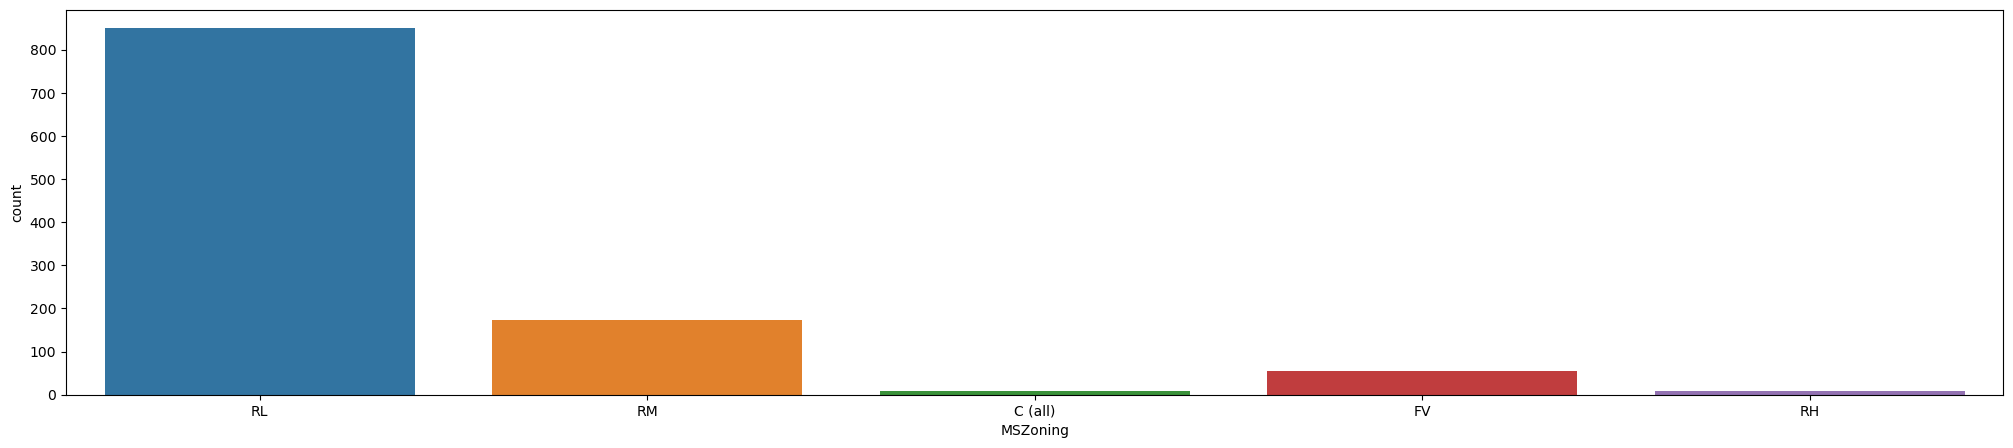

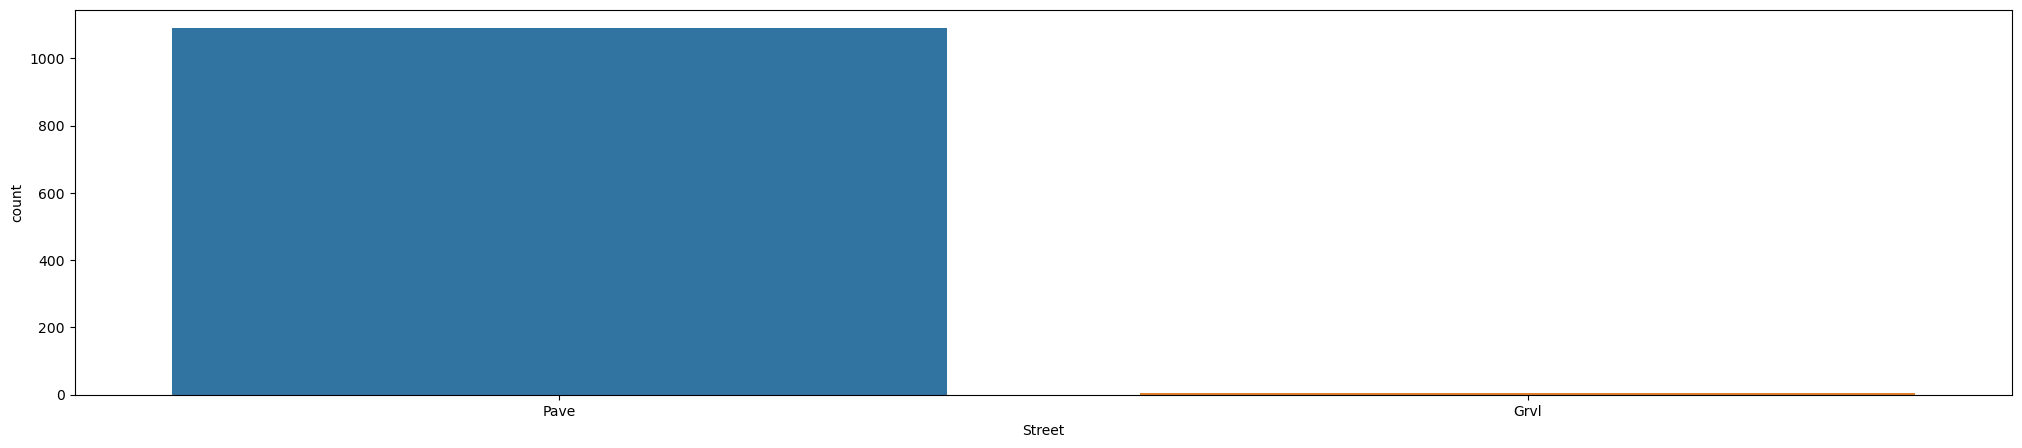

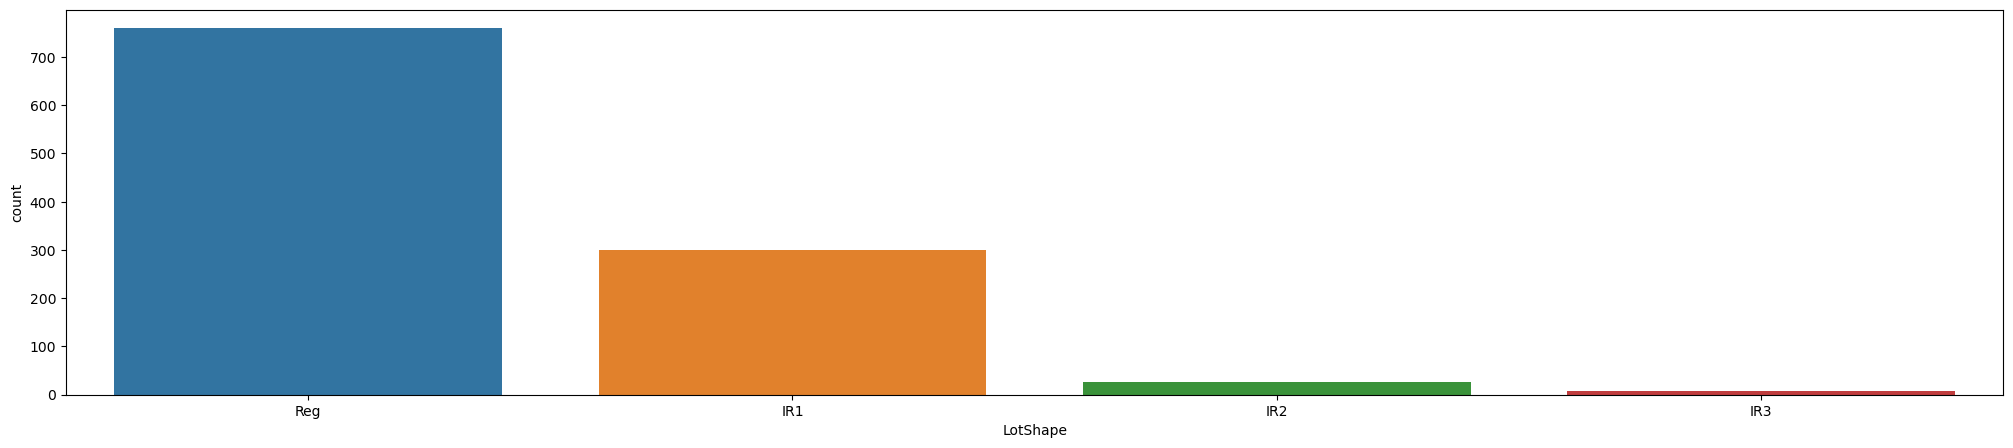

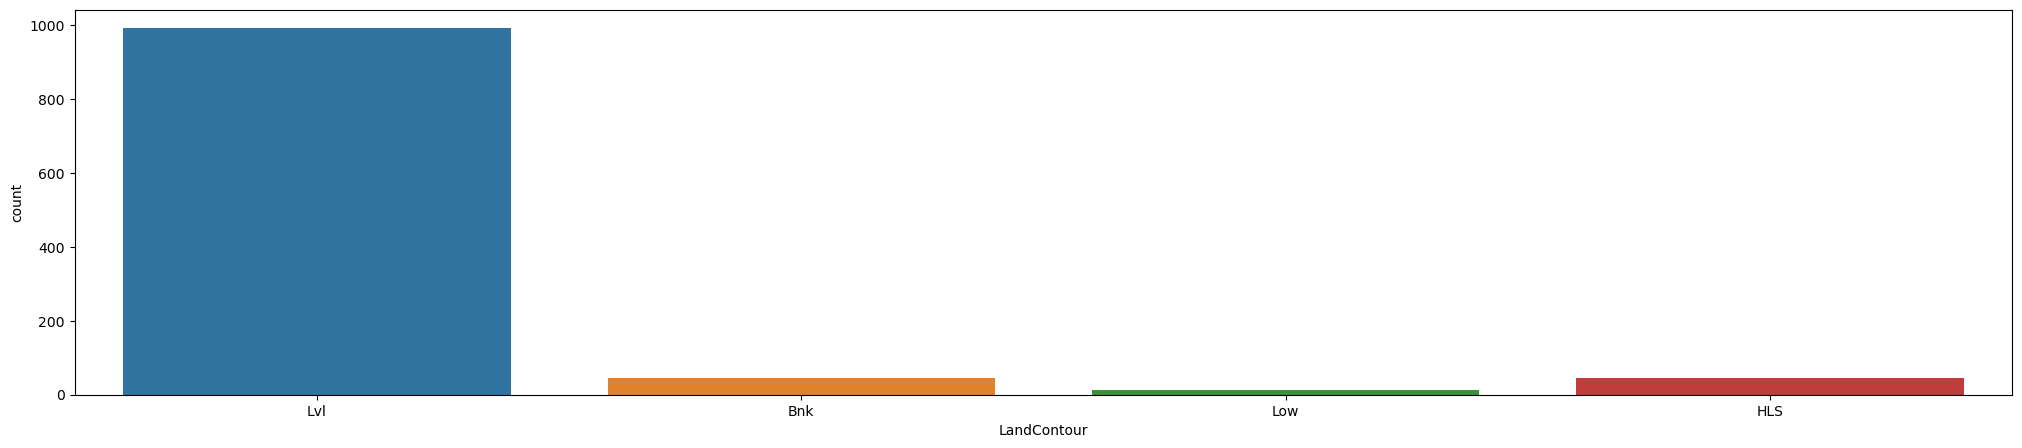

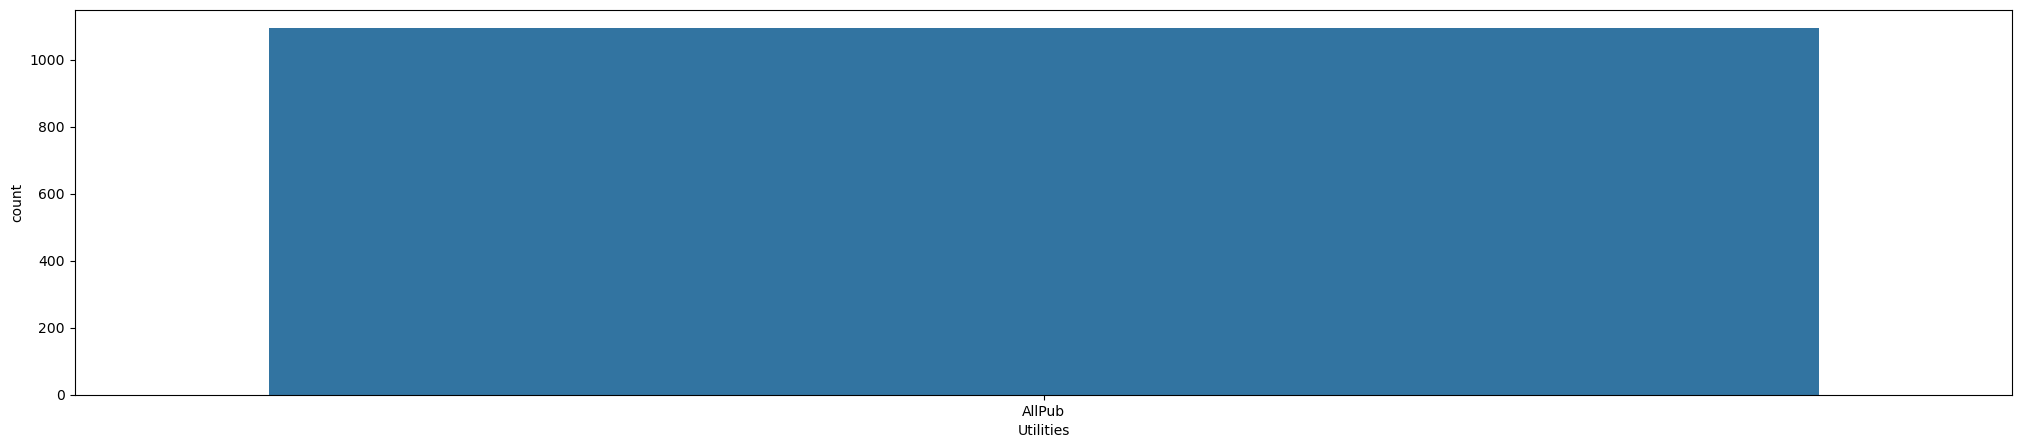

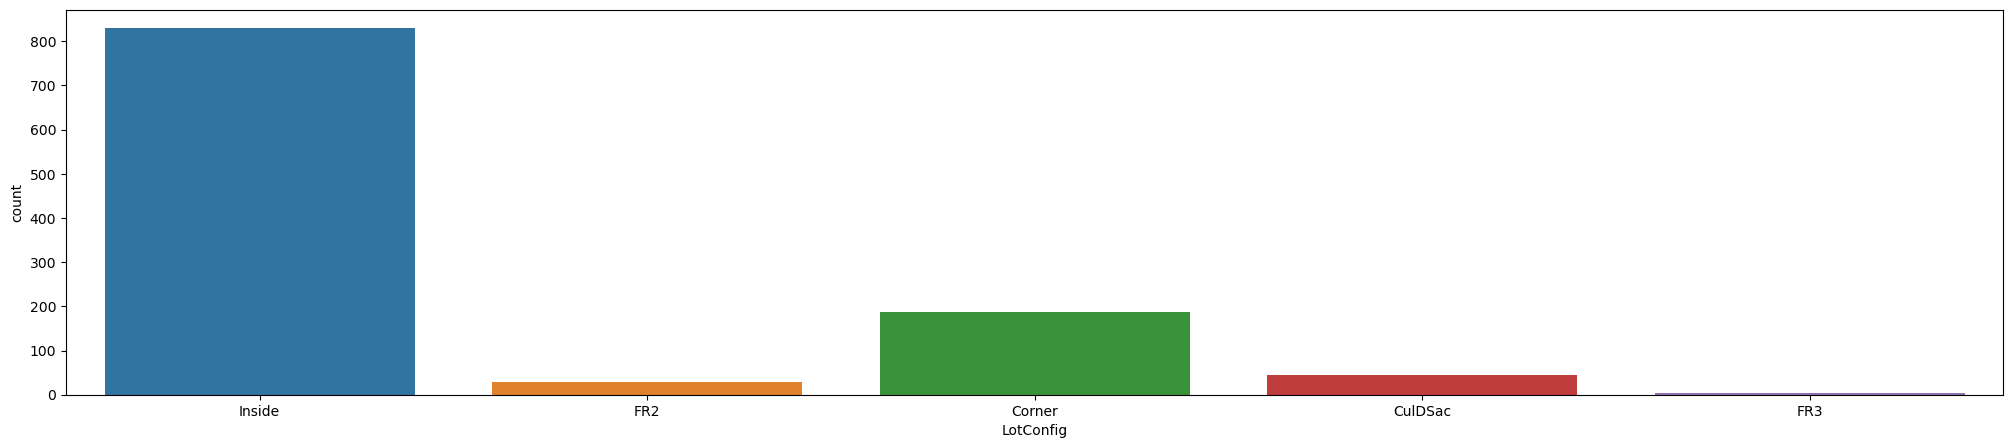

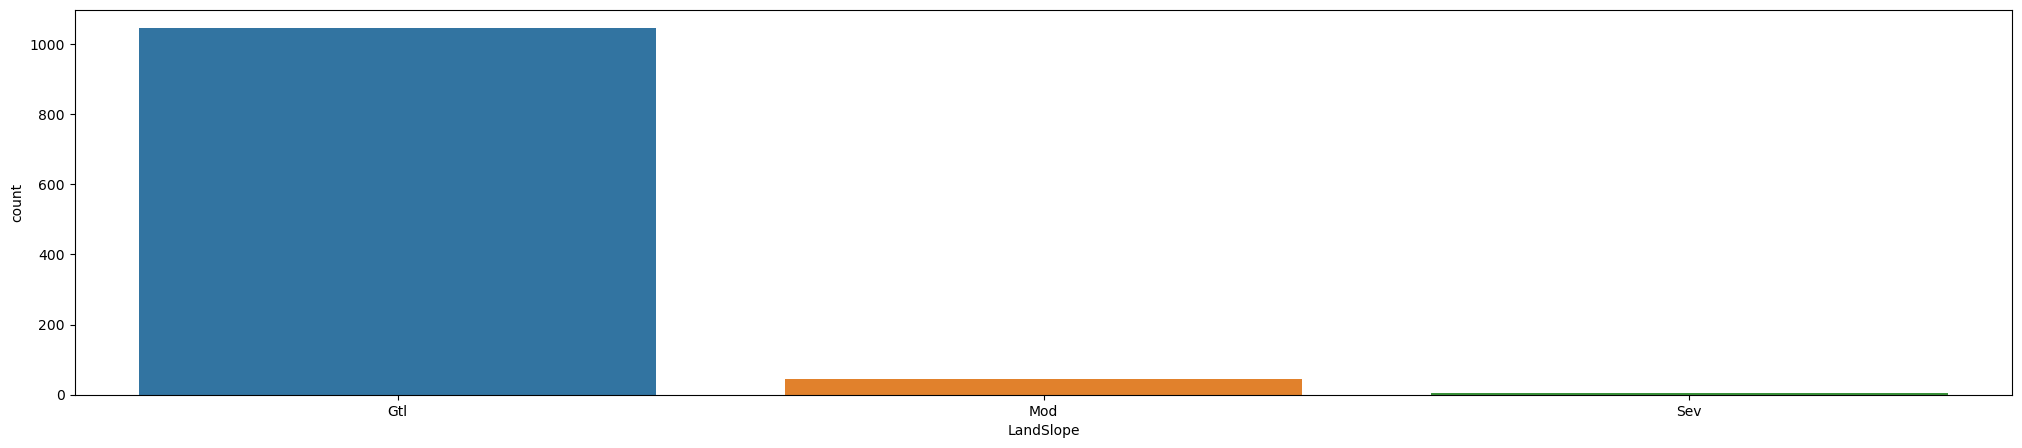

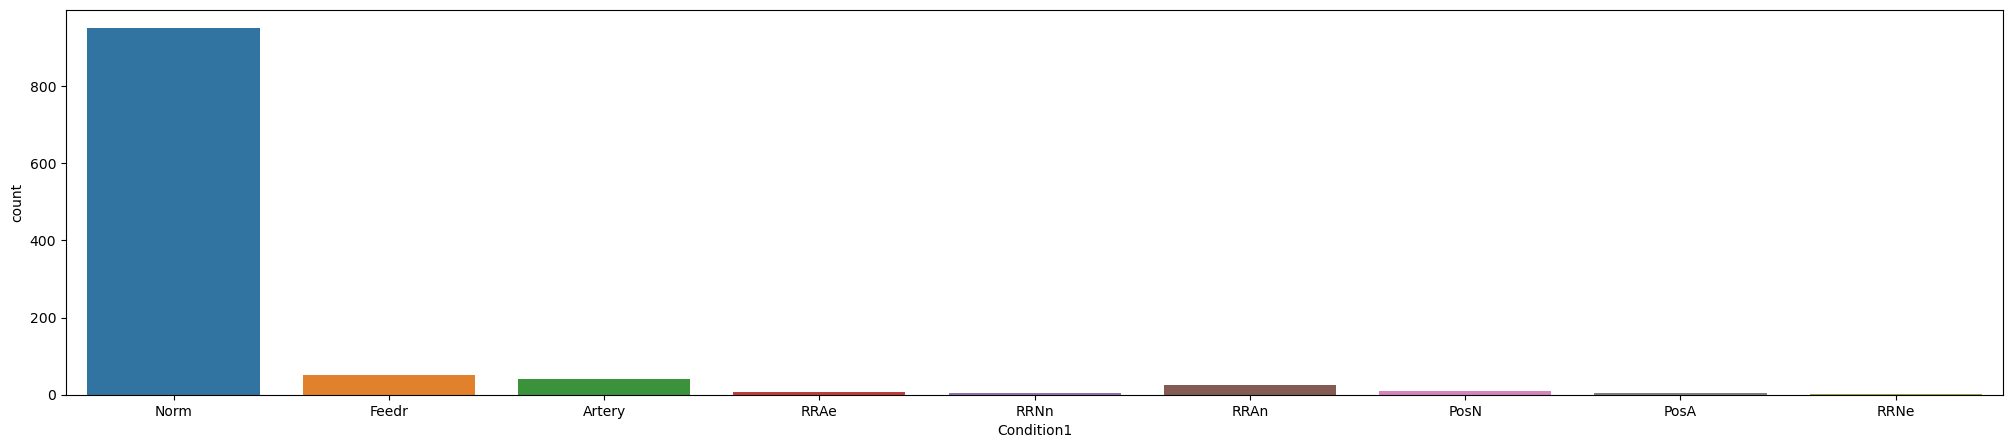

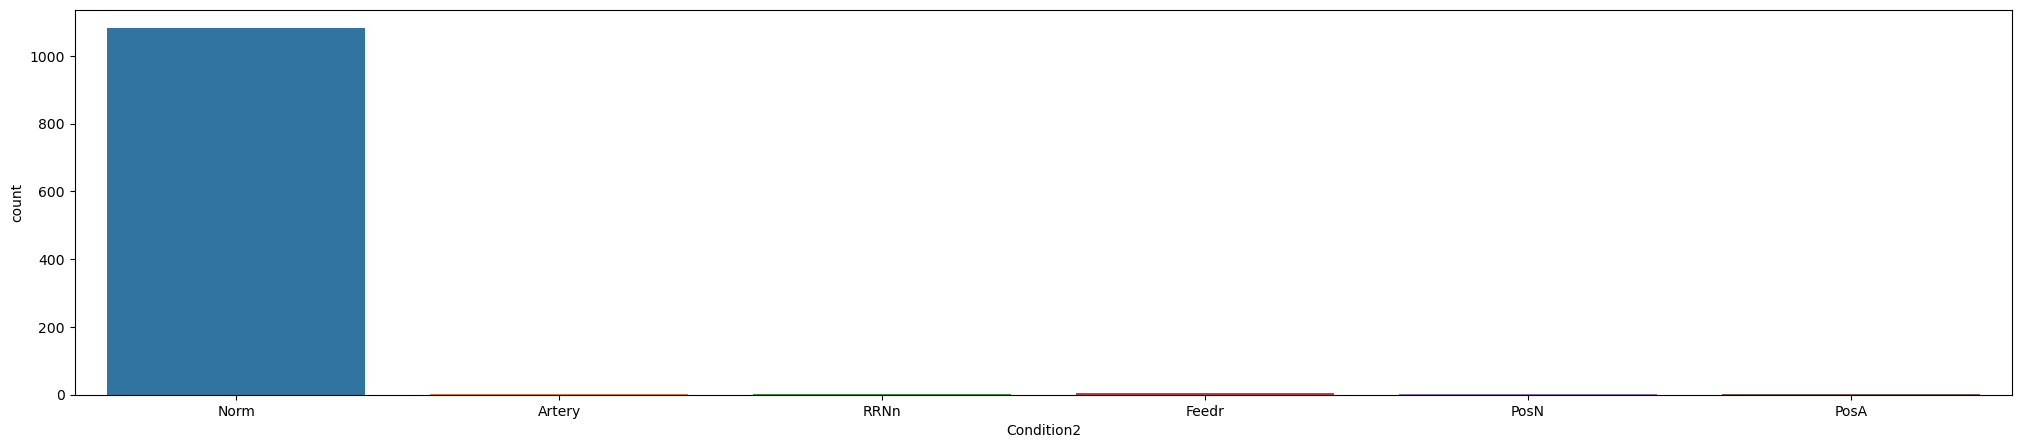

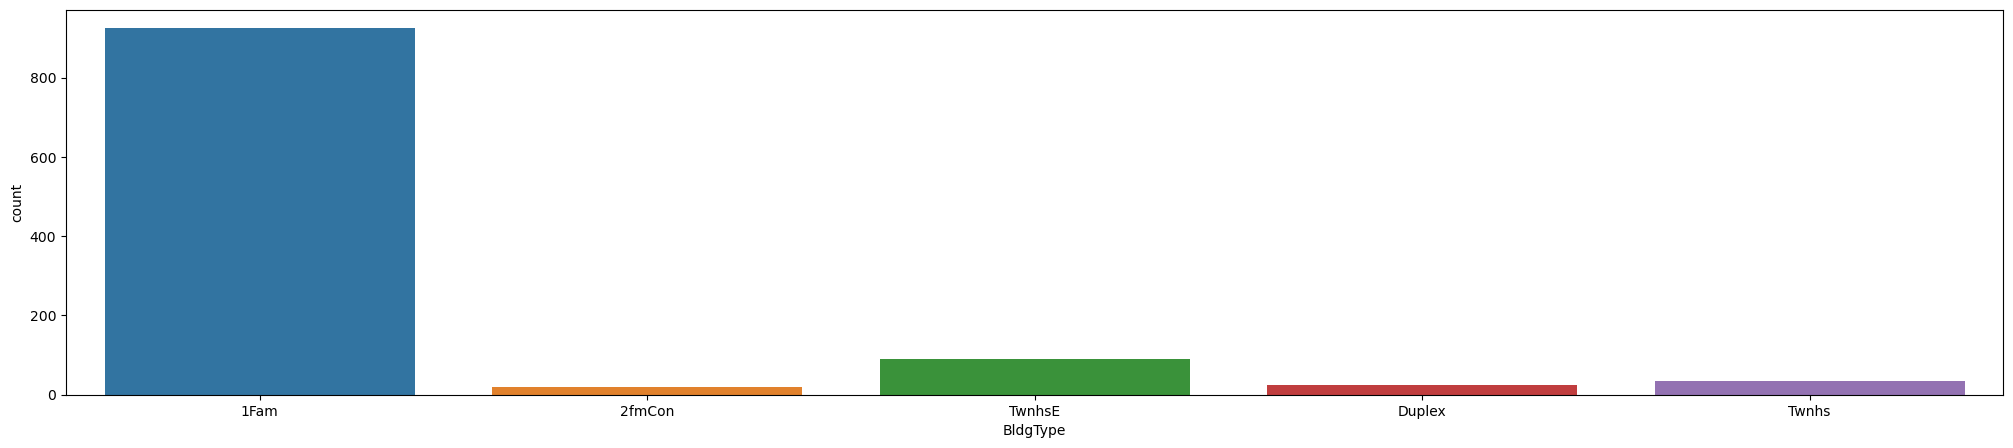

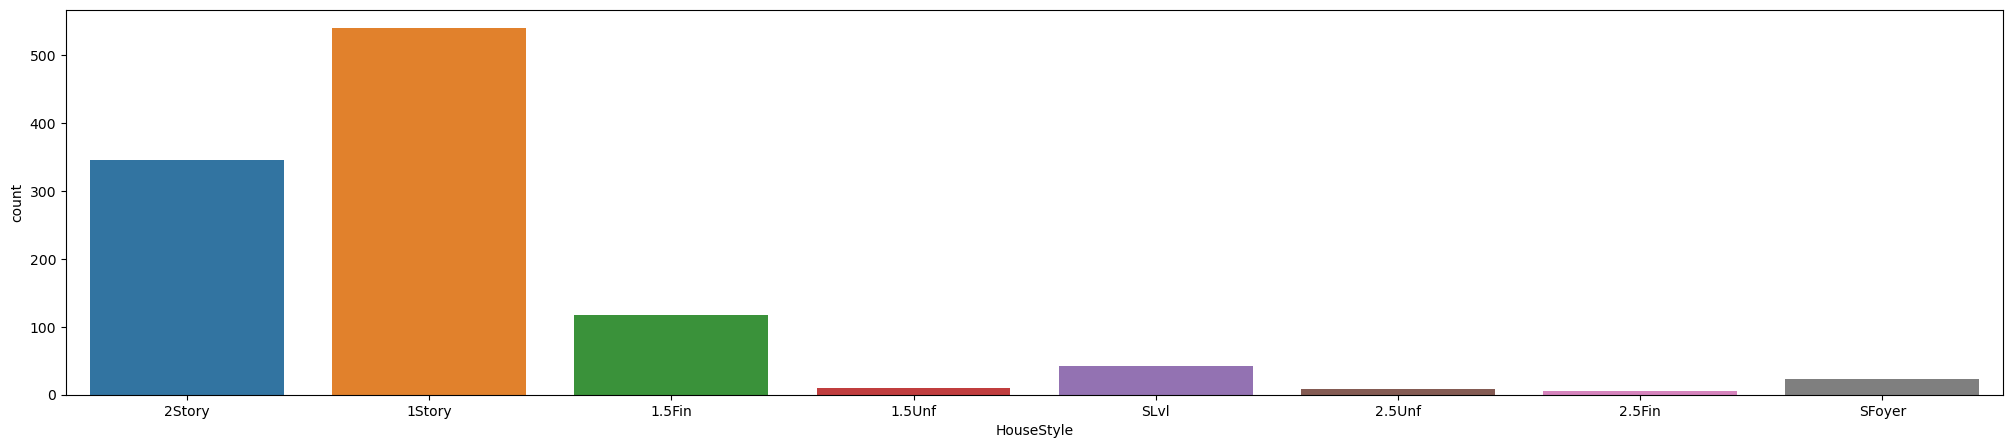

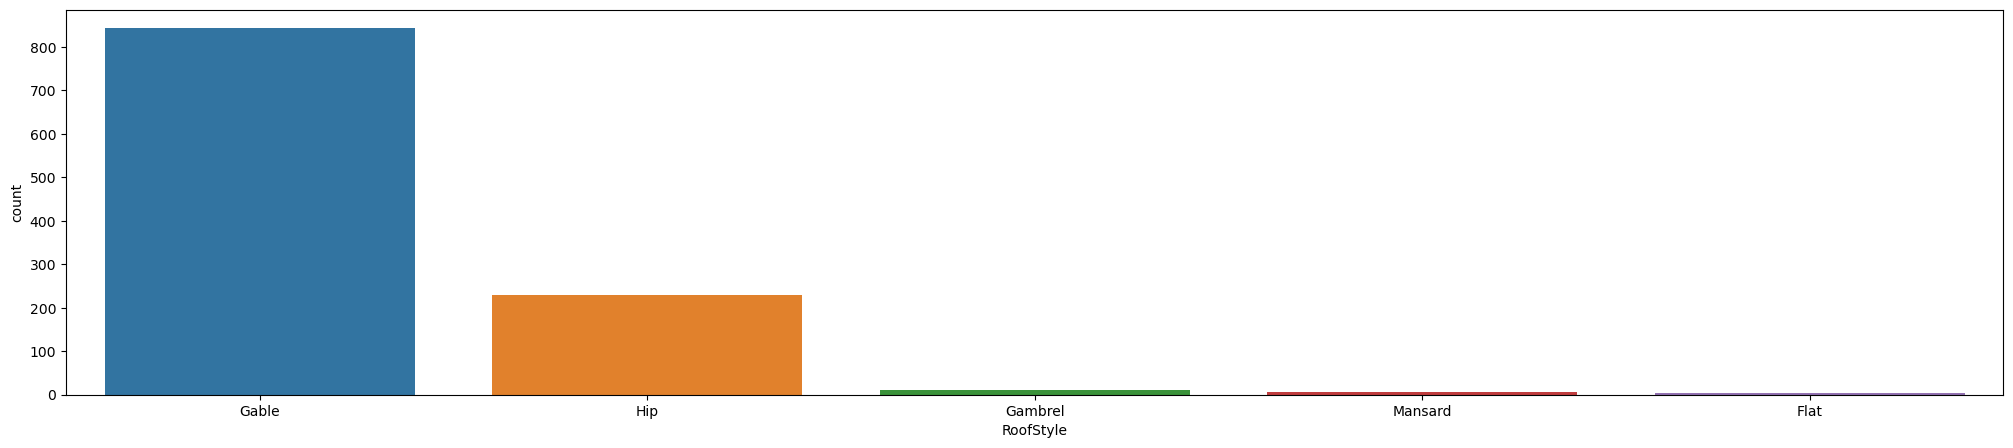

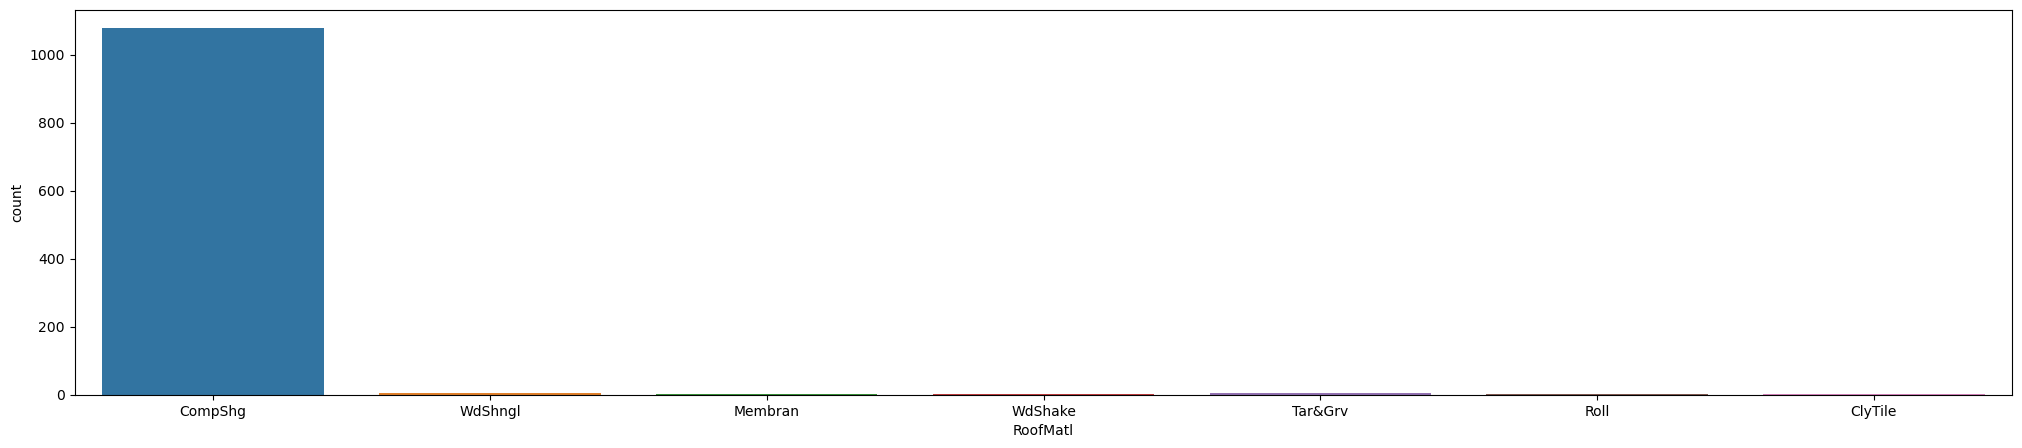

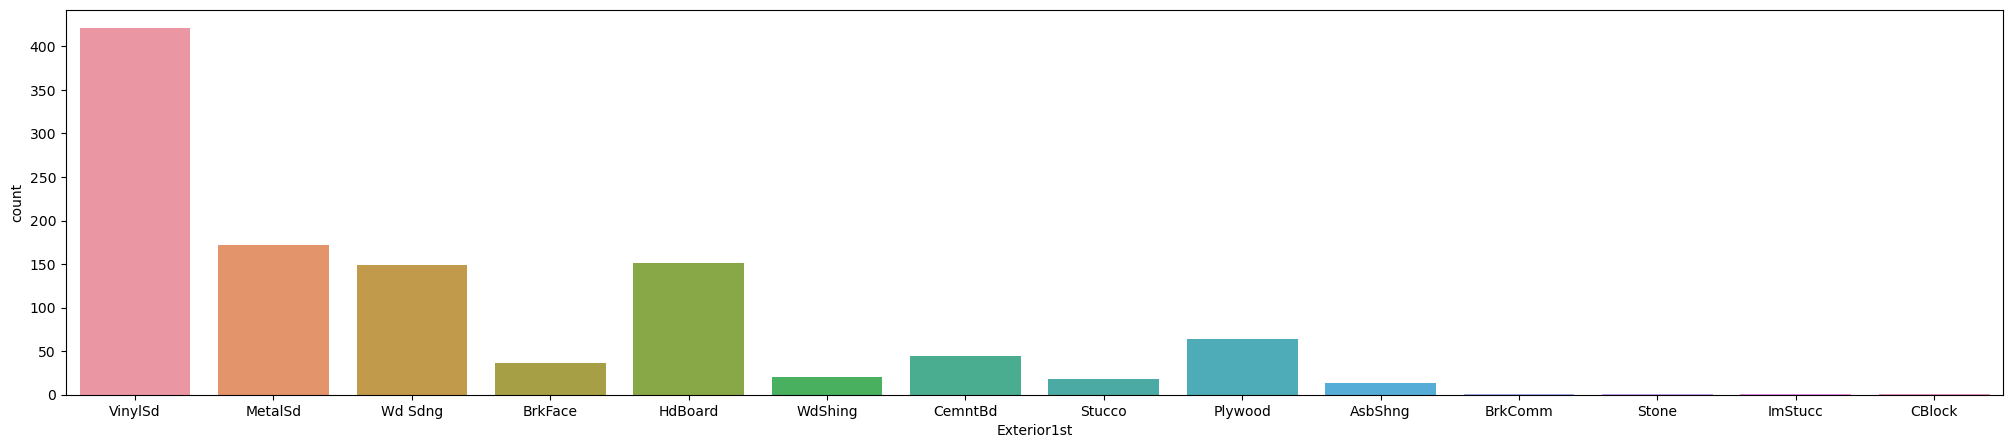

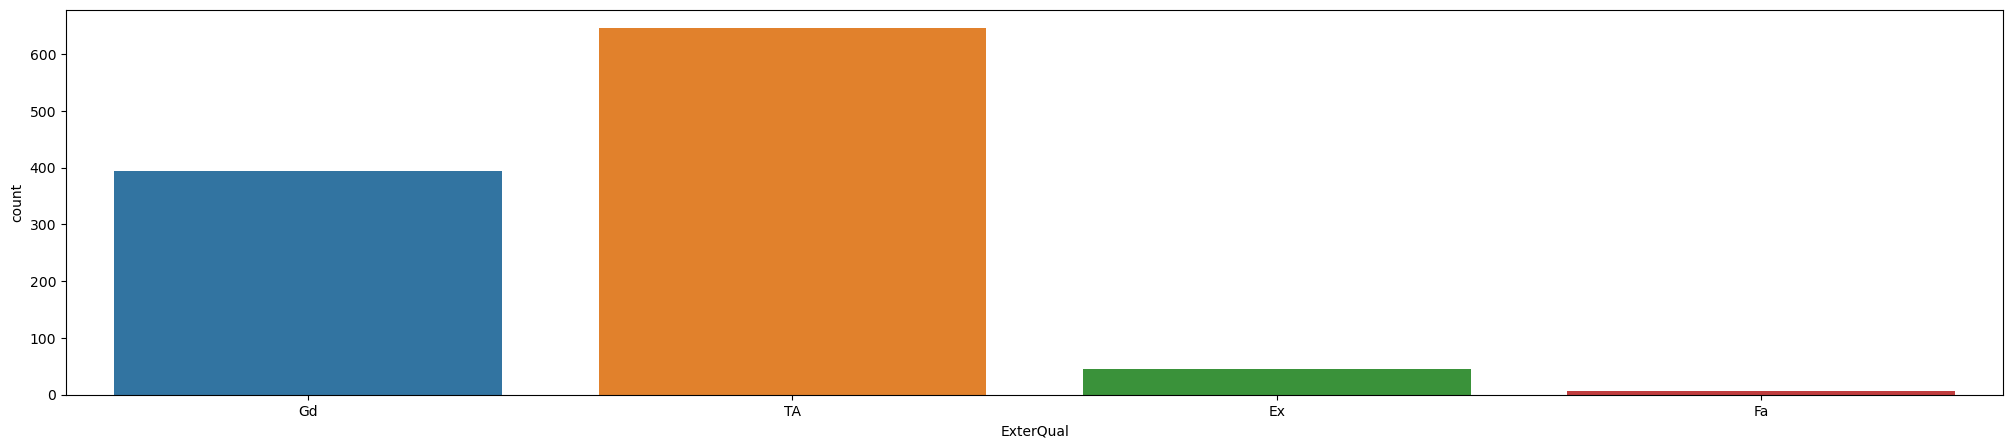

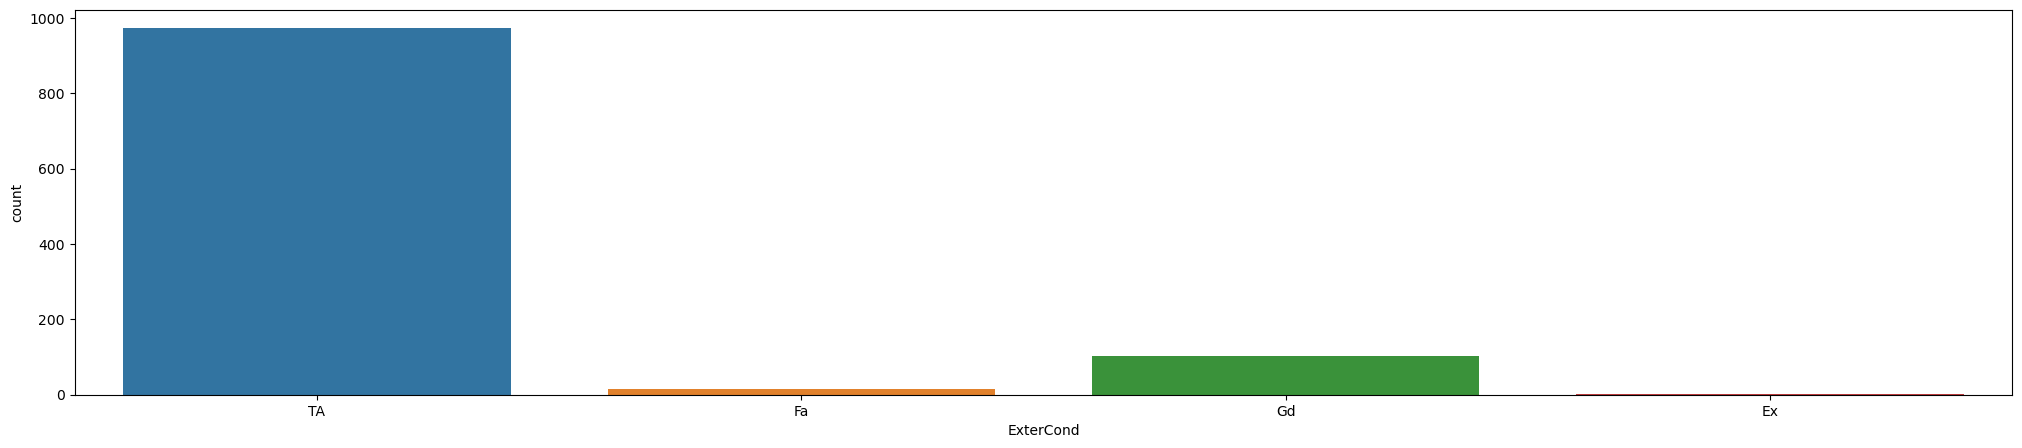

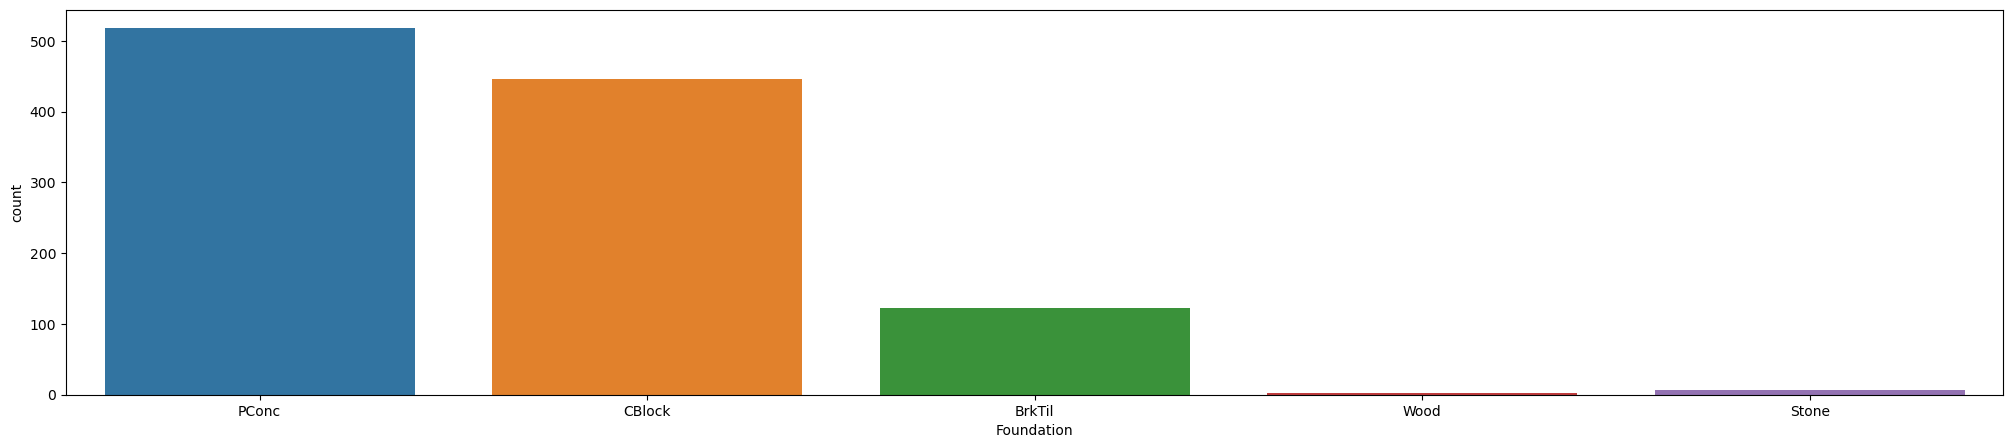

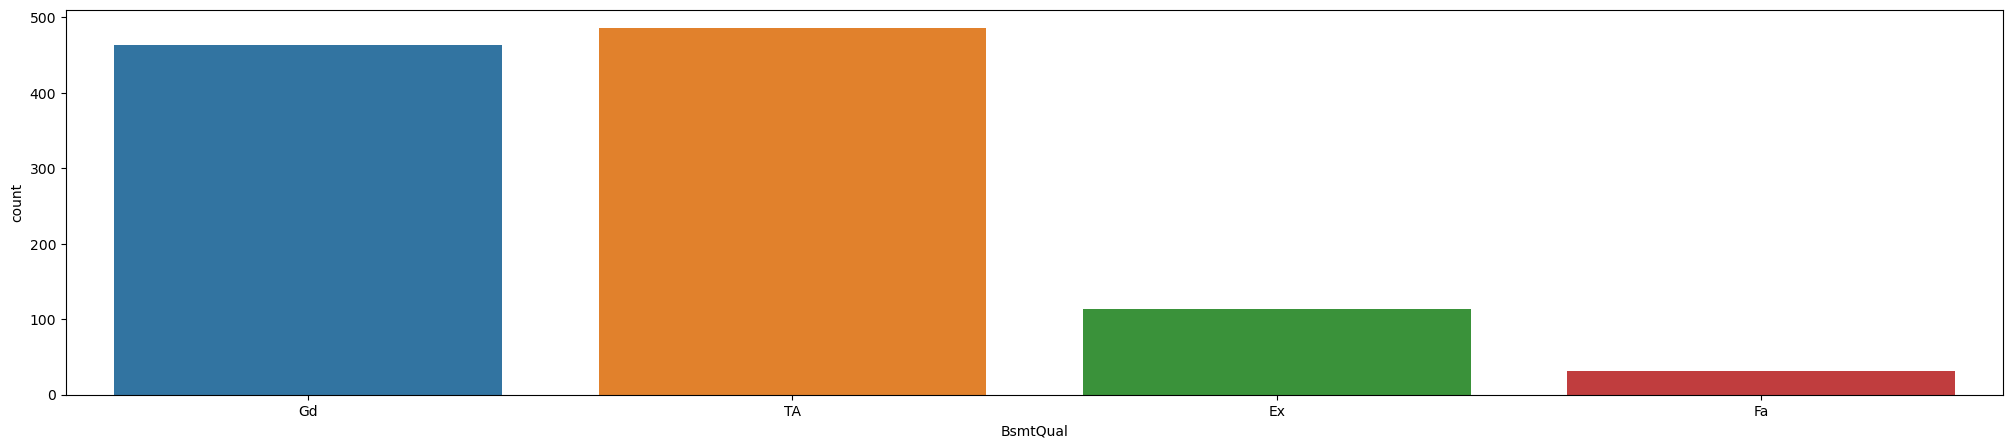

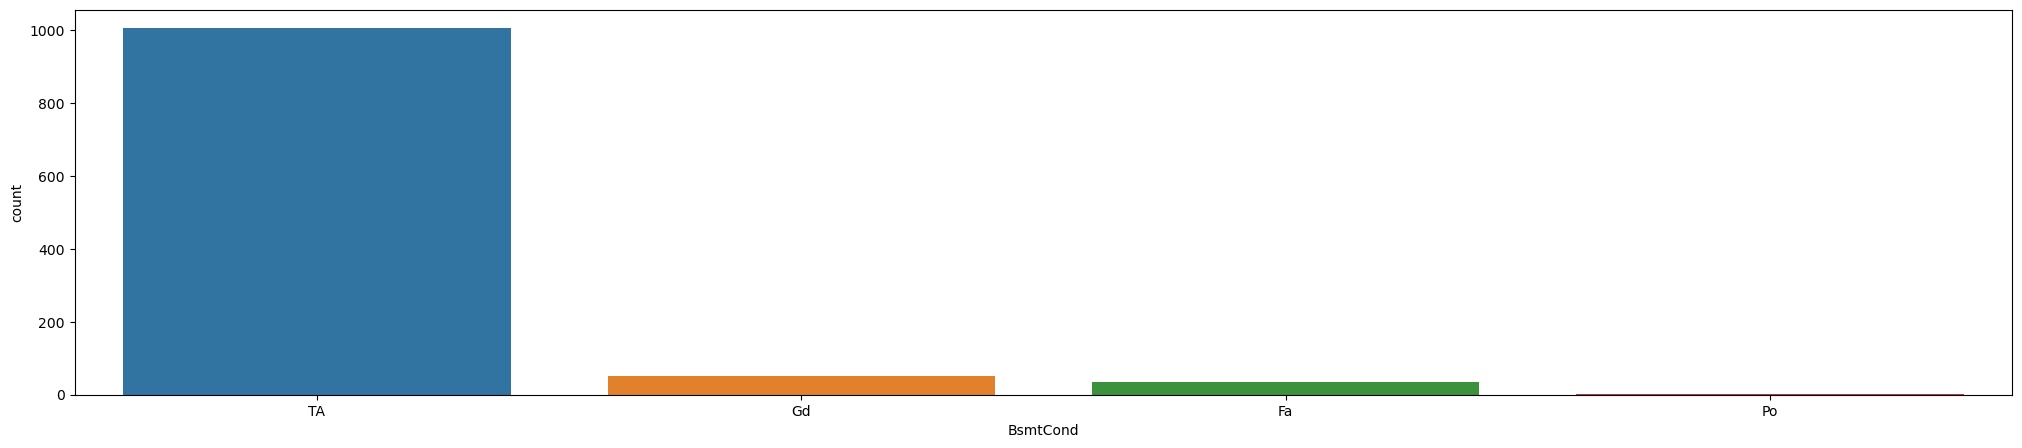

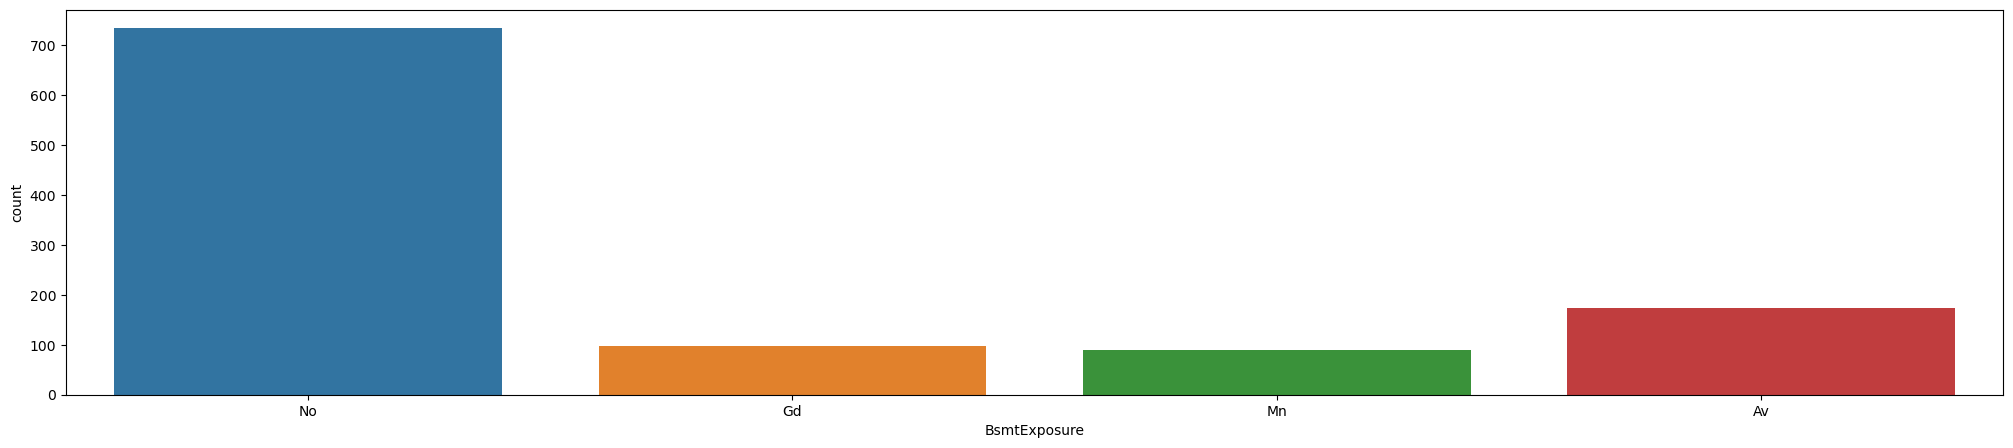

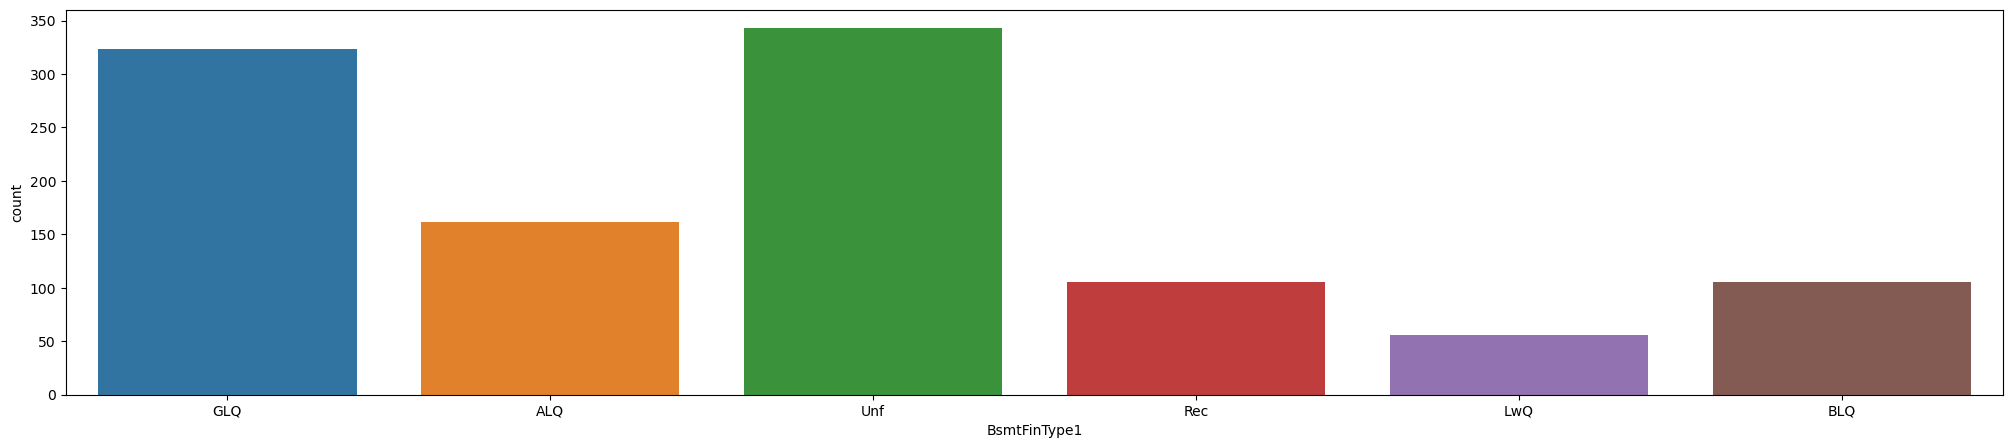

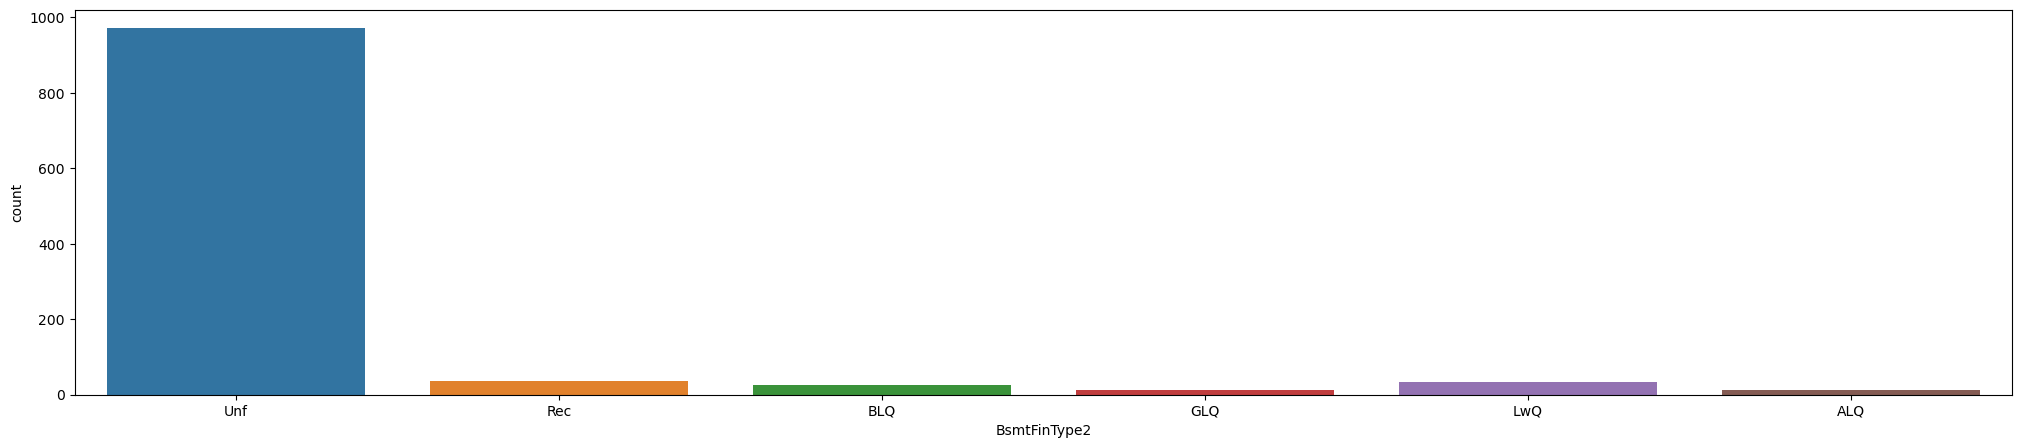

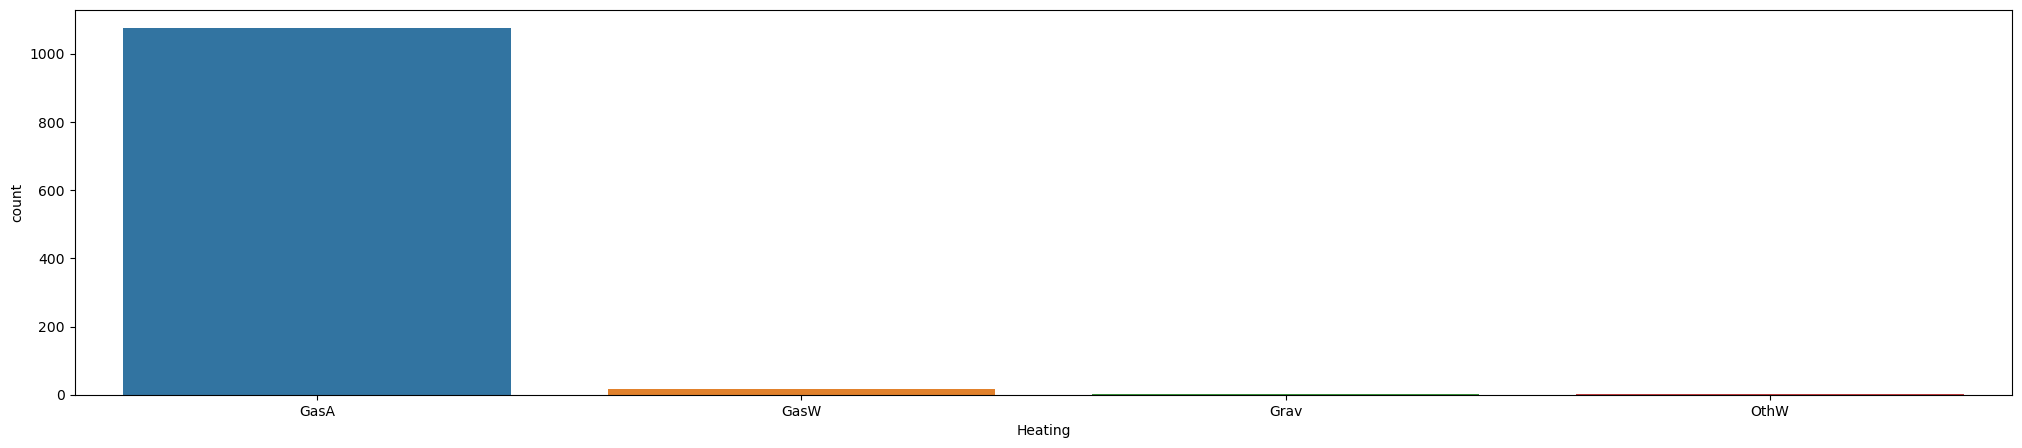

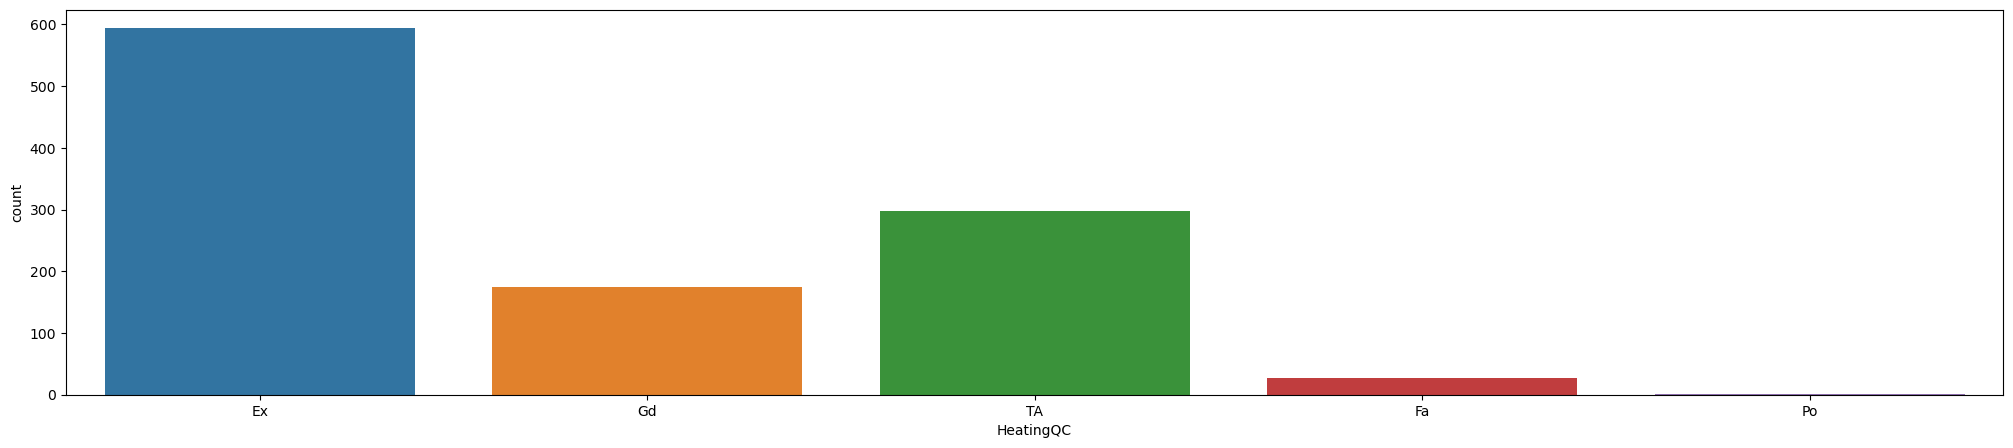

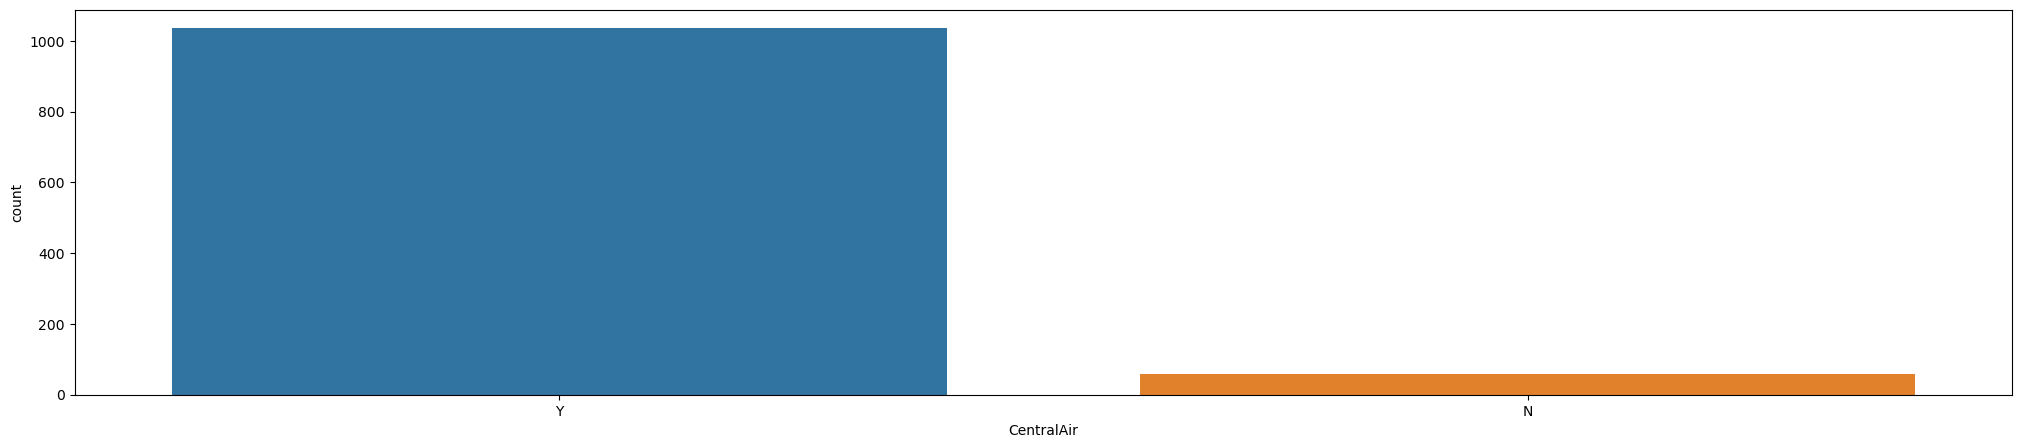

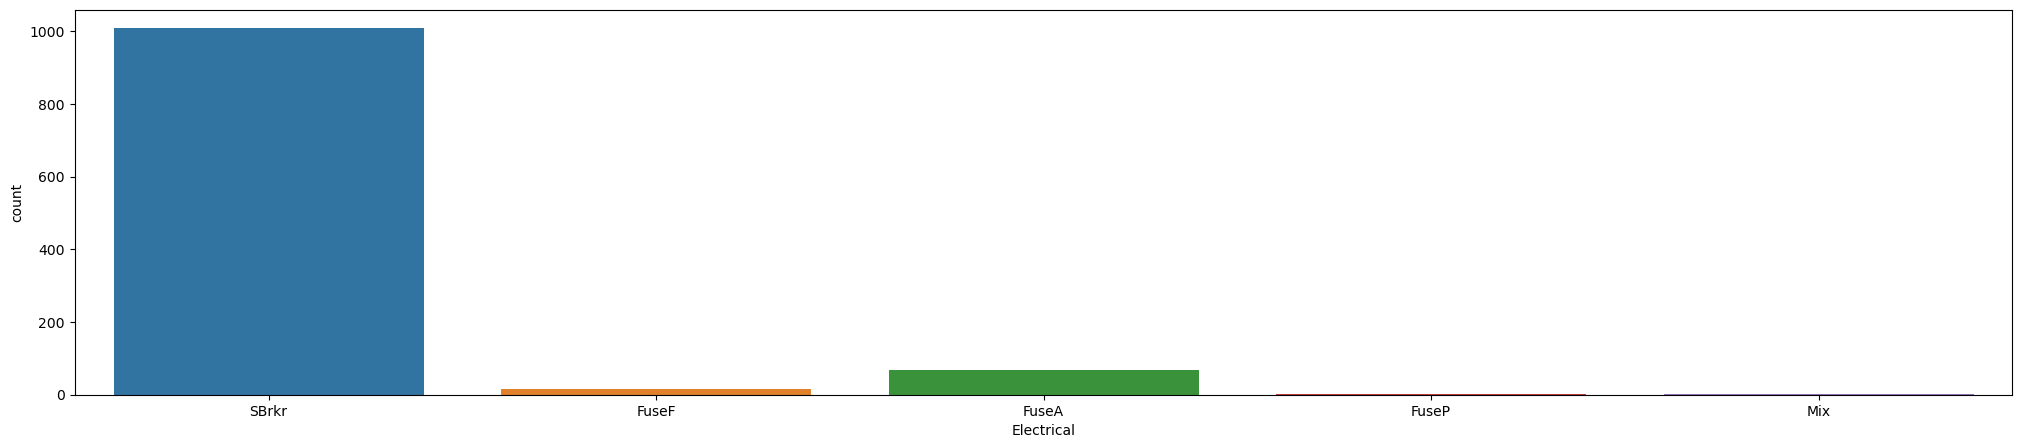

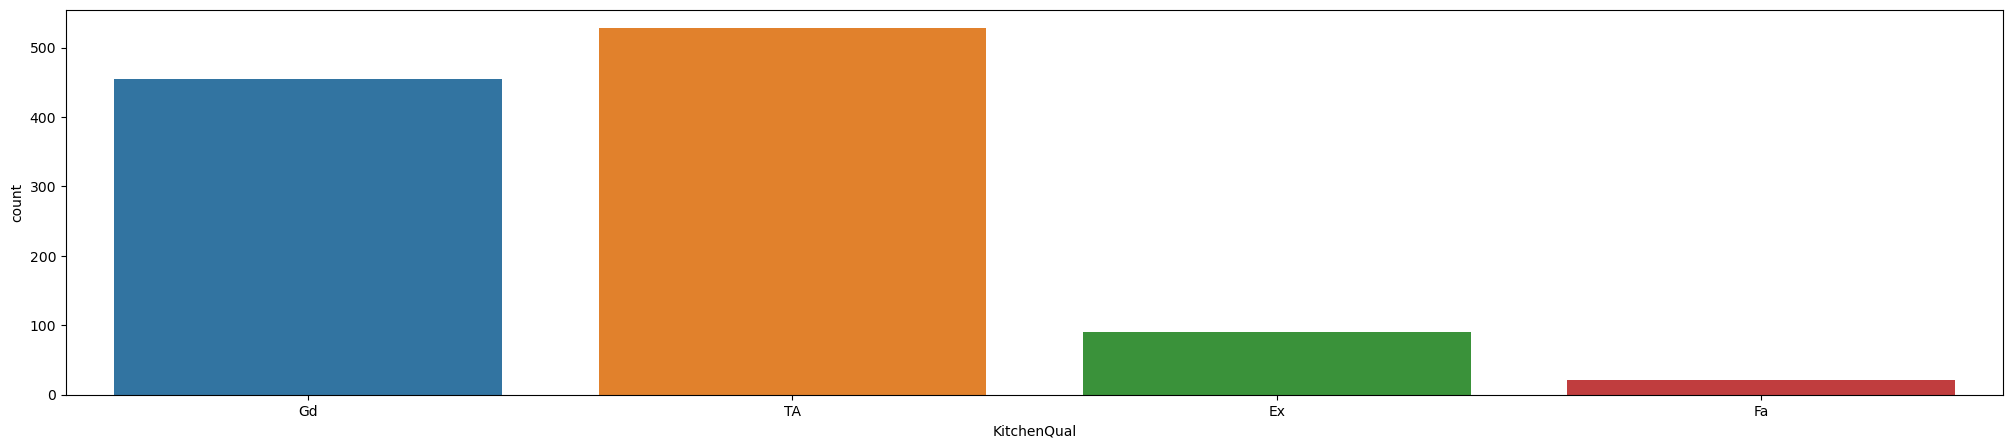

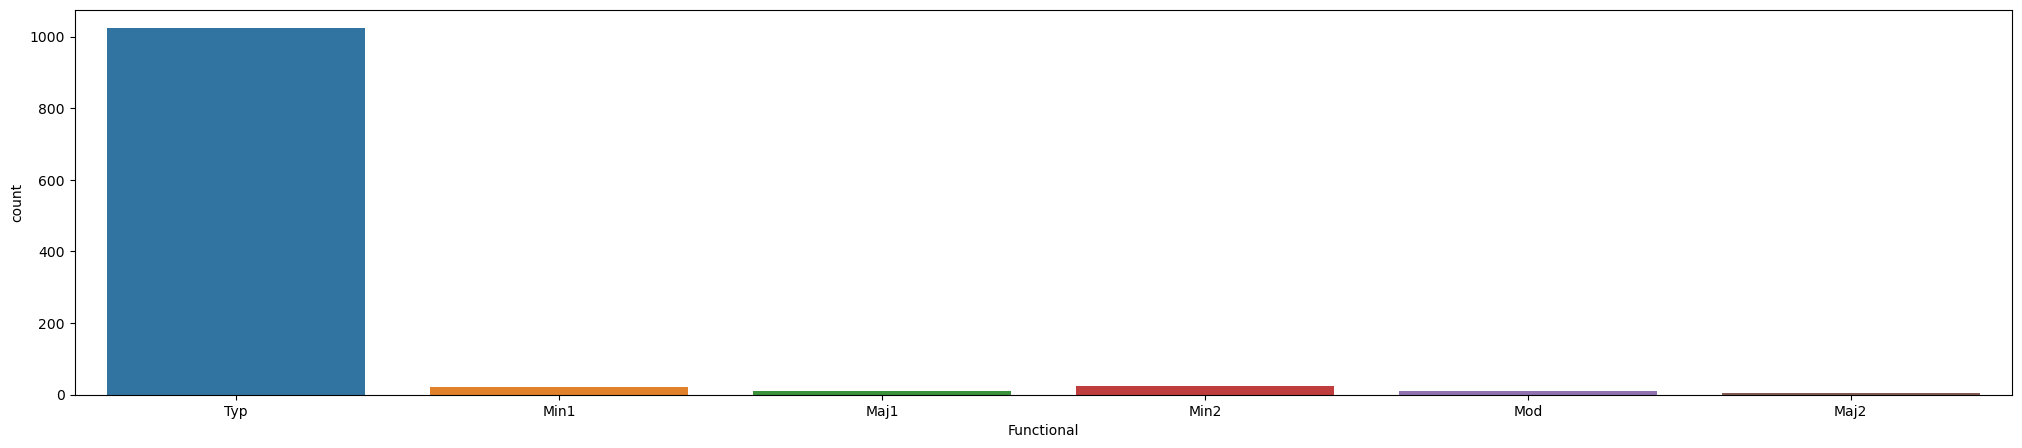

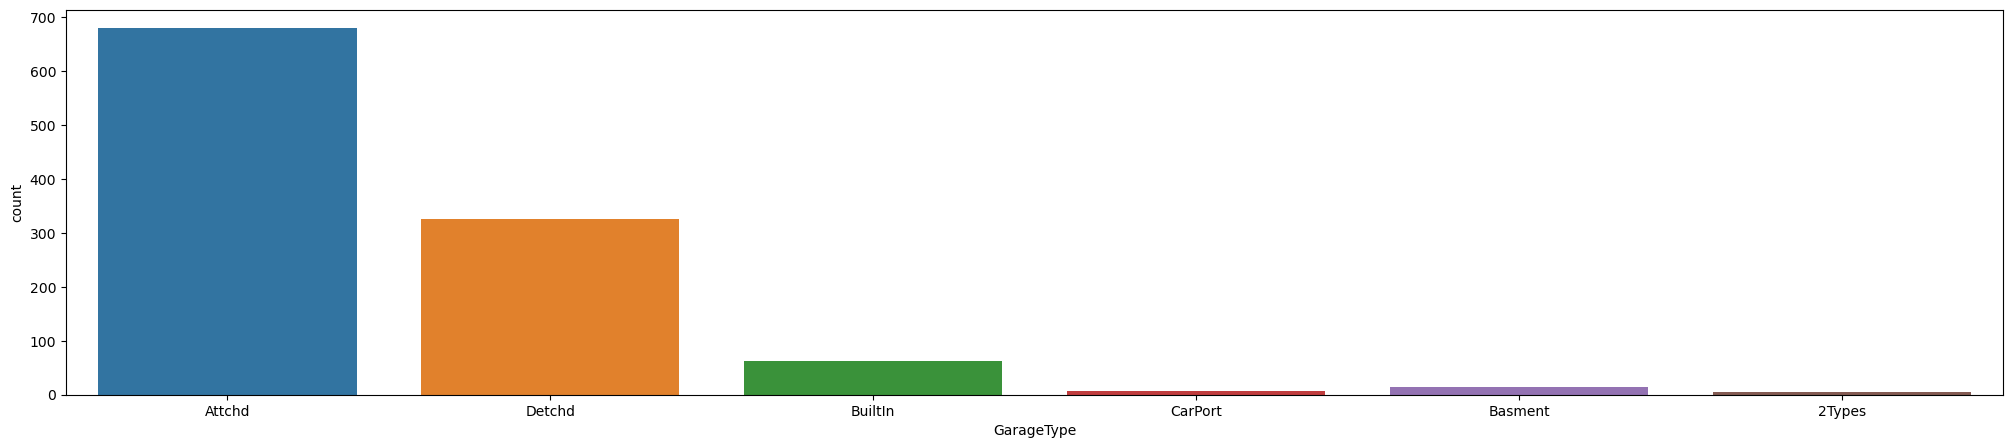

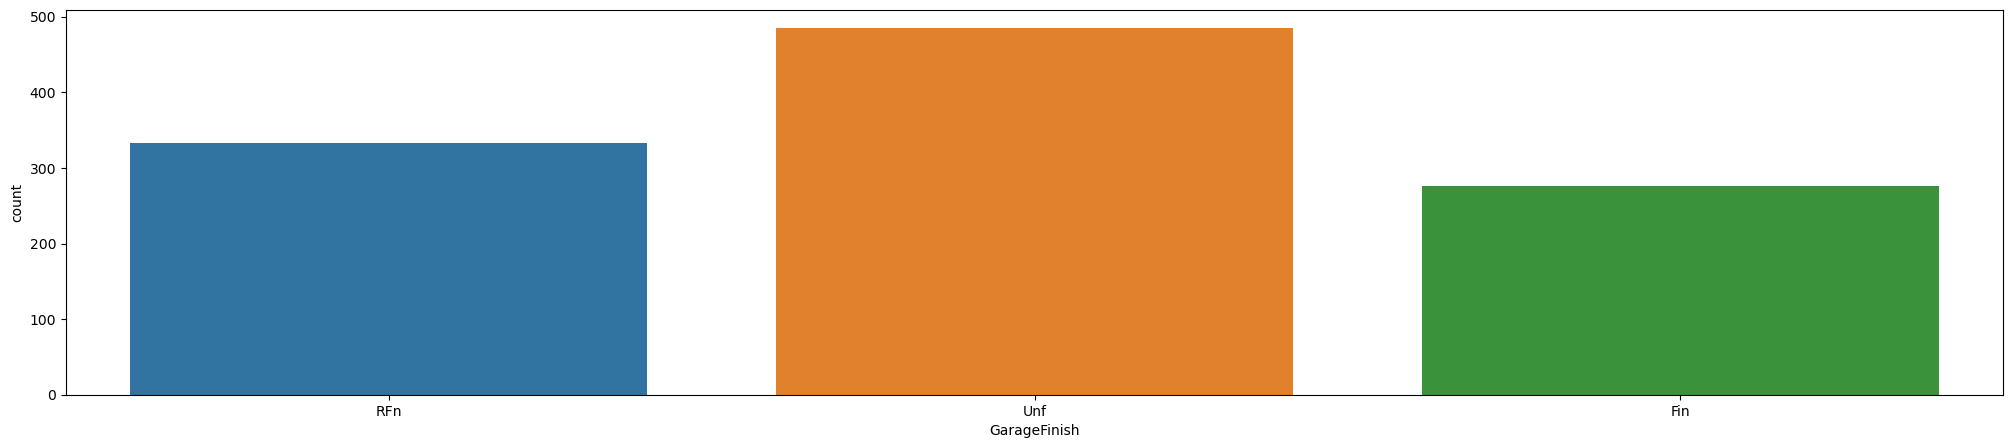

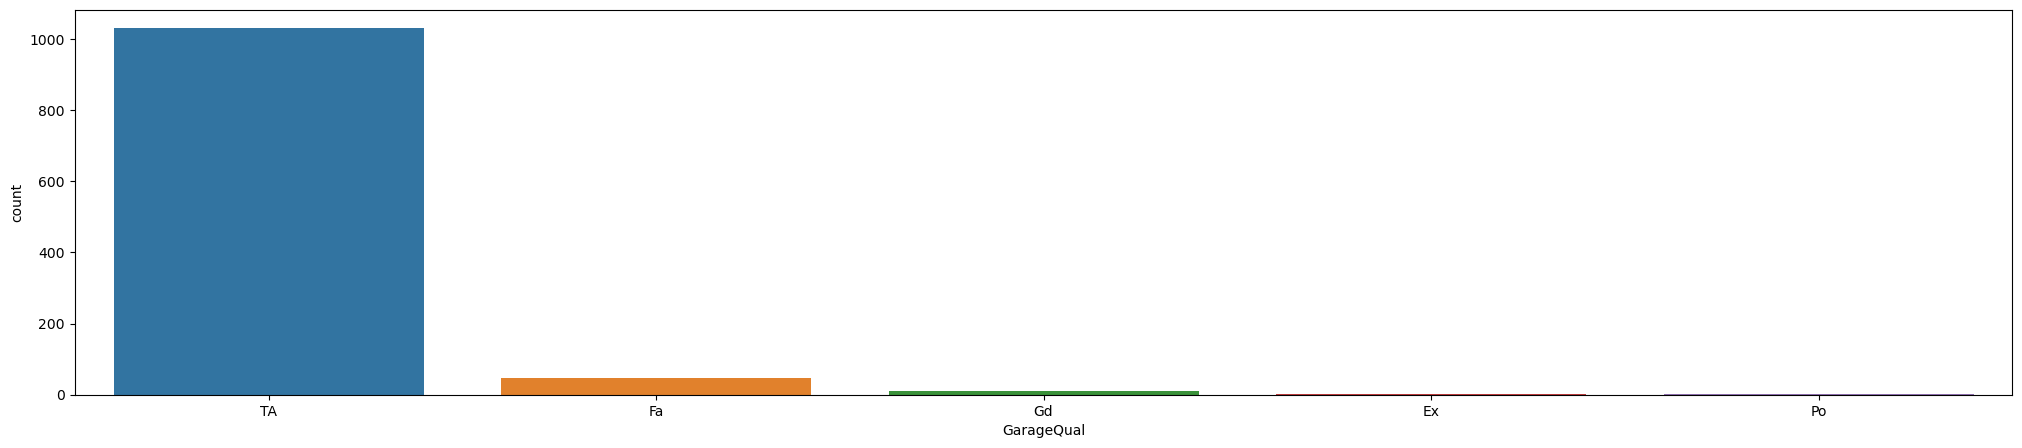

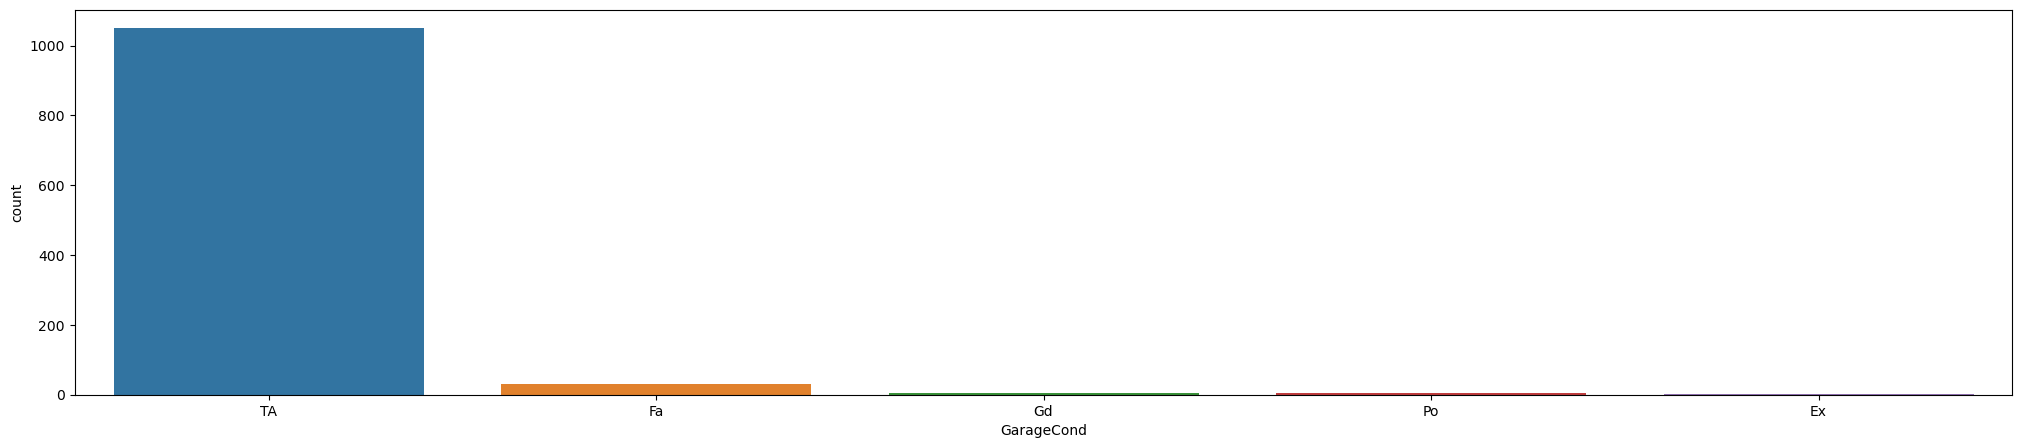

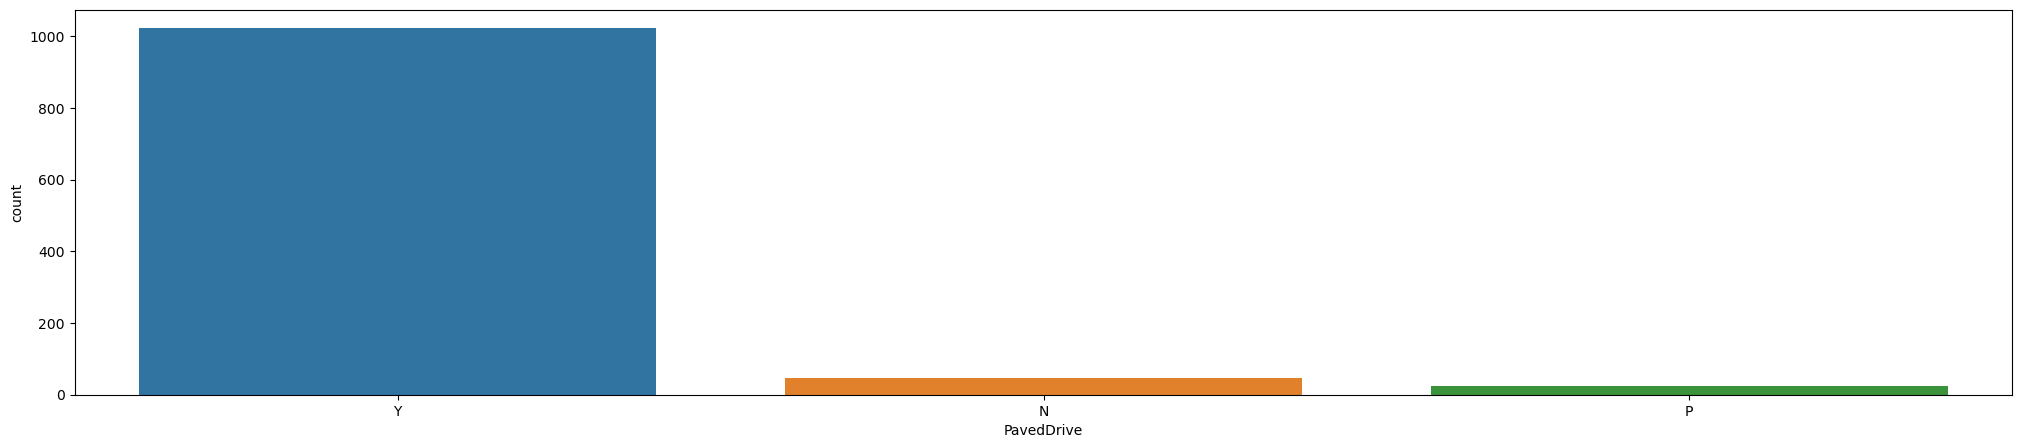

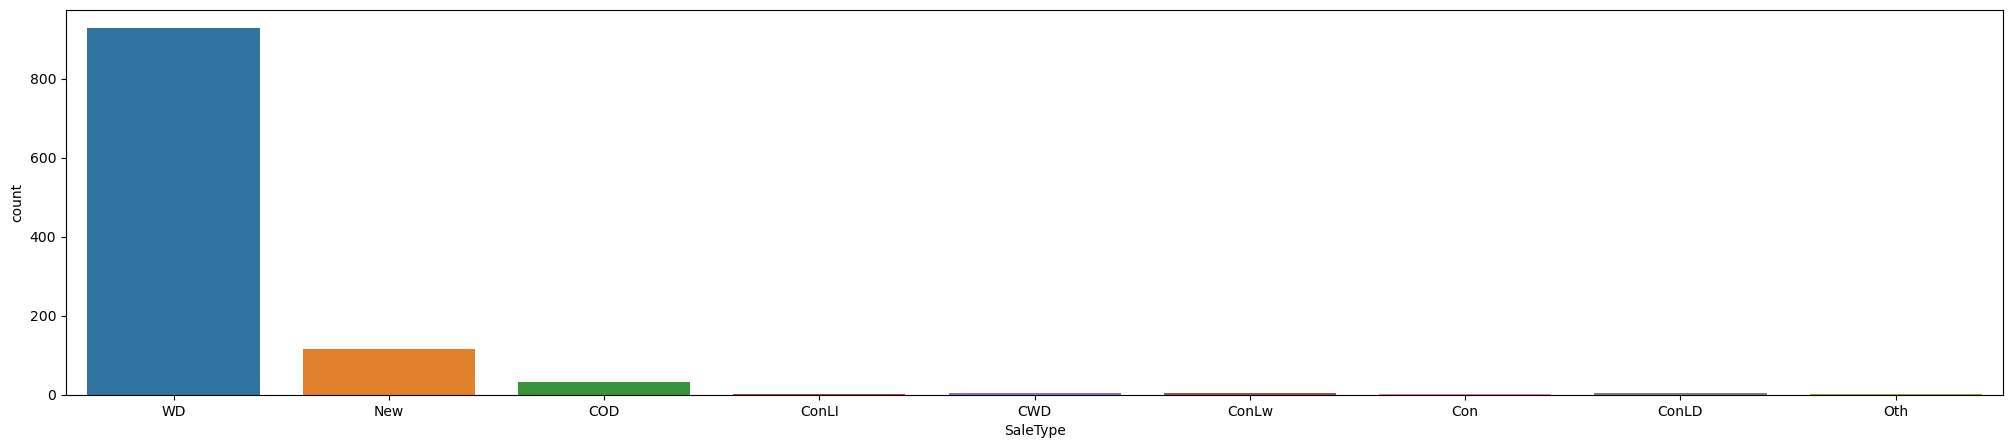

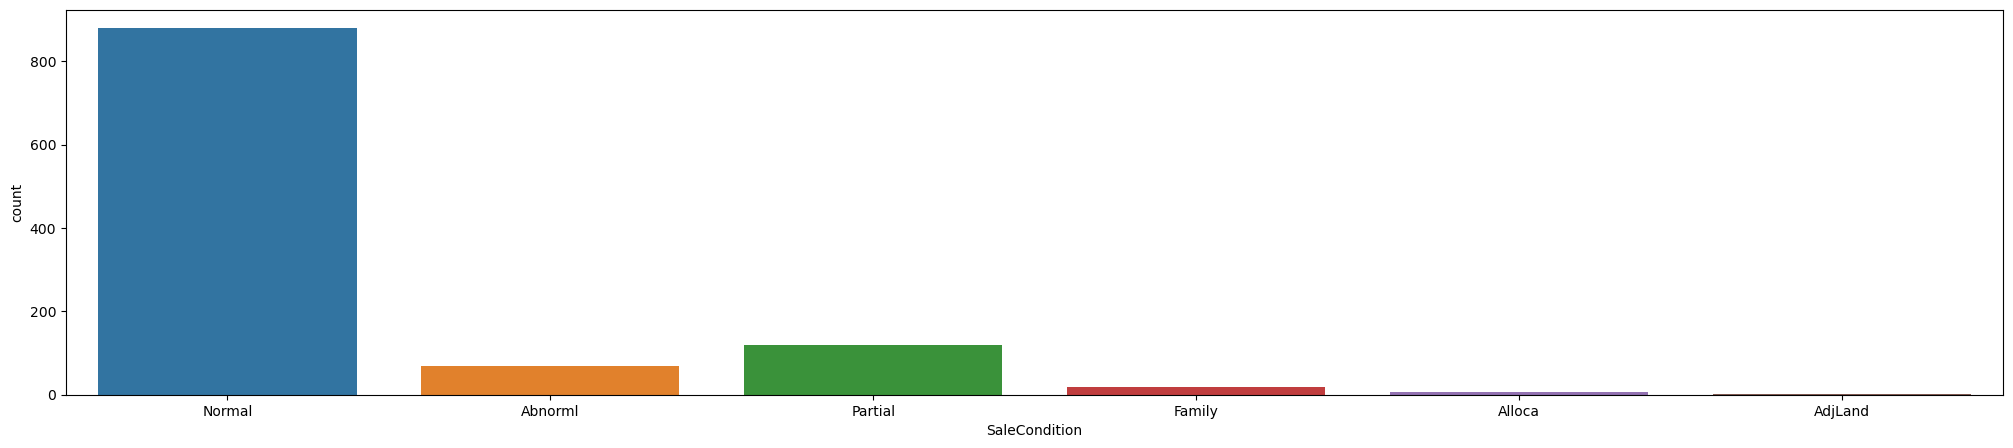

In [47]:
for j in unique_count_dict_limit :
     plt.figure(figsize=(25,5))
     sns.countplot (x=j, data = df)
     plt.show()

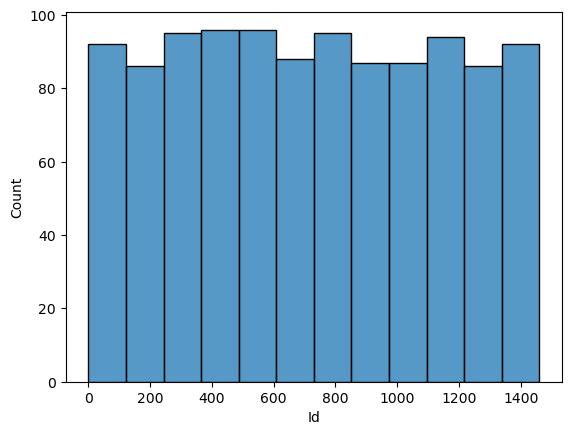

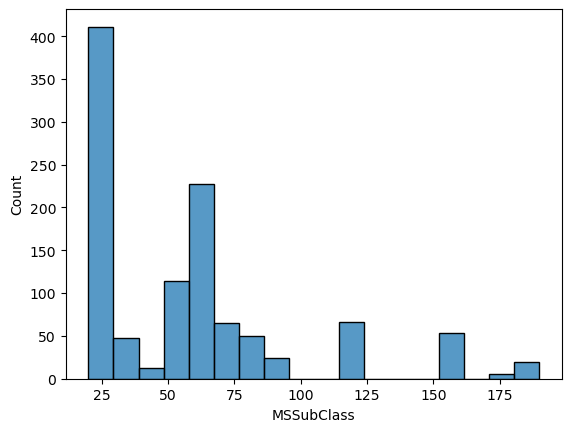

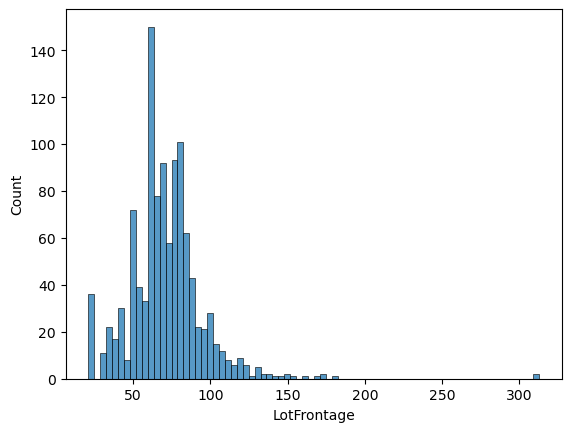

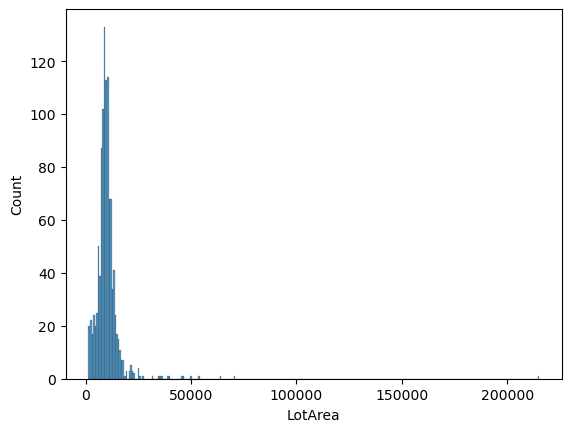

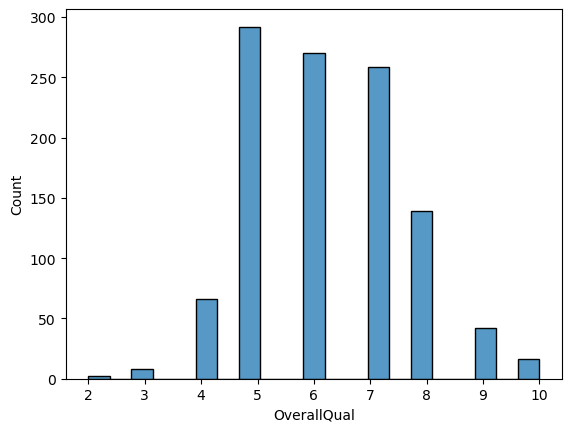

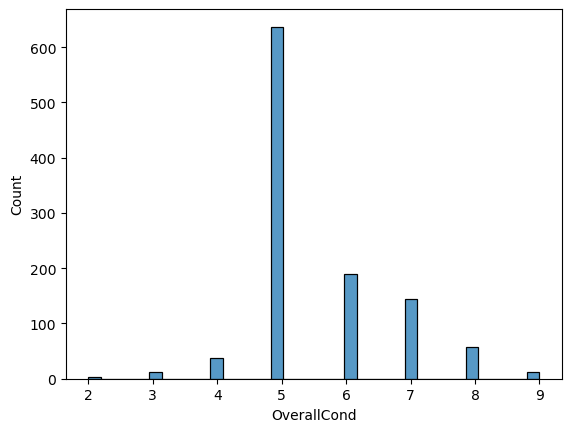

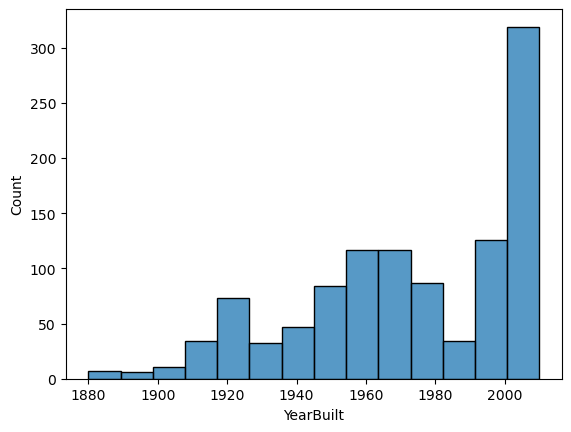

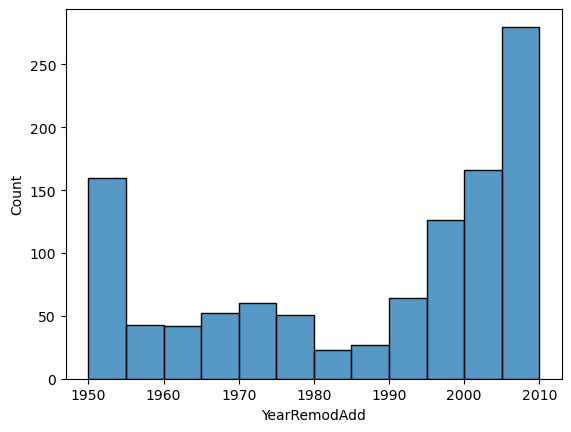

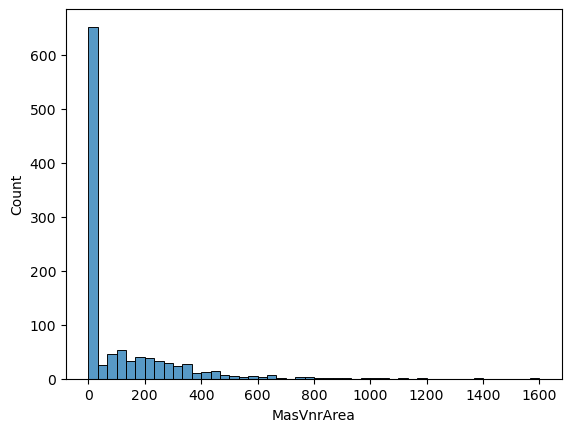

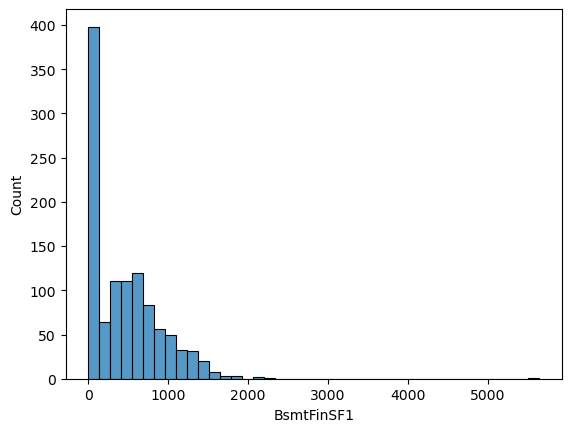

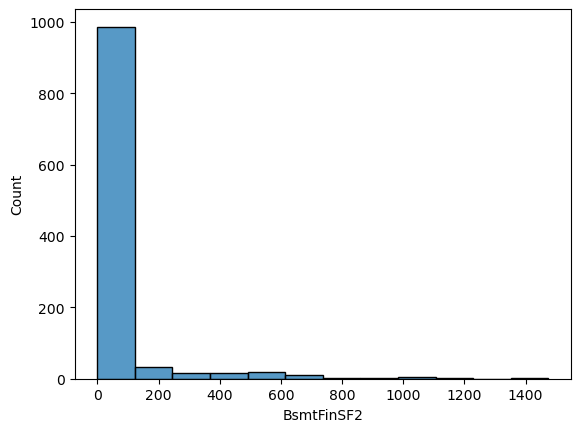

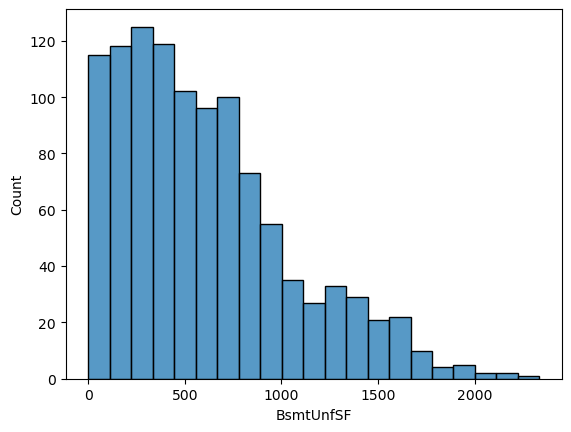

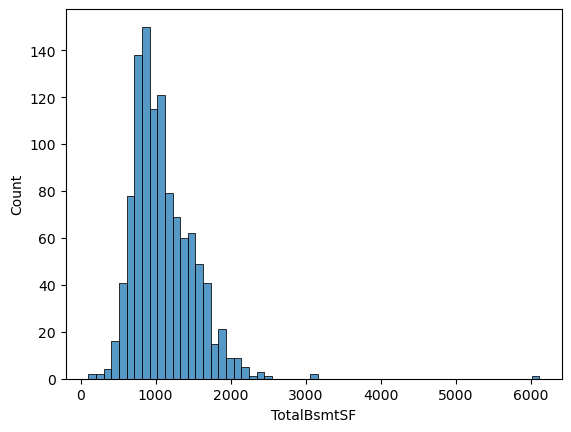

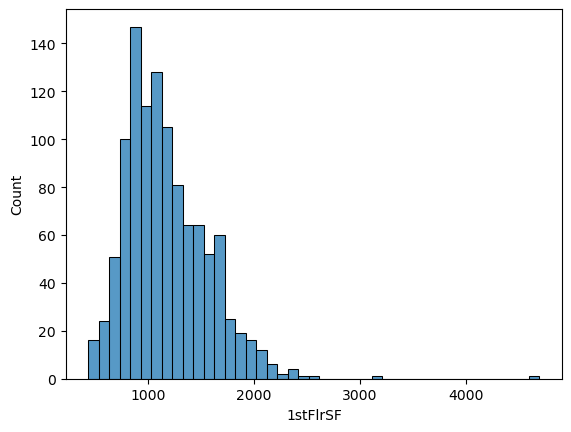

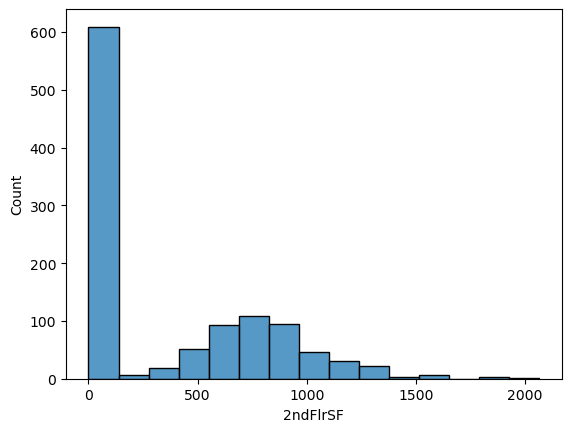

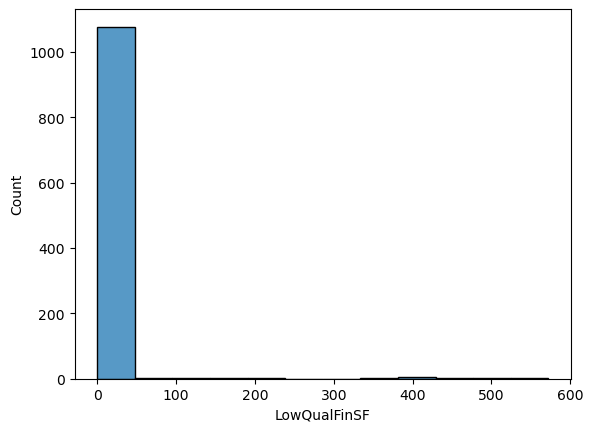

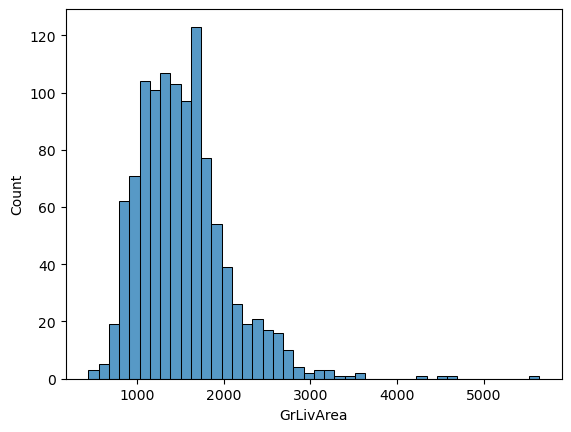

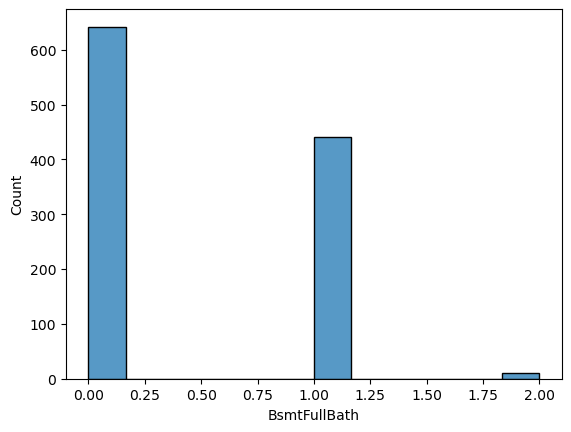

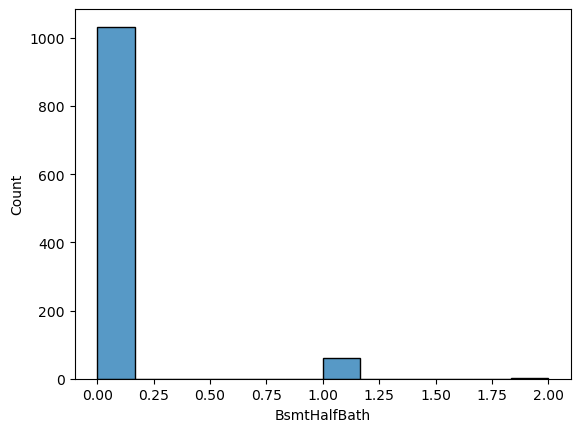

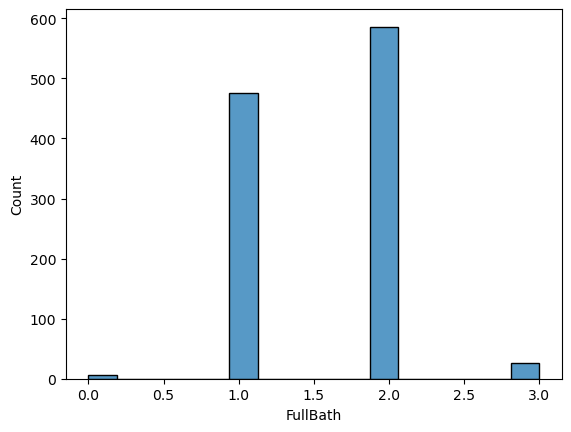

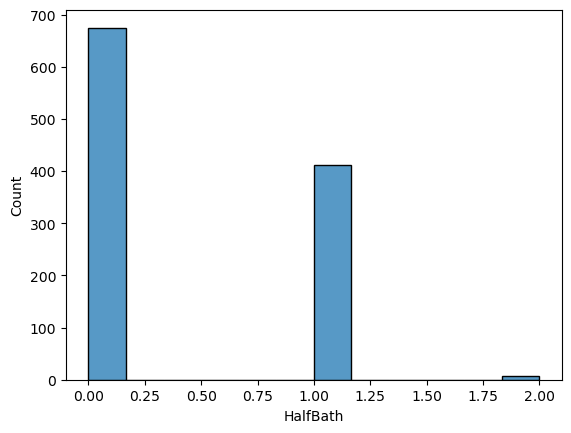

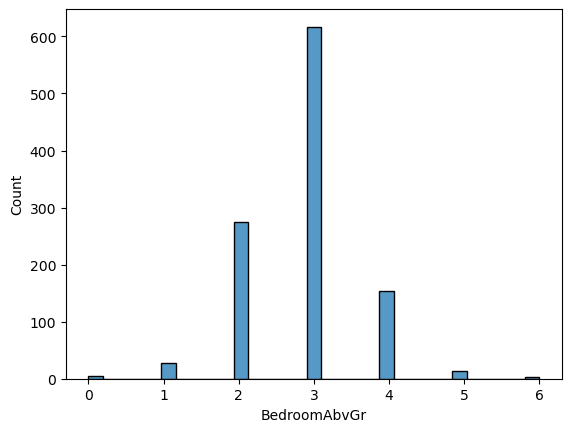

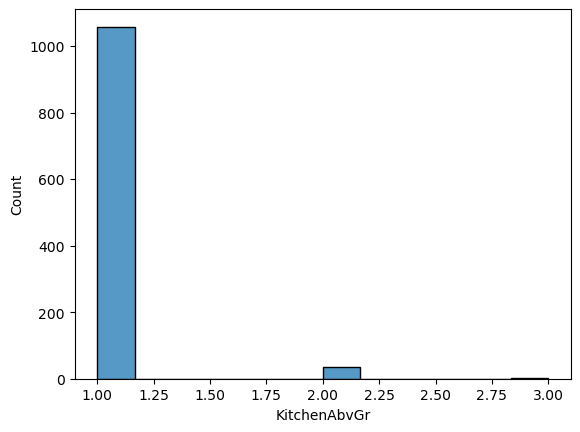

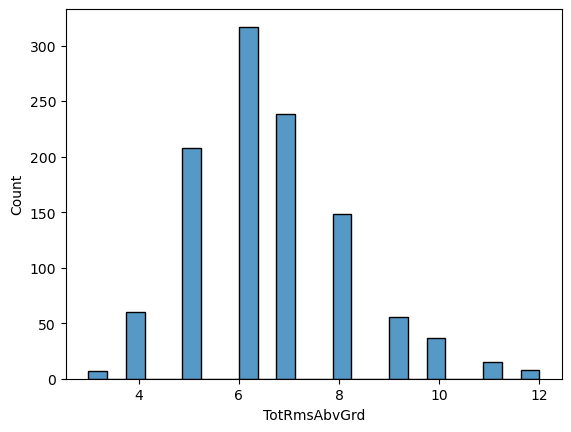

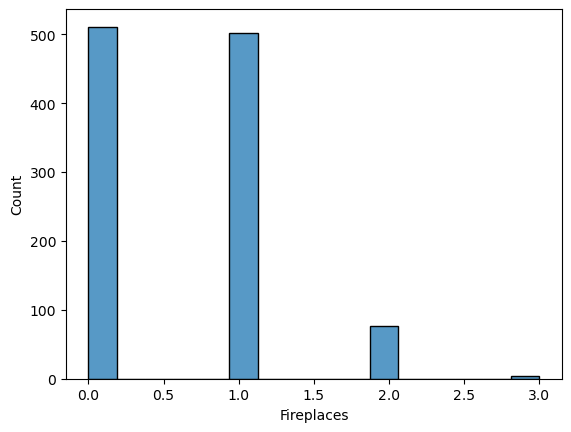

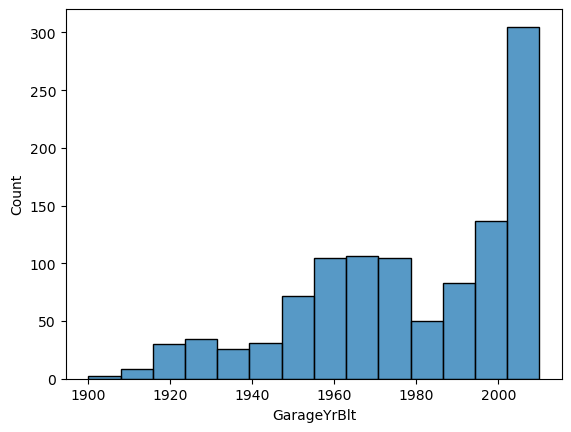

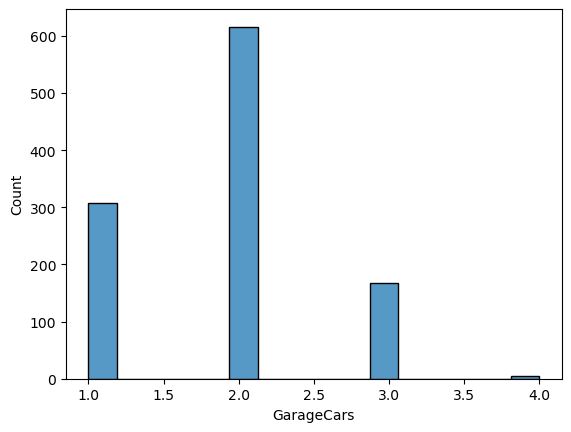

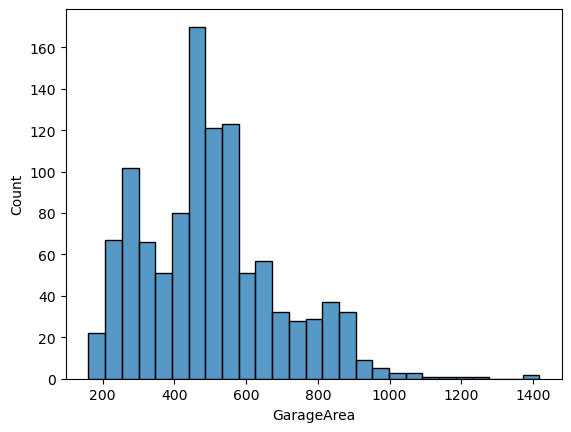

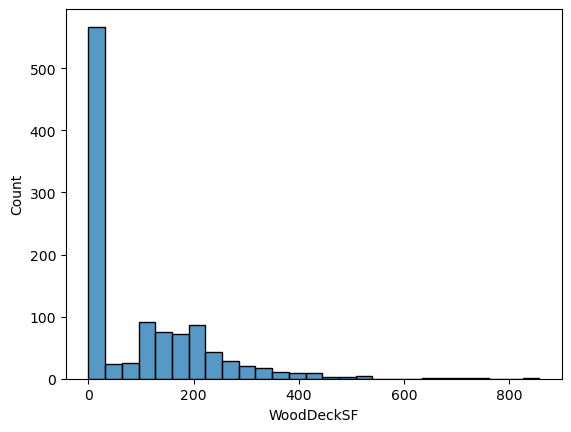

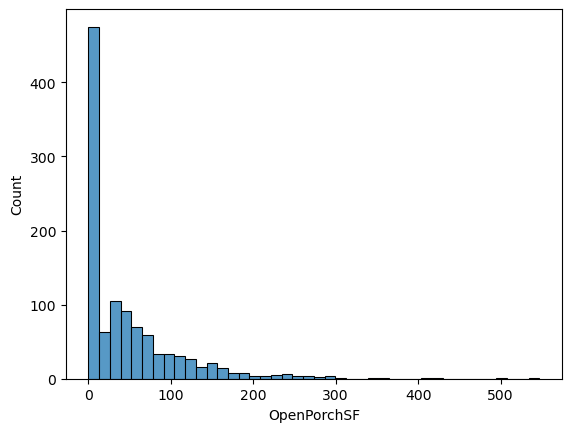

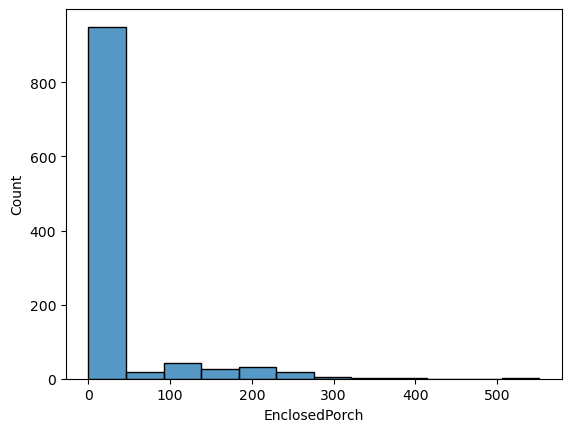

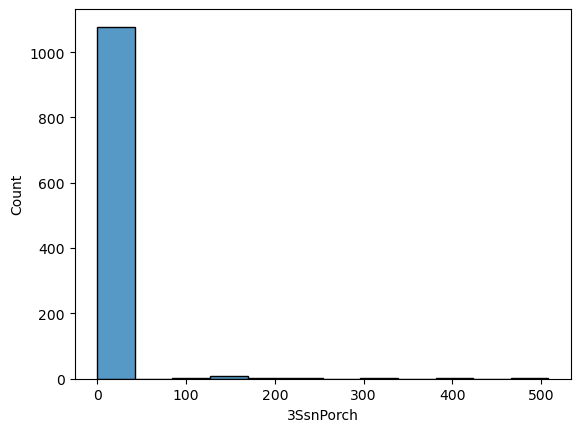

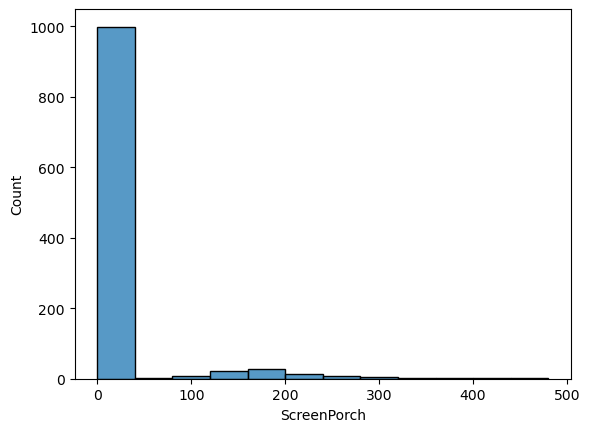

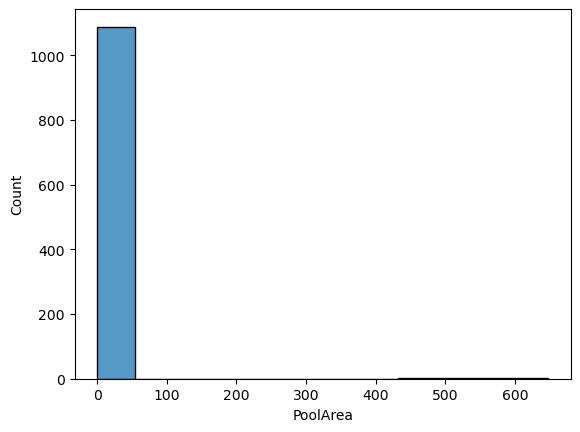

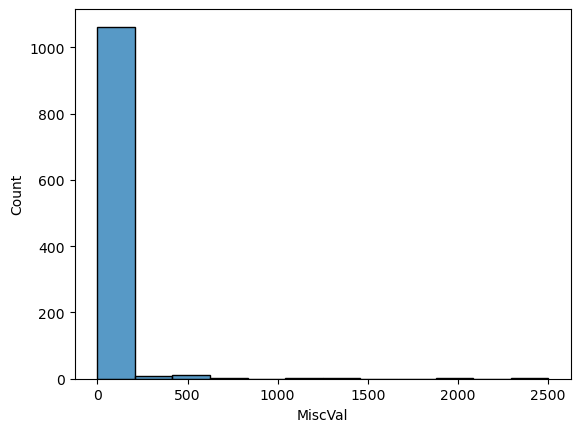

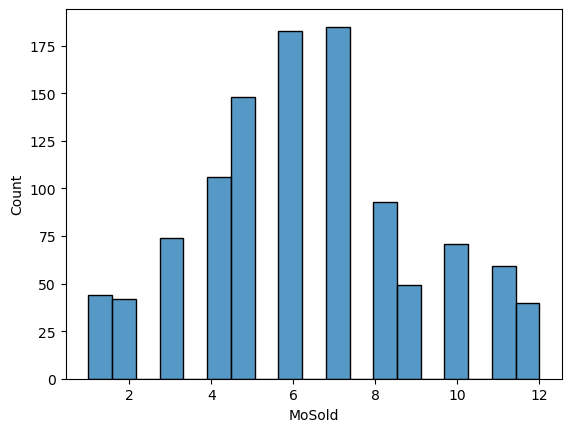

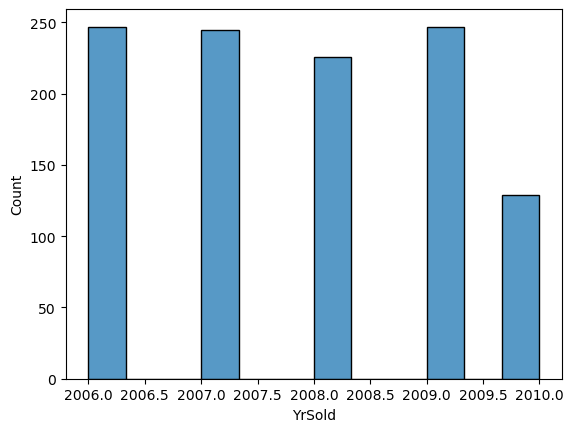

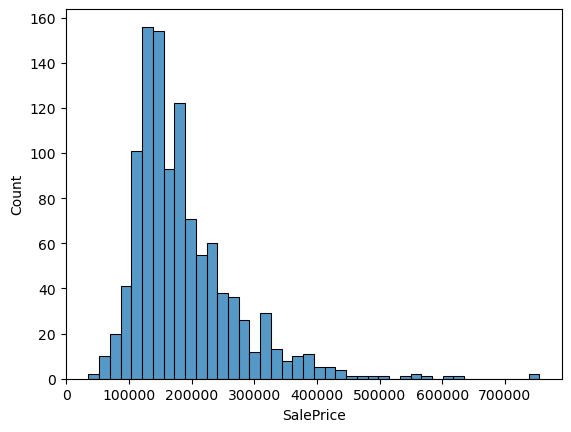

In [48]:
for col in num_cols:
    sns.histplot(x=df[col])
    plt.show()

## Bivariate Analysis & Multivariate Analysis

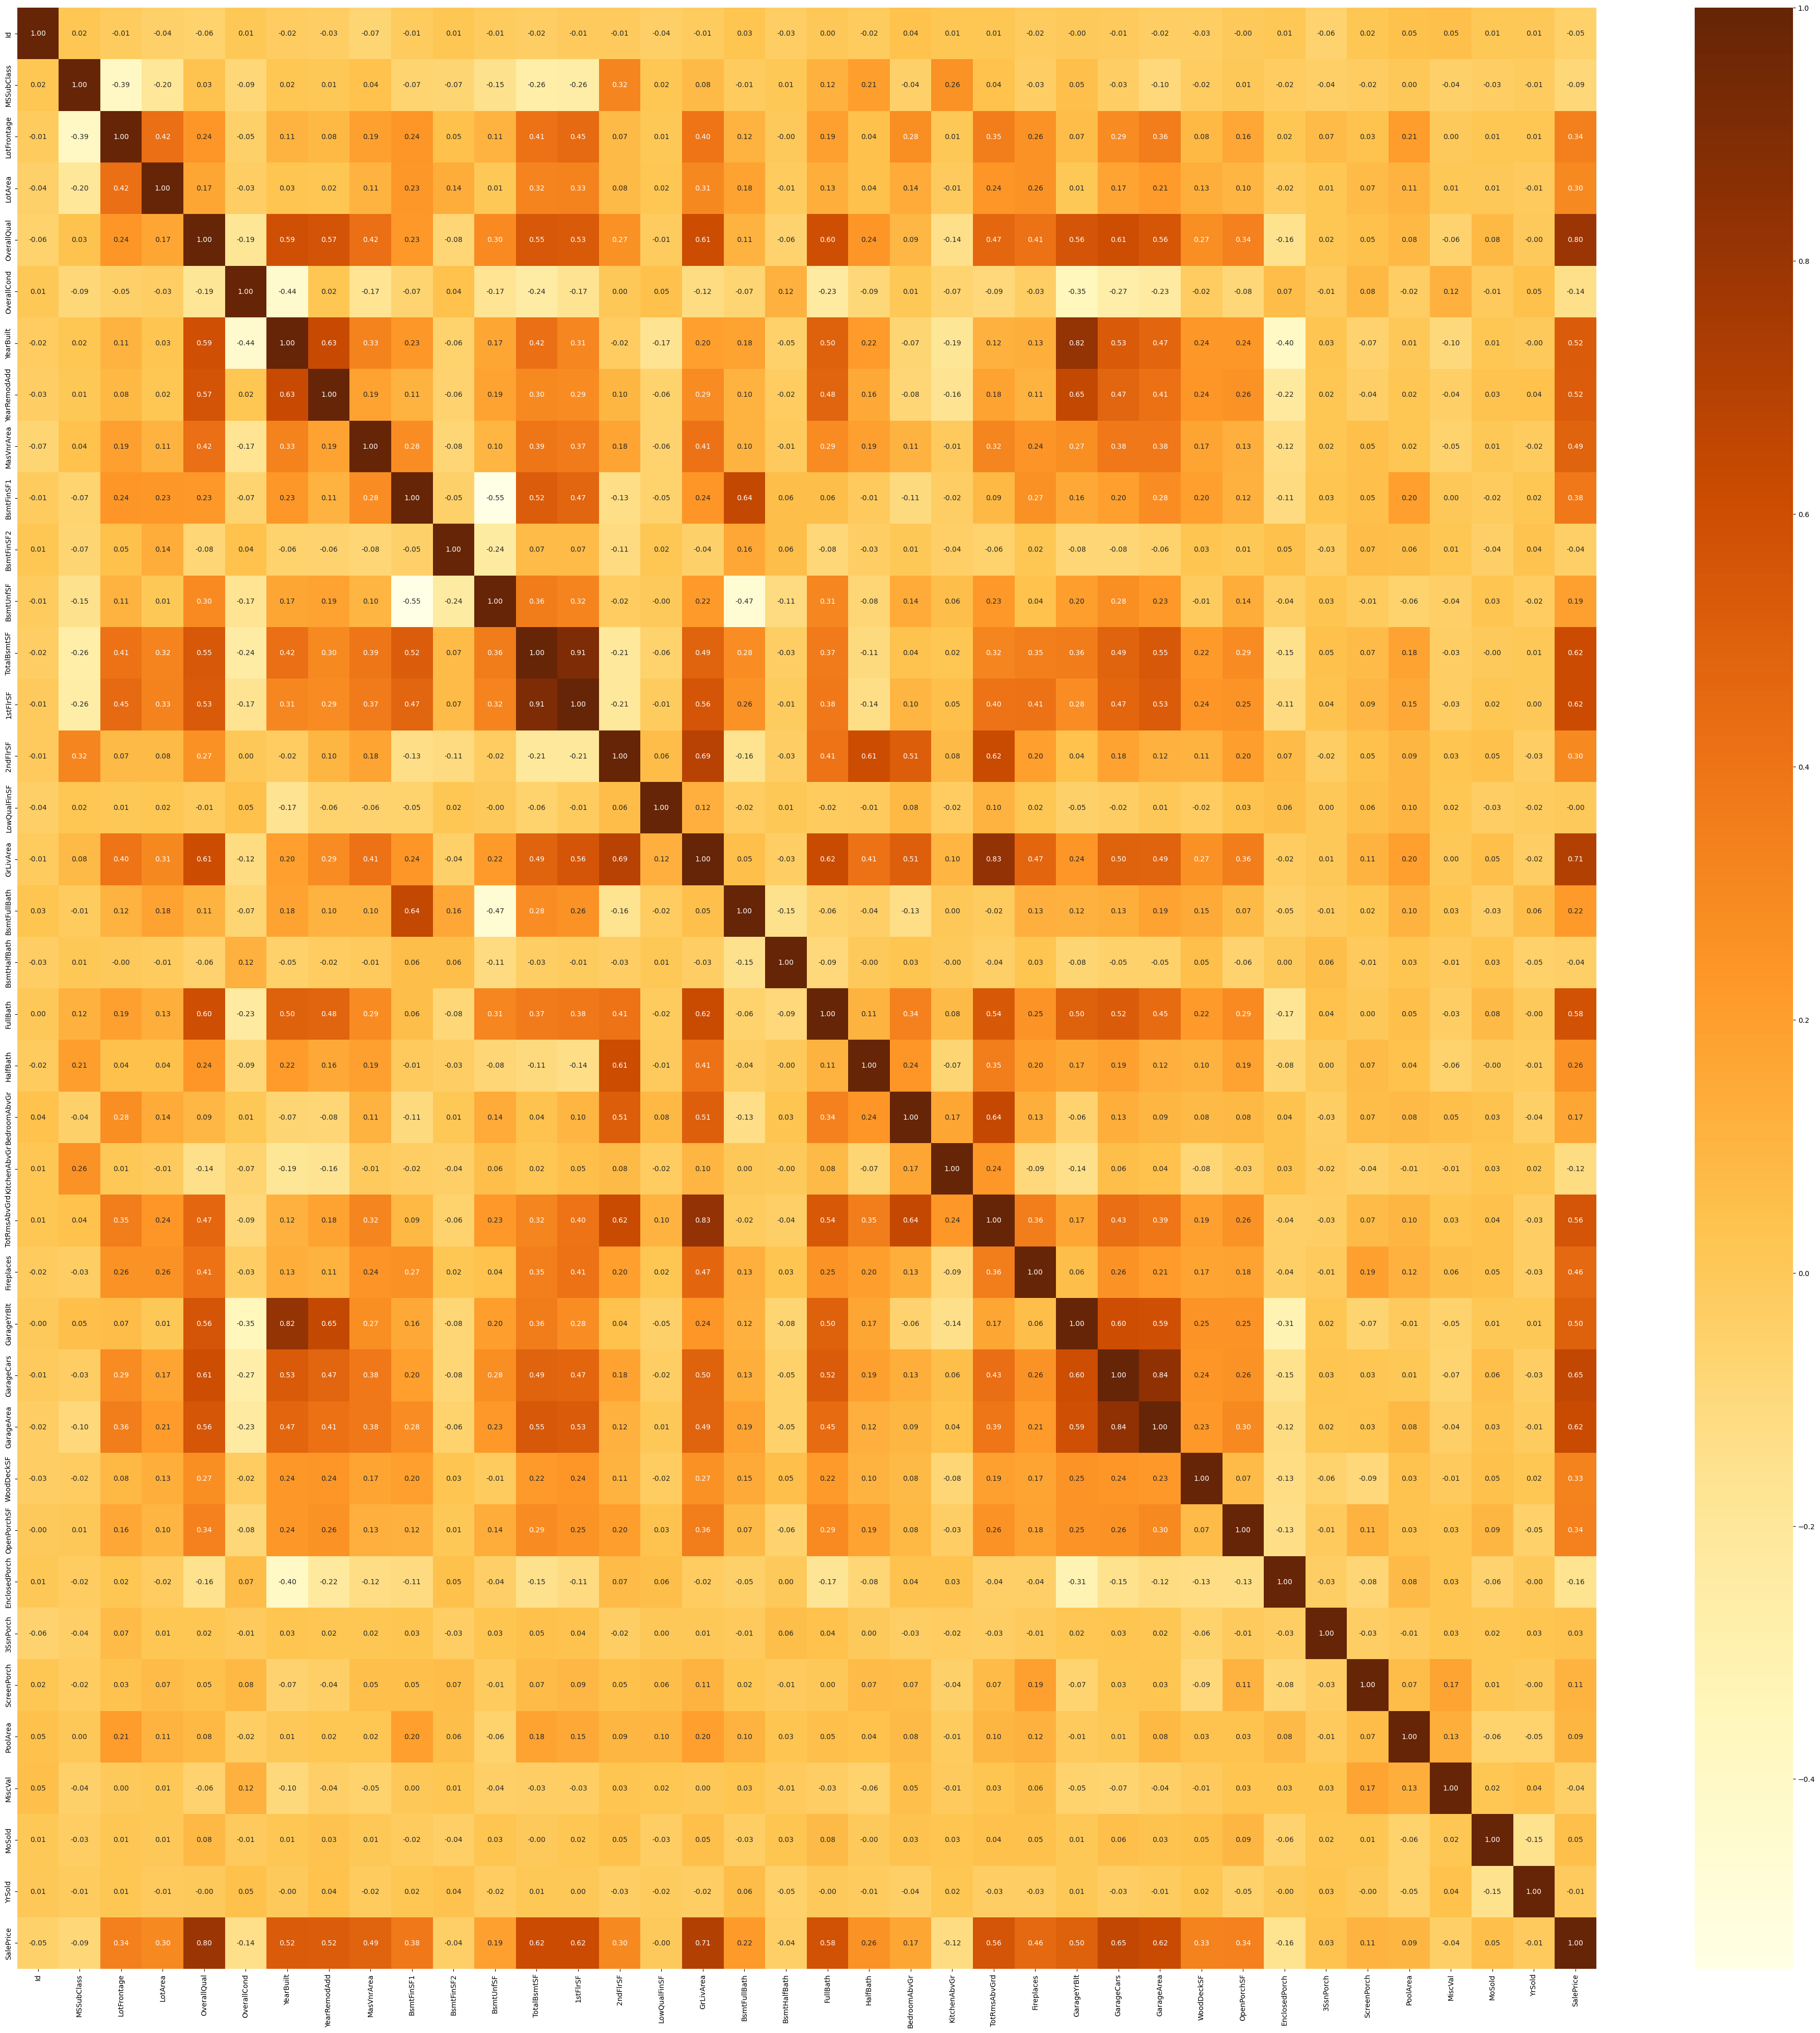

In [49]:
plt.figure(figsize=(50,50))
sns.heatmap(df[num_cols].corr(),annot=True,fmt='.2f',cmap="YlOrBr")
plt.show()


In [50]:
df_cor = pd.DataFrame(df[num_cols].corr())

In [51]:
df_cor = df_cor.reset_index()

In [52]:
cor_dict = {}

for i in num_cols:
    a = df_cor[((df_cor[i]>=0.6) & (df_cor[i]<1)) | ((df_cor[i] >-1 ) & df_cor[i]<=-0.6)]
    cor_dict[i] = list(a['index'])

In [53]:
df_cor

index        Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
0              Id  1.000000    0.015540    -0.014479 -0.042315    -0.058371   
1      MSSubClass  0.015540    1.000000    -0.389466 -0.197903     0.031639   
2     LotFrontage -0.014479   -0.389466     1.000000  0.419714     0.241169   
3         LotArea -0.042315   -0.197903     0.419714  1.000000     0.169876   
4     OverallQual -0.058371    0.031639     0.241169  0.169876     1.000000   
5     OverallCond  0.008627   -0.085553    -0.047132 -0.033113    -0.189587   
6       YearBuilt -0.022610    0.021605     0.107958  0.028954     0.590761   
7    YearRemodAdd -0.030239    0.010178     0.082938  0.024308     0.568582   
8      MasVnrArea -0.072344    0.040009     0.189769  0.106600     0.419756   
9      BsmtFinSF1 -0.013234   -0.069439     0.239734  0.232341     0.230438   
10     BsmtFinSF2  0.014964   -0.073834     0.046928  0.138615    -0.081342   
11      BsmtUnfSF -0.014316   -0.147155     0.111368  0.008924     0.297384   
12    TotalBsmtSF -0.024541   -0.264277     0.407566  0.324476     0.547448   
13       1stFlrSF -0.007492   -0.258207     0.453035  0.331295     0.527908   
14       2ndFlrSF -0.005997    0.319176     0.074953  0.075311     0.265906   
15   LowQualFinSF -0.040553    0.024935     0.010748  0.019956    -0.011186   
16      GrLivArea -0.013772    0.078213     0.397260  0.308590     0.610102   
17   BsmtFullBath  0.027265   -0.013040     0.115151  0.179874     0.107138   
18   BsmtHalfBath -0.027415    0.012509    -0.000491 -0.014597    -0.060775   
19       FullBath  0.003601    0.119495     0.189692  0.132860     0.597881   
20       HalfBath -0.015403    0.206259     0.043414  0.043977     0.239893   
21   BedroomAbvGr  0.039320   -0.044628     0.277136  0.141428     0.091462   
22   KitchenAbvGr  0.013252    0.258401     0.007411 -0.010855    -0.141071   
23   TotRmsAbvGrd  0.013832    0.038180     0.354714  0.241849     0.465733   
24     Fireplaces -0.015798   -0.029575     0.260293  0.255842     0.409725   
25    GarageYrBlt -0.003820    0.051225     0.067254  0.012871     0.562405   
26     GarageCars -0.009568   -0.031638     0.285748  0.173525     0.605466   
27     GarageArea -0.023290   -0.095374     0.357030  0.213104     0.555315   
28     WoodDeckSF -0.027597   -0.018514     0.081338  0.133995     0.273652   
29    OpenPorchSF -0.000987    0.006799     0.160862  0.098051     0.335884   
30  EnclosedPorch  0.011796   -0.019313     0.016058 -0.022789    -0.155080   
31      3SsnPorch -0.061688   -0.035855     0.073004  0.013343     0.020081   
32    ScreenPorch  0.015019   -0.021854     0.034937  0.072413     0.049286   
33       PoolArea  0.048487    0.003221     0.211959  0.109294     0.080037   
34        MiscVal  0.050954   -0.043299     0.000789  0.012483    -0.062944   
35         MoSold  0.007486   -0.025393     0.014951  0.006270     0.082995   
36         YrSold  0.005307   -0.012347     0.013366 -0.006412    -0.003529   
37      SalePrice -0.047595   -0.089478     0.343978  0.302268     0.795437   

    OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  ...  WoodDeckSF  \
0      0.008627  -0.022610     -0.030239   -0.072344  ...   -0.027597   
1     -0.085553   0.021605      0.010178    0.040009  ...   -0.018514   
2     -0.047132   0.107958      0.082938    0.189769  ...    0.081338   
3     -0.033113   0.028954      0.024308    0.106600  ...    0.133995   
4     -0.189587   0.590761      0.568582    0.419756  ...    0.273652   
5      1.000000  -0.437647      0.024427   -0.174581  ...   -0.018856   
6     -0.437647   1.000000      0.625905    0.328897  ...    0.236512   
7      0.024427   0.625905      1.000000    0.187492  ...    0.240775   
8     -0.174581   0.328897      0.187492    1.000000  ...    0.172564   
9     -0.068285   0.234207      0.111675    0.281356  ...    0.198025   
10     0.040598  -0.058987     -0.063813   -0.080799  ...    0.030734   
11    -0.169743   0.170077      0.187505    0.100304  

In [54]:
cor_dict

{'Id': [],
 'MSSubClass': [],
 'LotFrontage': [],
 'LotArea': [],
 'OverallQual': ['GrLivArea', 'GarageCars', 'SalePrice'],
 'OverallCond': [],
 'YearBuilt': ['YearRemodAdd', 'GarageYrBlt'],
 'YearRemodAdd': ['YearBuilt', 'GarageYrBlt'],
 'MasVnrArea': [],
 'BsmtFinSF1': ['BsmtFullBath'],
 'BsmtFinSF2': [],
 'BsmtUnfSF': [],
 'TotalBsmtSF': ['1stFlrSF', 'SalePrice'],
 '1stFlrSF': ['TotalBsmtSF', 'SalePrice'],
 '2ndFlrSF': ['GrLivArea', 'HalfBath', 'TotRmsAbvGrd'],
 'LowQualFinSF': [],
 'GrLivArea': ['OverallQual',
  '2ndFlrSF',
  'FullBath',
  'TotRmsAbvGrd',
  'SalePrice'],
 'BsmtFullBath': ['BsmtFinSF1'],
 'BsmtHalfBath': [],
 'FullBath': ['GrLivArea'],
 'HalfBath': ['2ndFlrSF'],
 'BedroomAbvGr': ['TotRmsAbvGrd'],
 'KitchenAbvGr': [],
 'TotRmsAbvGrd': ['2ndFlrSF', 'GrLivArea', 'BedroomAbvGr'],
 'Fireplaces': [],
 'GarageYrBlt': ['YearBuilt', 'YearRemodAdd', 'GarageCars'],
 'GarageCars': ['OverallQual', 'GarageYrBlt', 'GarageArea', 'SalePrice'],
 'GarageArea': ['GarageCars', 'SalePric

In [55]:
overallQuall = ['GrLivArea', 'GarageCars', 'SalePrice']

In [56]:
yearbuilt = ['YearRemodAdd', 'GarageYrBlt']

In [57]:
secondndFlrSF =  ['GrLivArea', 'HalfBath', 'TotRmsAbvGrd']

In [58]:
GrLivArea = ['OverallQual','2ndFlrSF','FullBath','TotRmsAbvGrd','SalePrice']
GarageYrBlt =  ['YearBuilt', 'YearRemodAdd', 'GarageCars'],
GarageCars =  ['OverallQual', 'GarageYrBlt', 'GarageArea', 'SalePrice']
GarageArea =  ['GarageCars', 'SalePrice']
SalePrice =  ['OverallQual','TotalBsmtSF','1stFlrSF','GrLivArea','GarageCars','GarageArea']

In [59]:
BedroomAbvGr = ['TotRmsAbvGrd']

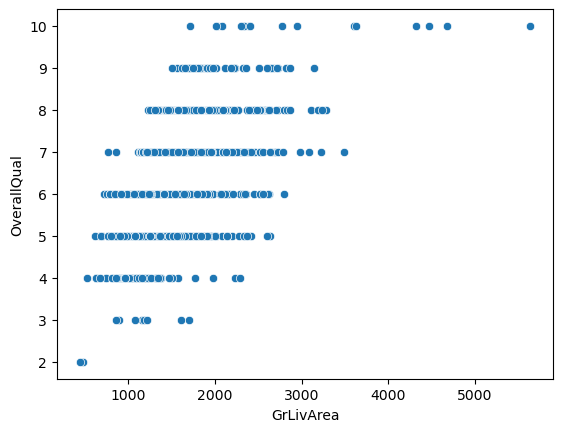

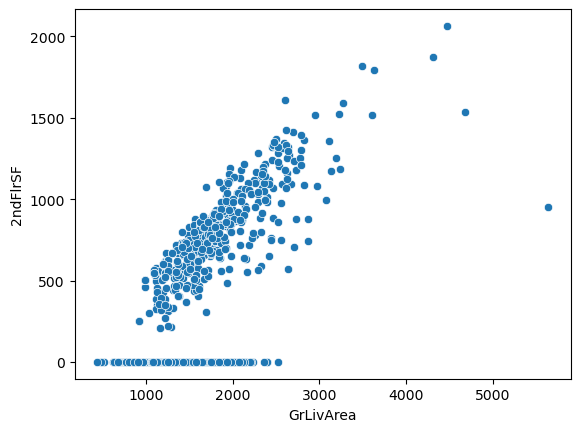

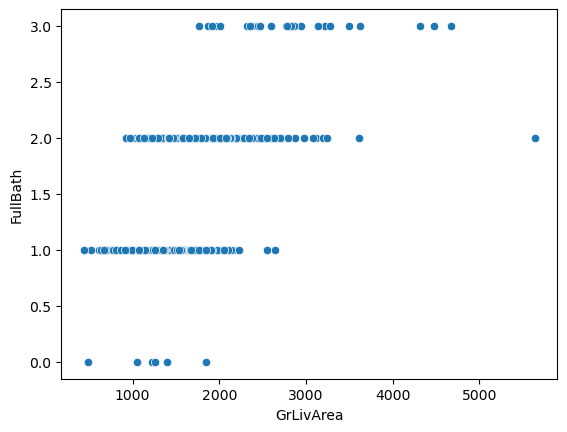

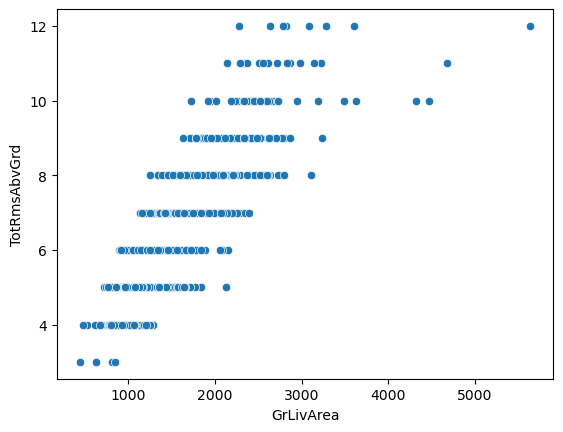

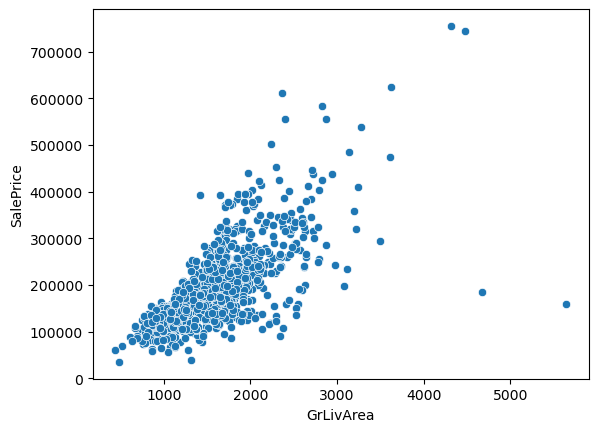

In [60]:
for i in GrLivArea:
    sns.scatterplot(x = df['GrLivArea'],y = df[i],legend = 'full')
    plt.show()

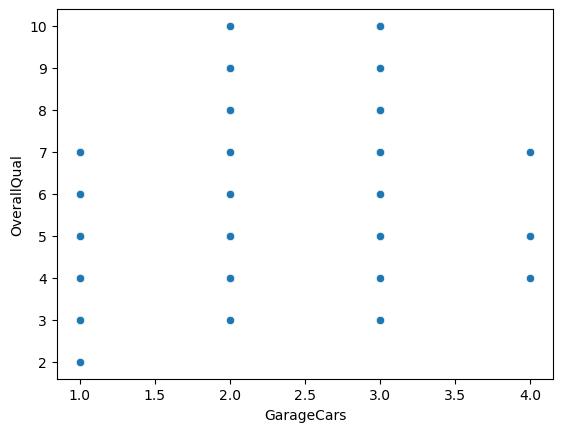

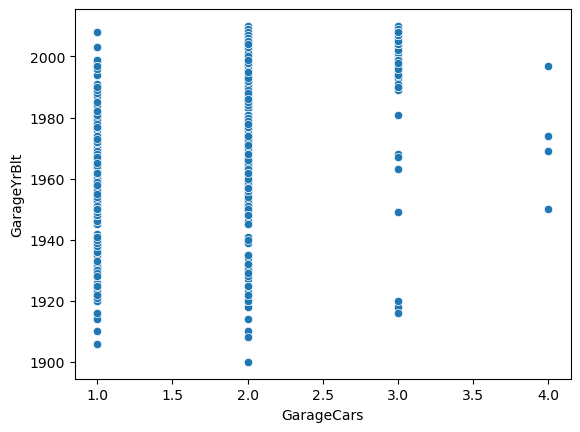

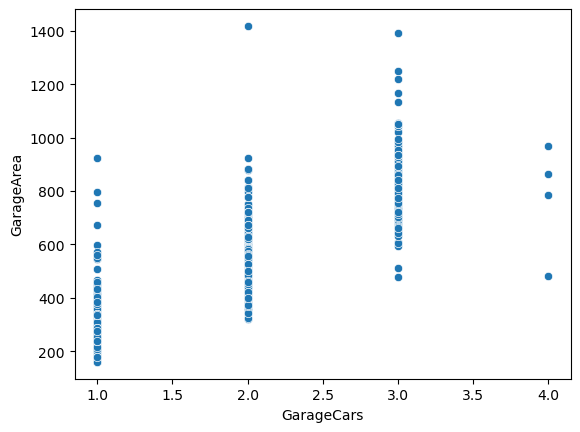

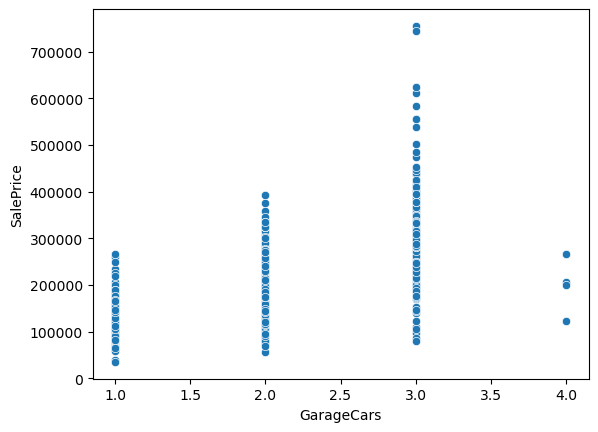

In [61]:
for i in GarageCars:
    sns.scatterplot(x = df['GarageCars'],y = df[i],legend = 'full')
    plt.show()

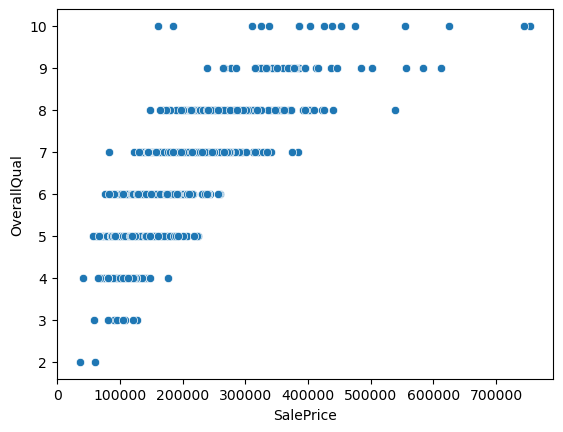

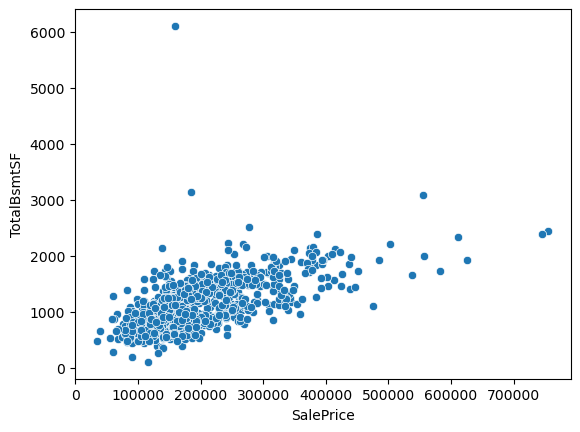

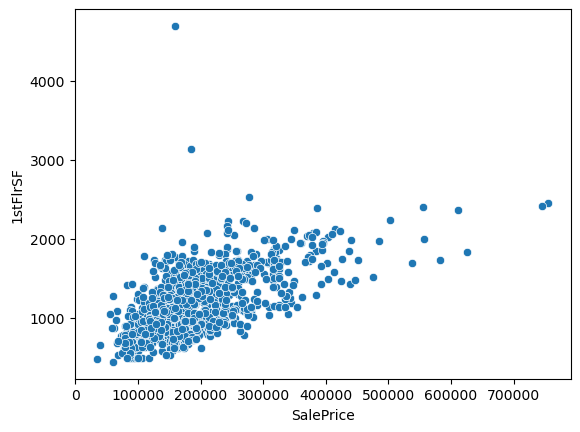

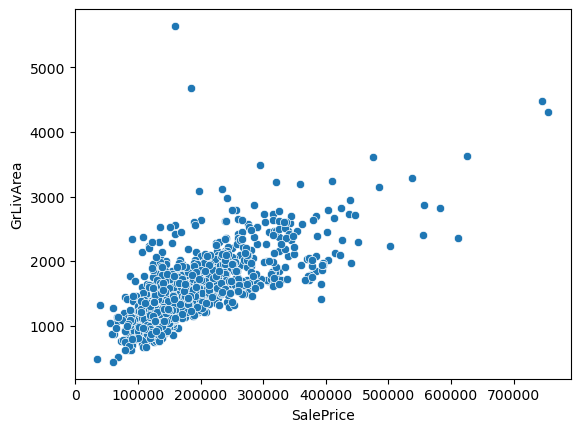

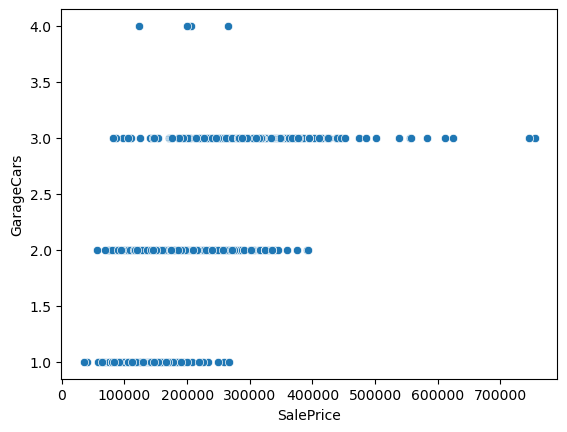

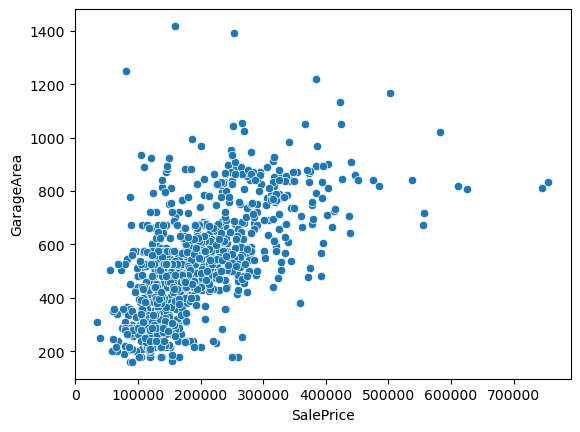

In [62]:
for i in SalePrice:
    sns.scatterplot(x = df['SalePrice'],y = df[i],legend = 'full')
    plt.show()

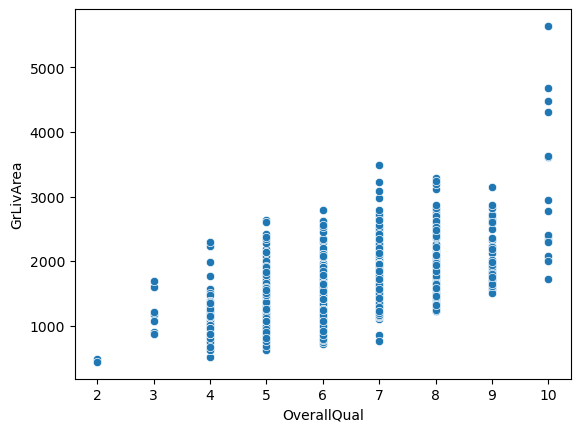

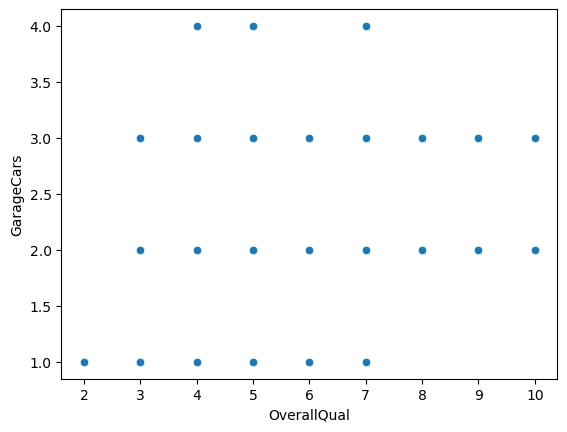

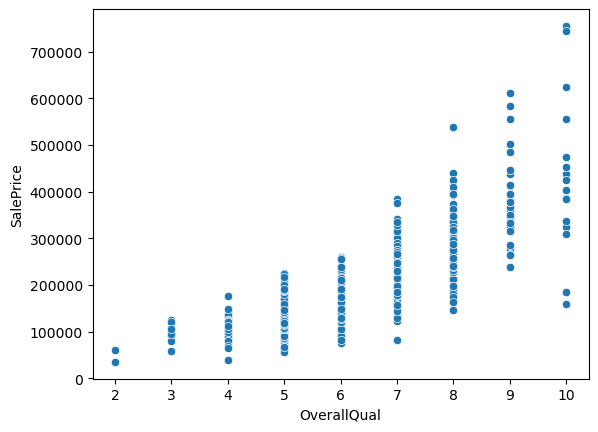

In [63]:
for i in overallQuall:
    sns.scatterplot(x = df['OverallQual'],y = df[i],legend = 'full')
    plt.show()

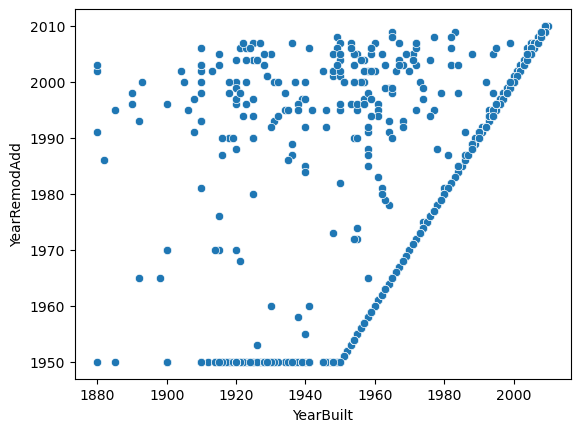

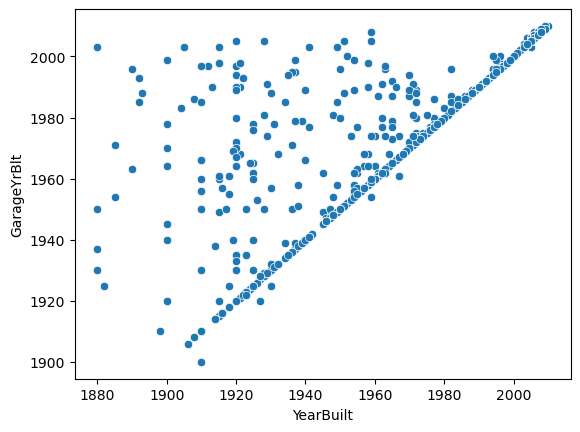

In [64]:
for i in yearbuilt:
    sns.scatterplot(x = df['YearBuilt'],y = df[i],legend = 'full')
    plt.show()

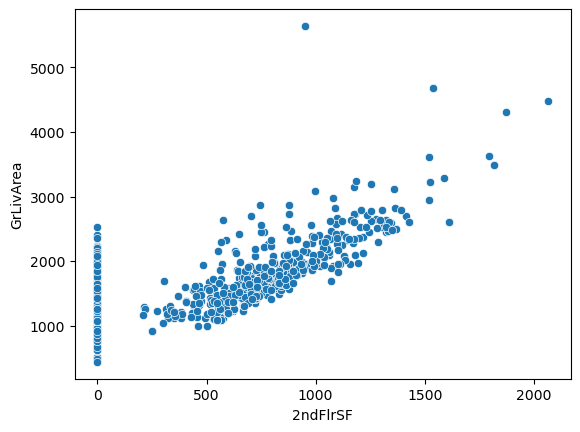

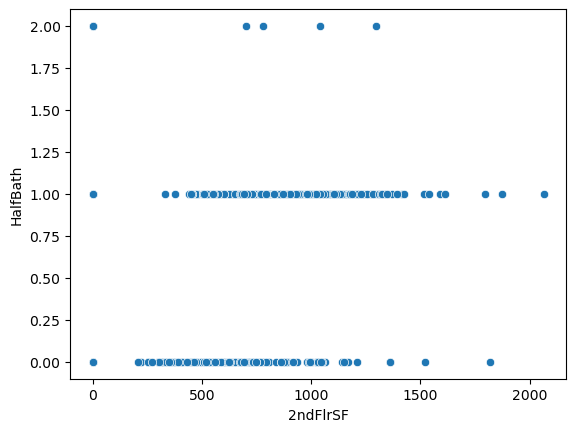

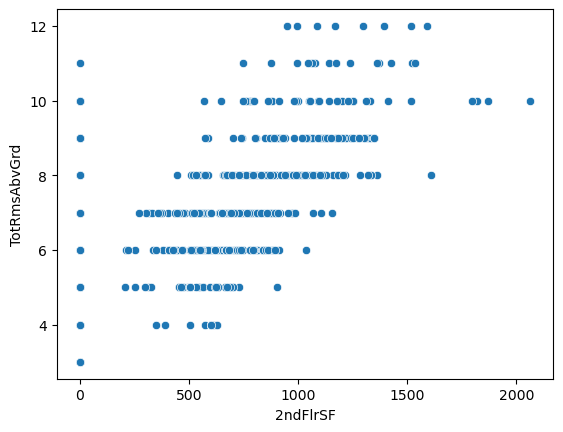

In [65]:
for i in secondndFlrSF:
    sns.scatterplot(x = df['2ndFlrSF'],y = df[i],legend = 'full')
    plt.show()

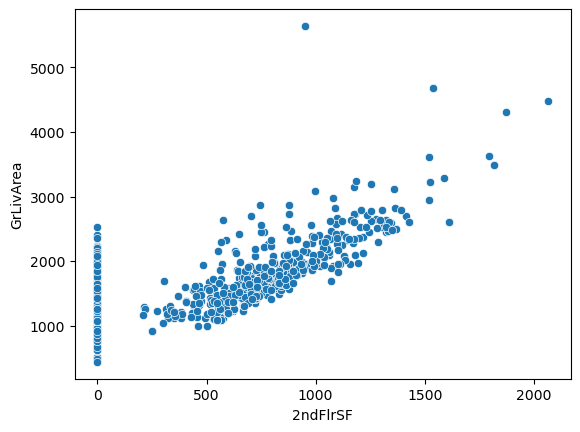

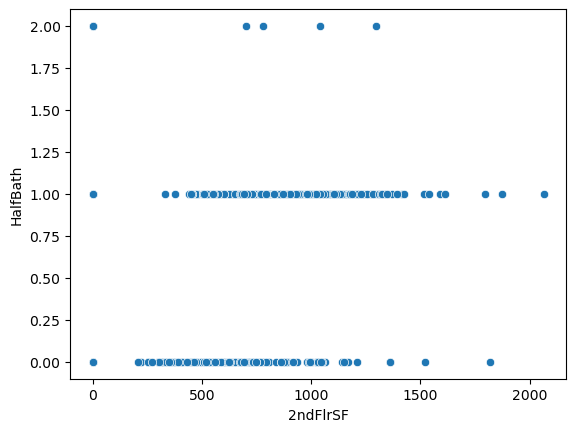

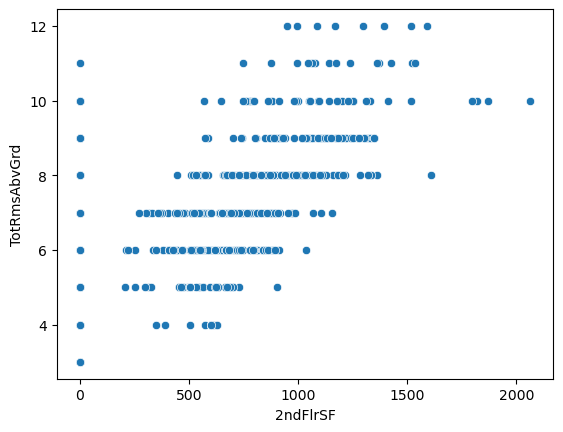

In [66]:
for i in secondndFlrSF:
    sns.scatterplot(x = df['2ndFlrSF'],y = df[i],legend = 'full')
    plt.show()

In [67]:


drop_column = ['YearBuilt','2ndFlrSF','GarageYrBlt']

In [68]:
df.drop(drop_column,axis = 1,inplace = True)

In [69]:
print(num_cols)

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [70]:
for i in drop_column:
    num_cols.remove(i)

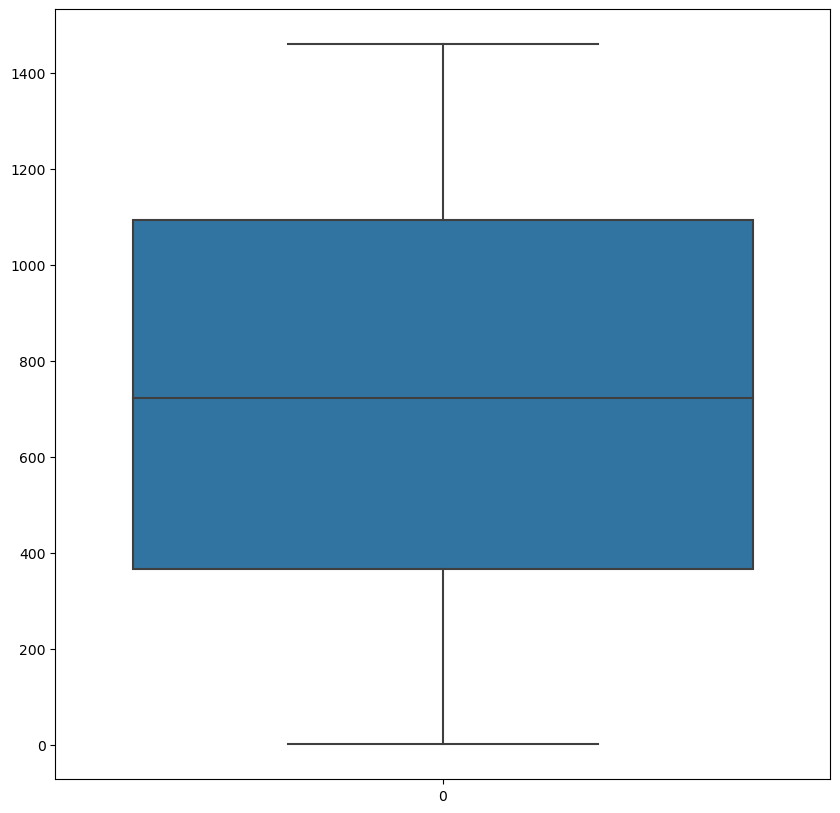

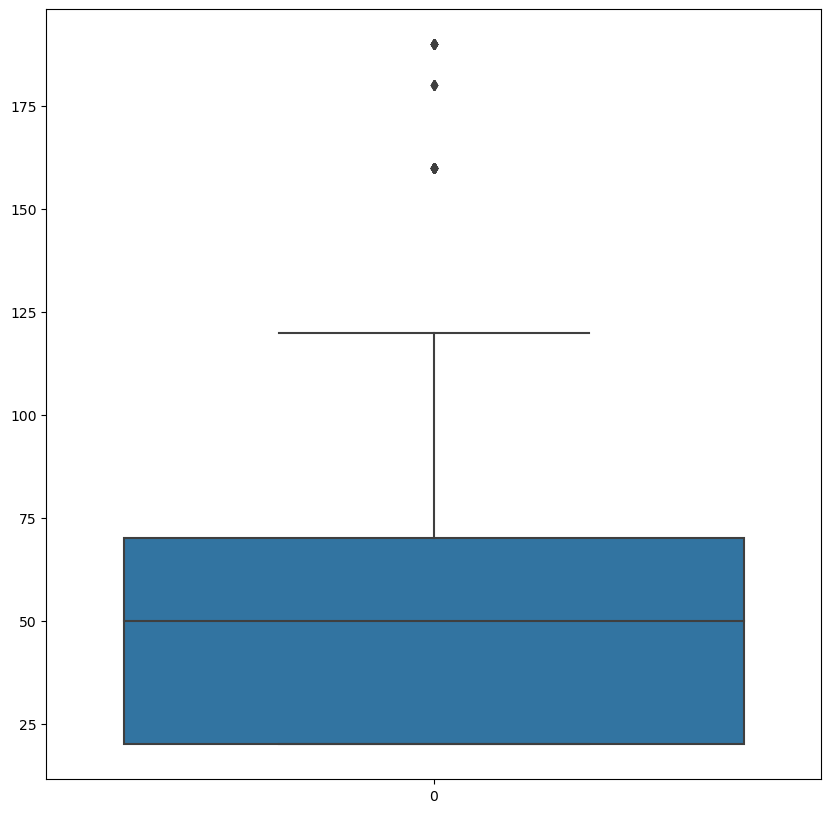

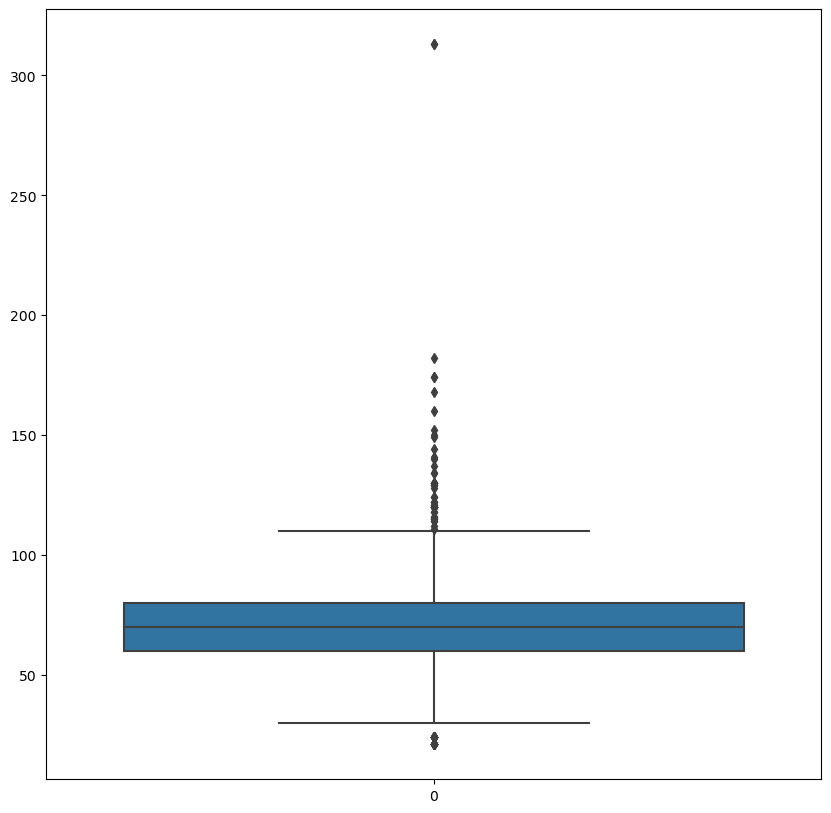

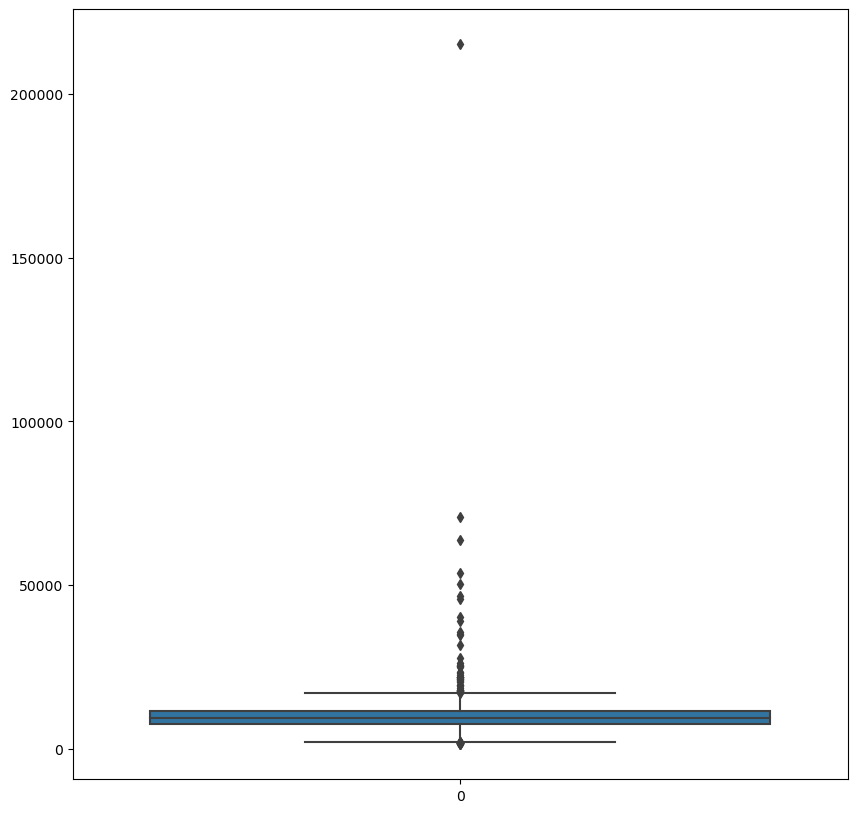

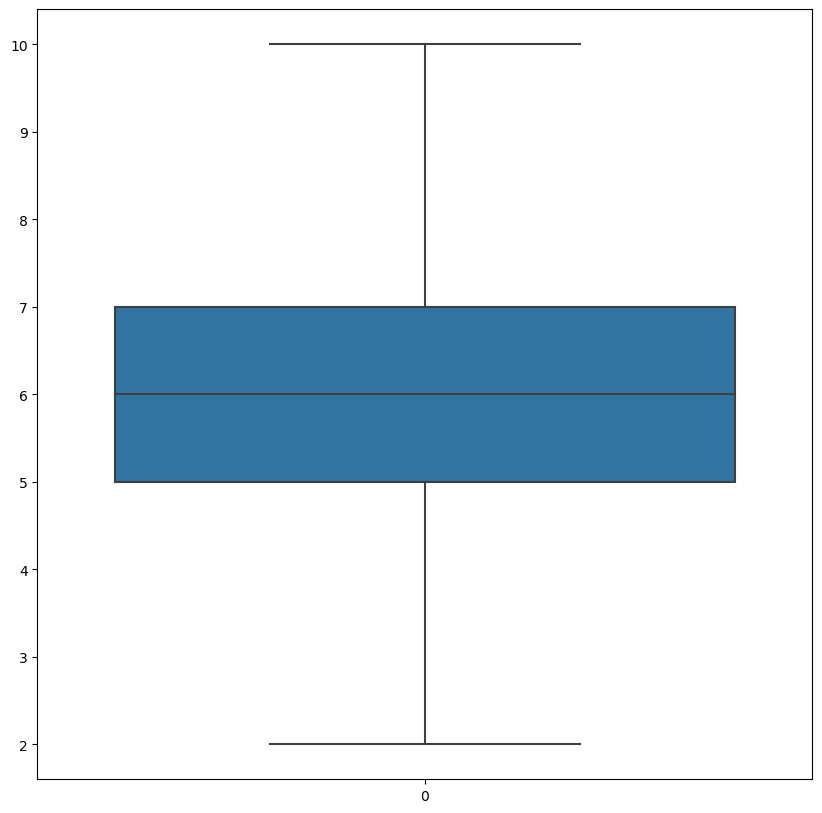

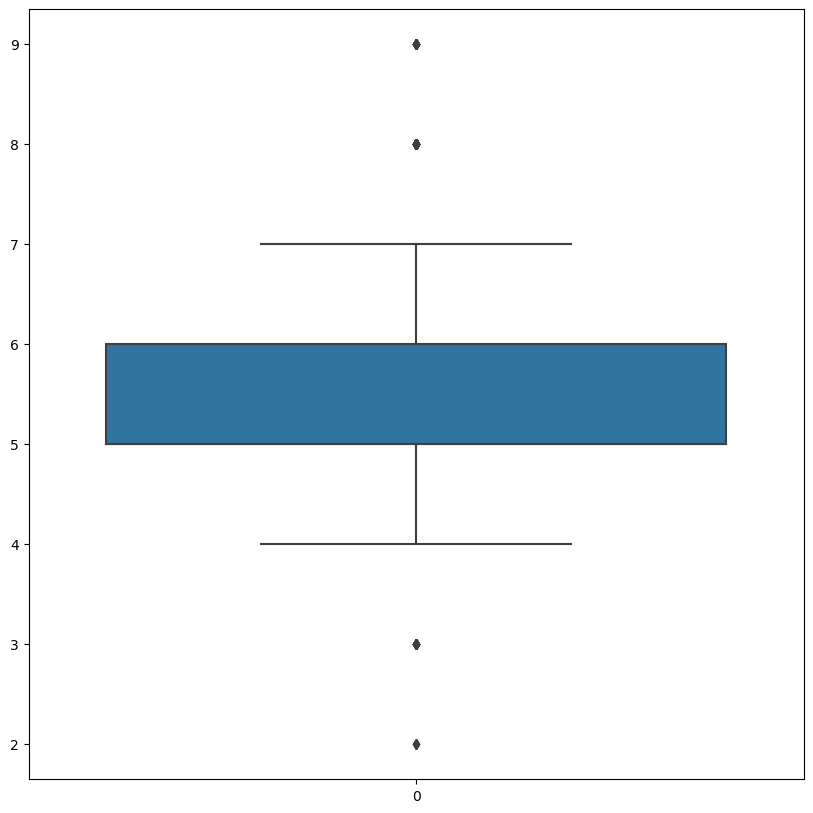

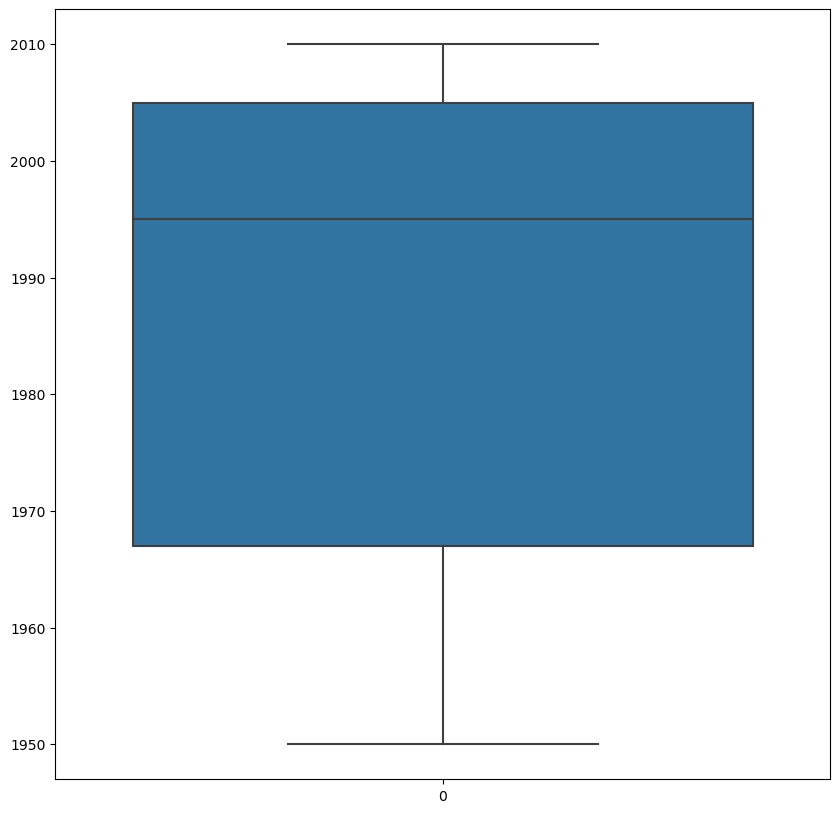

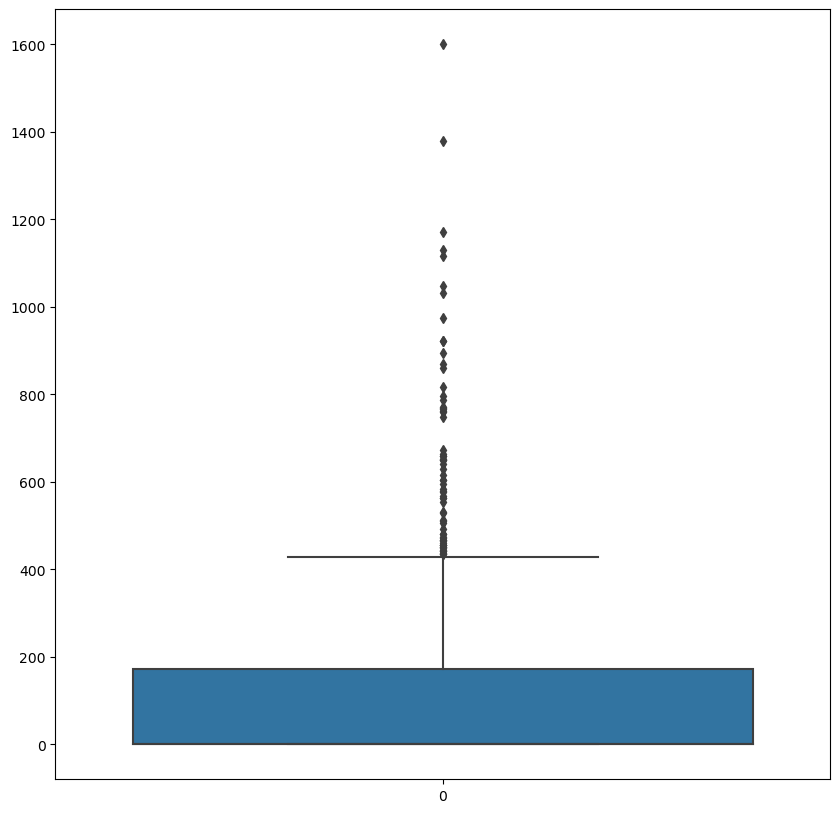

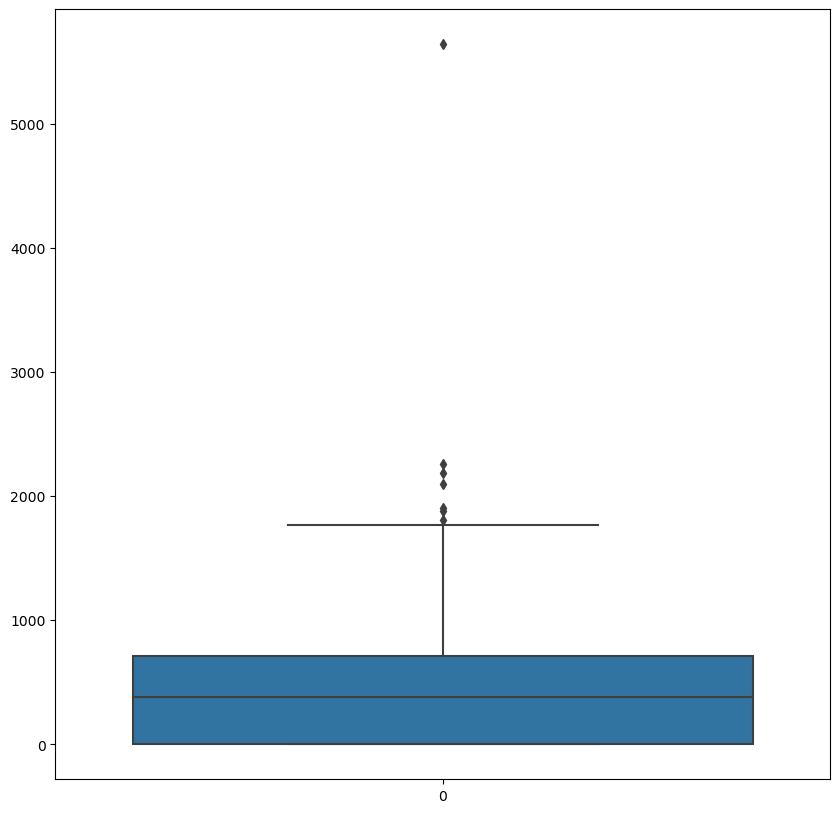

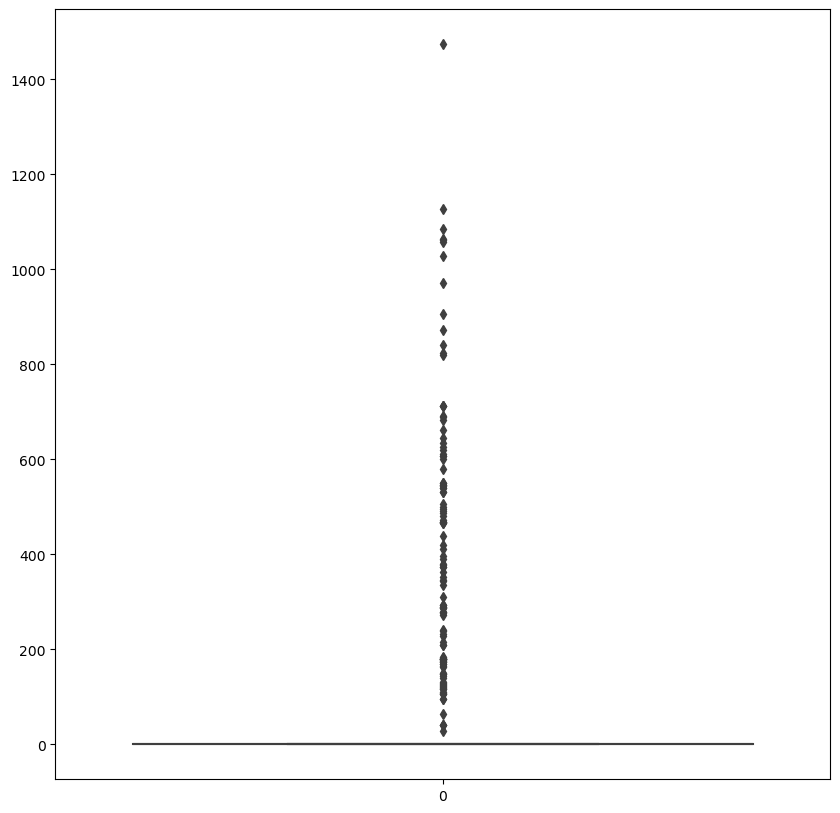

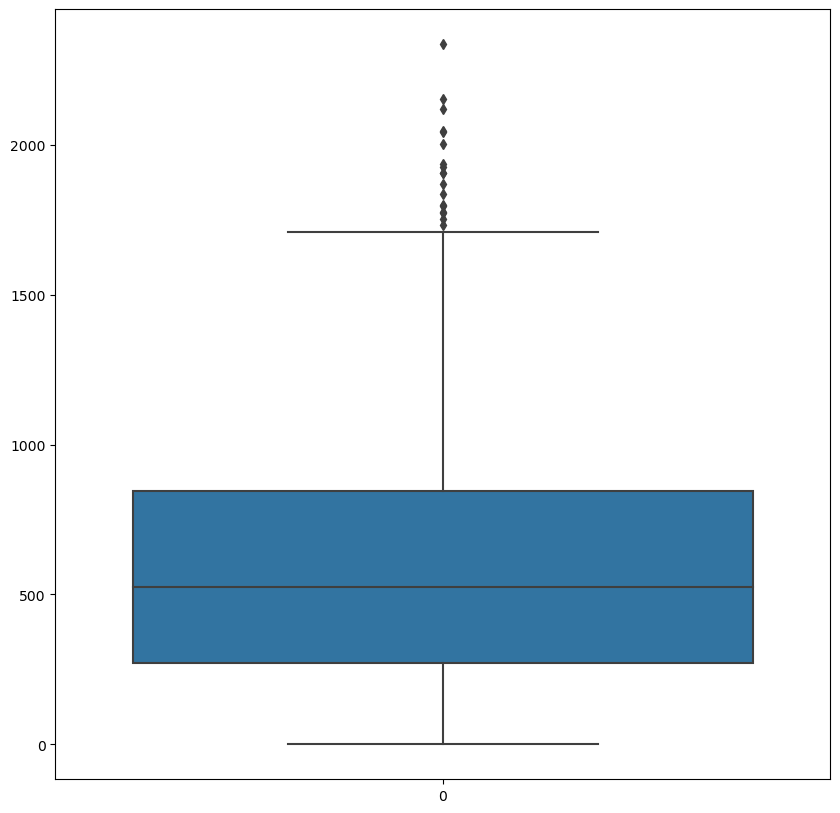

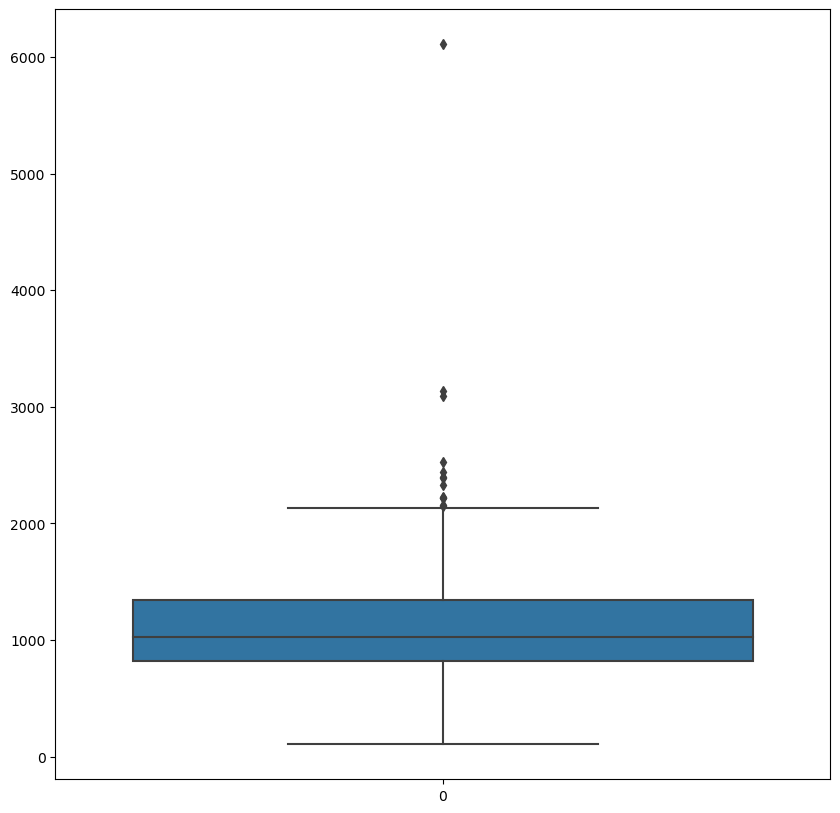

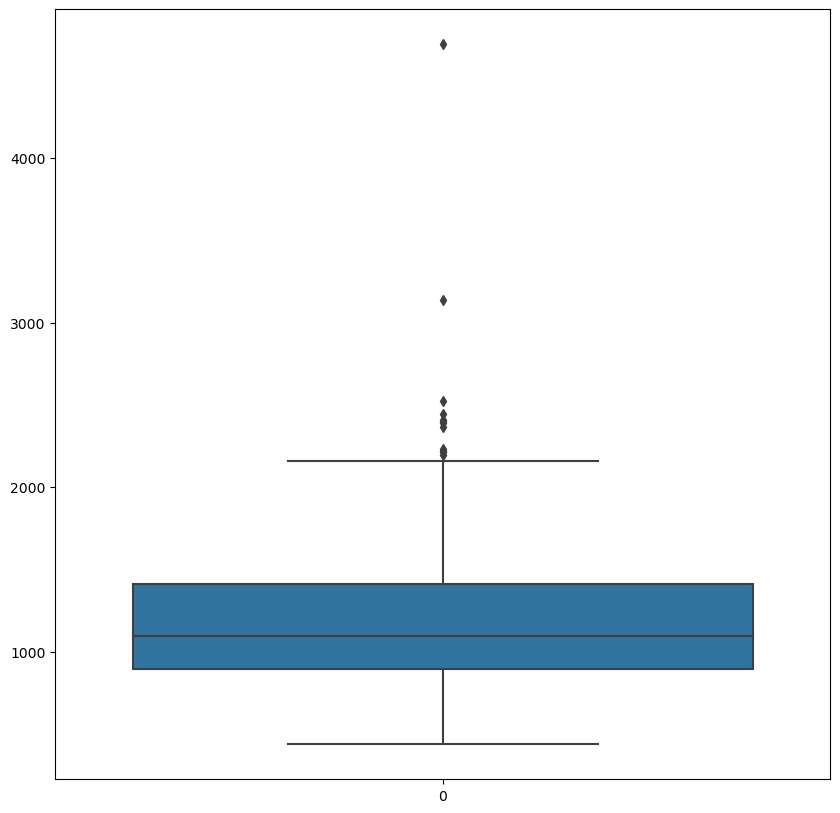

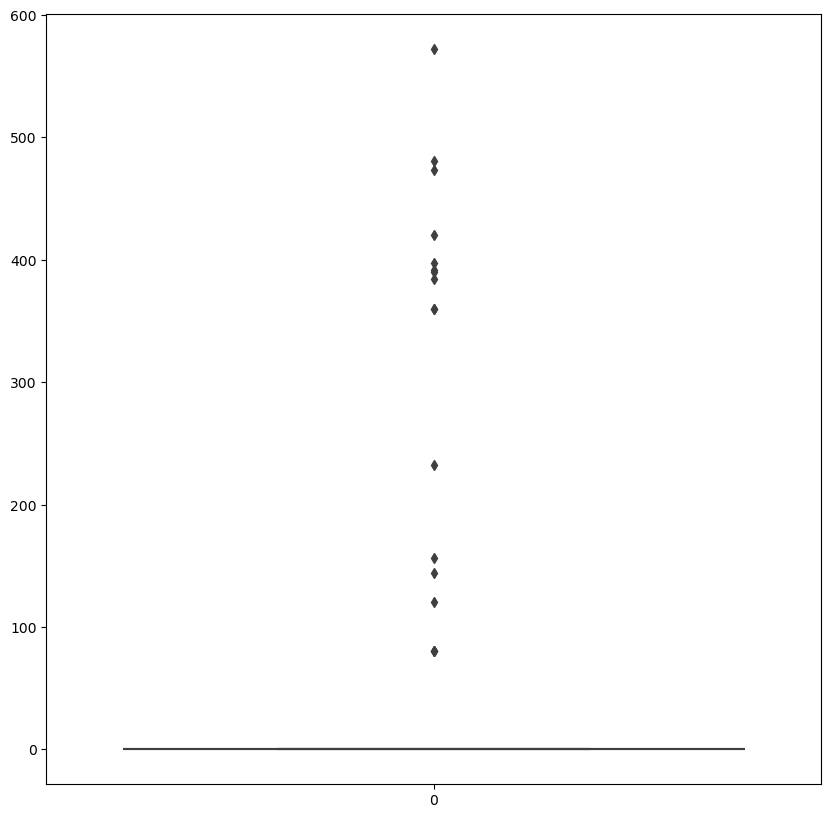

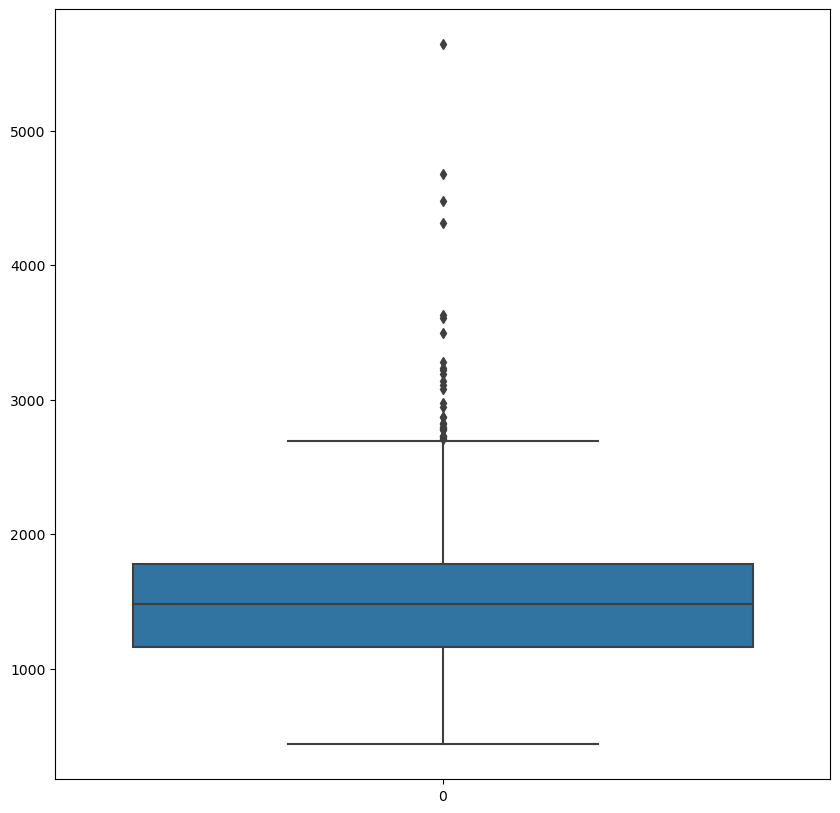

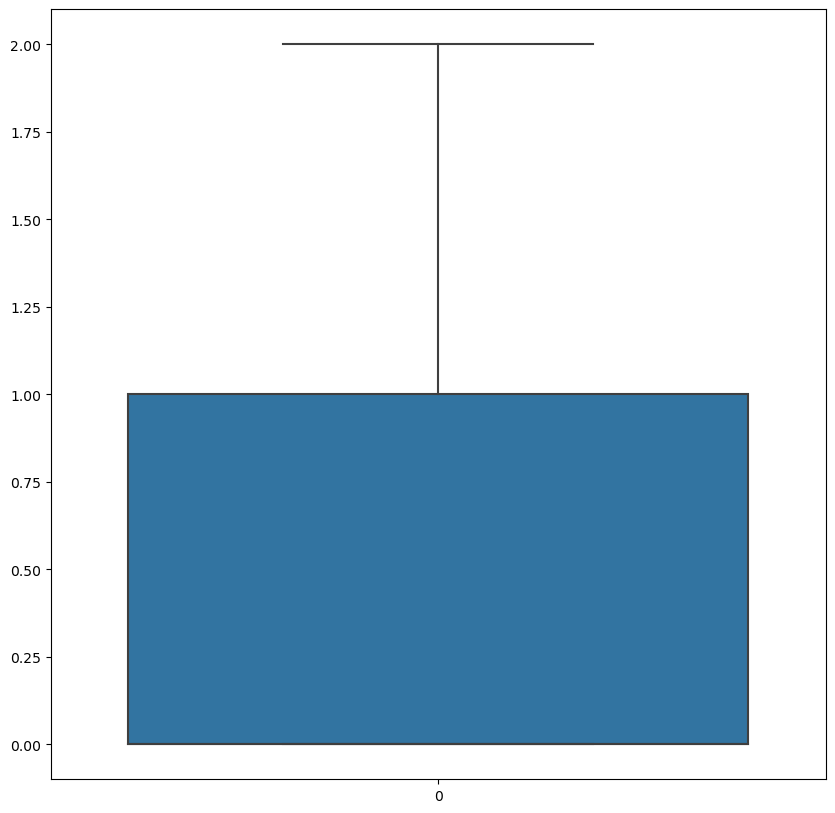

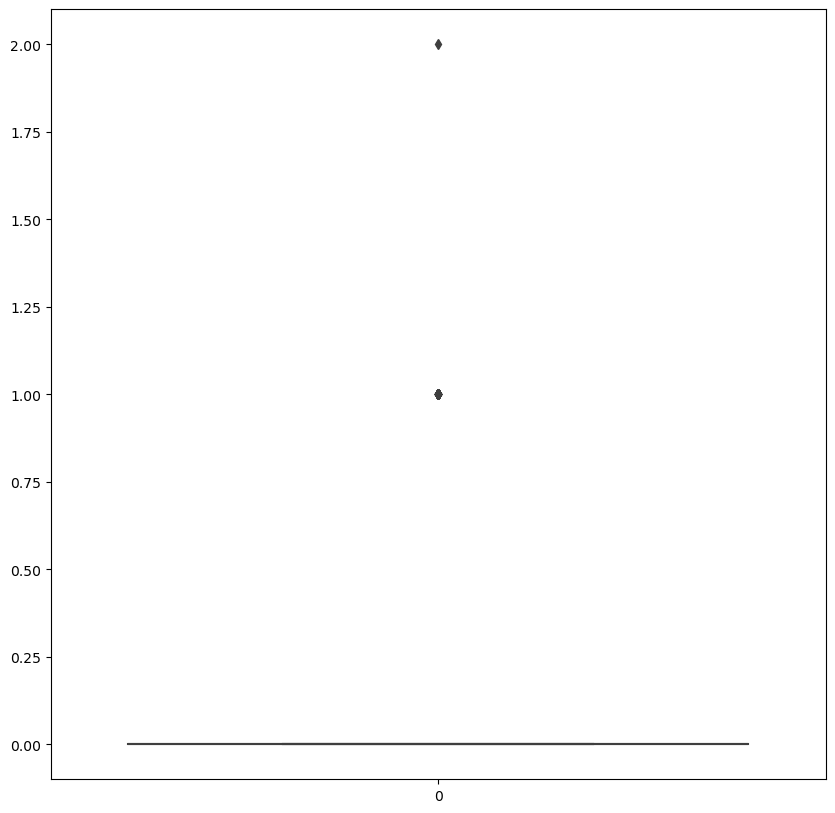

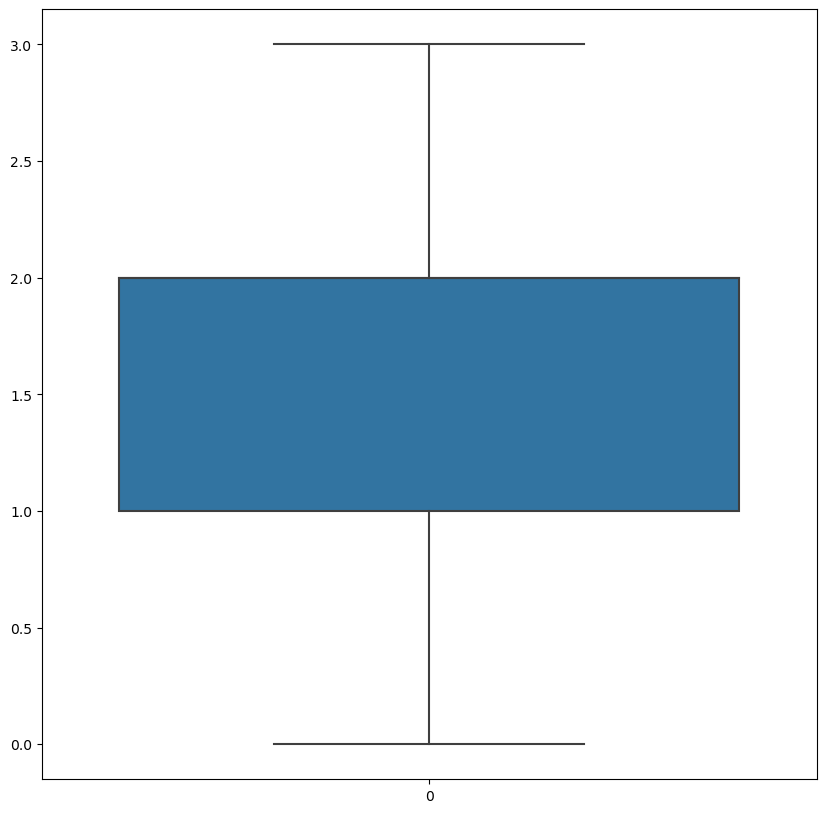

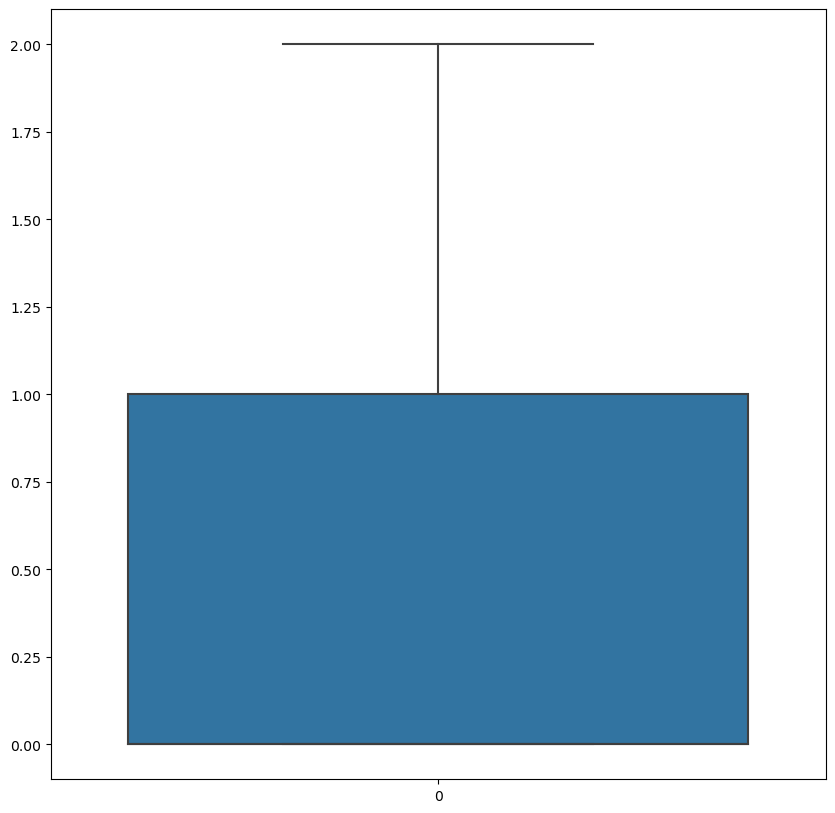

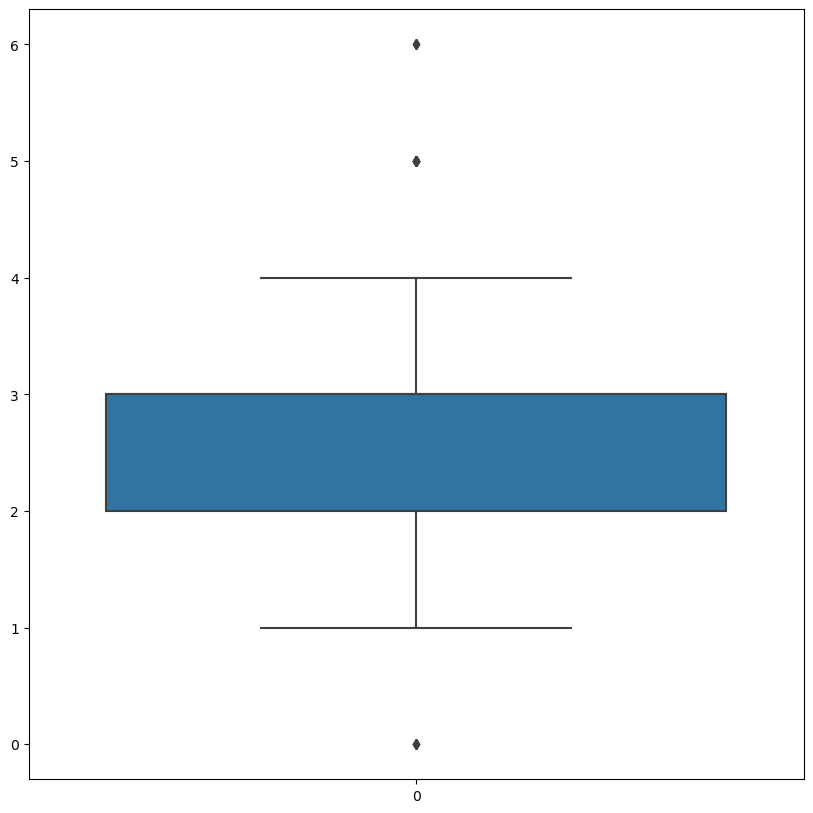

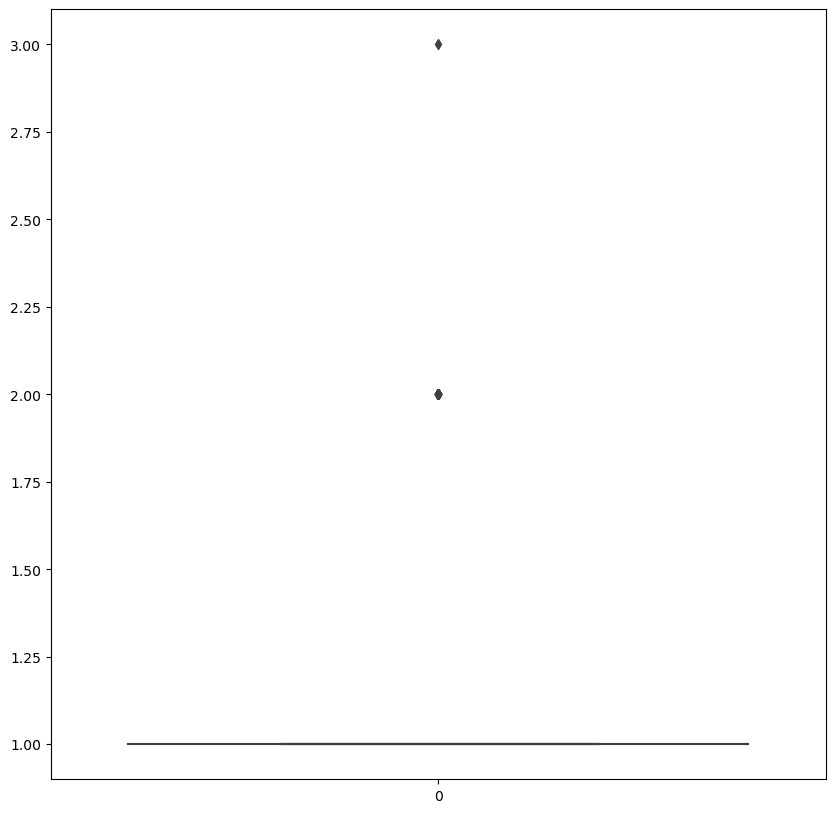

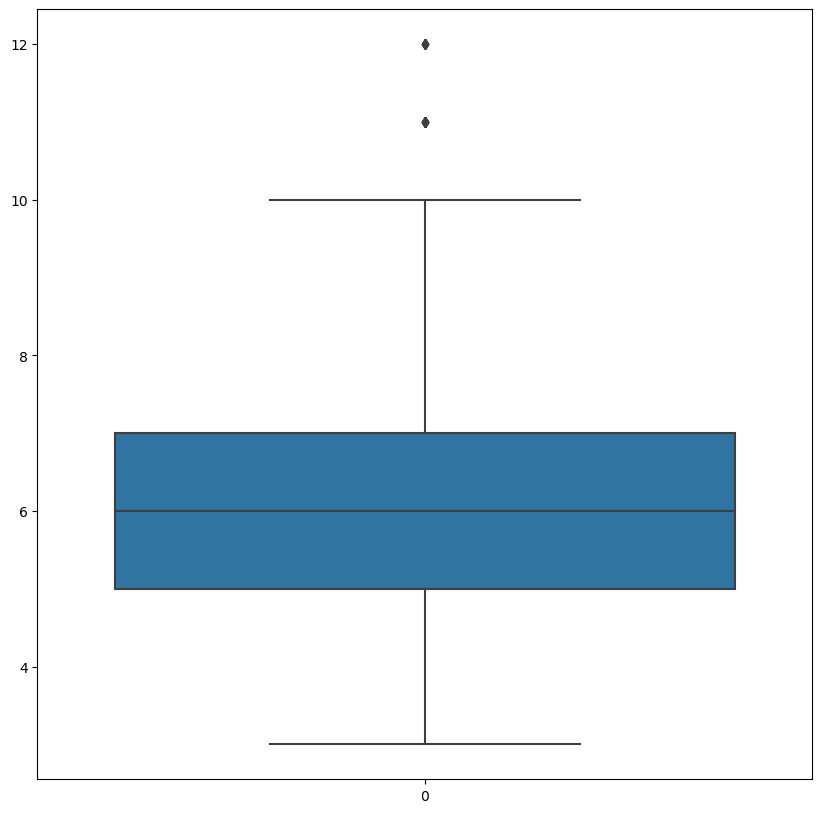

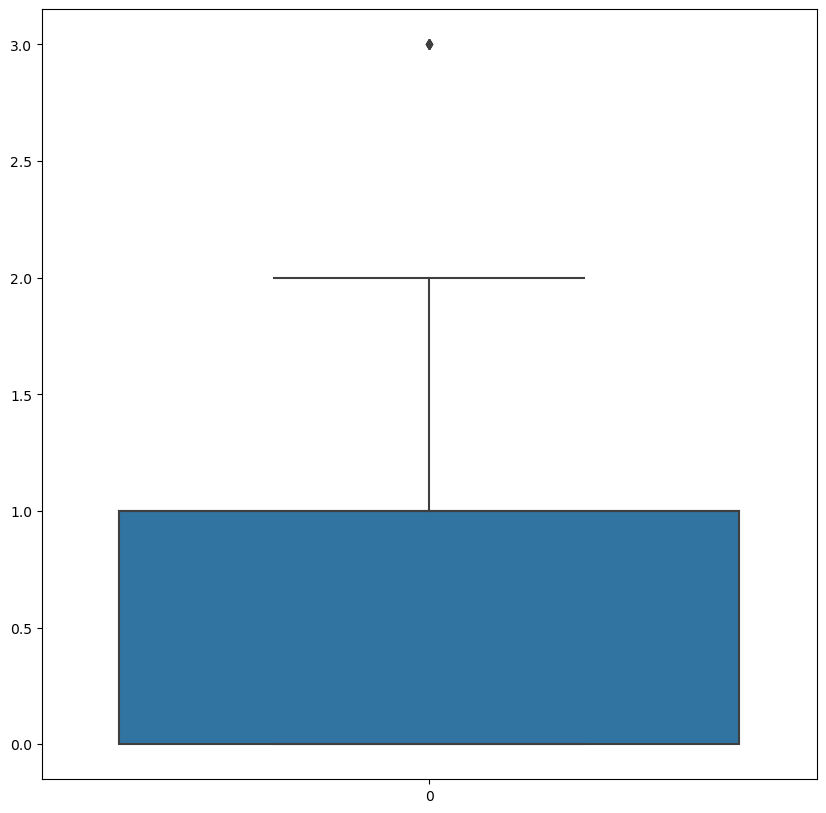

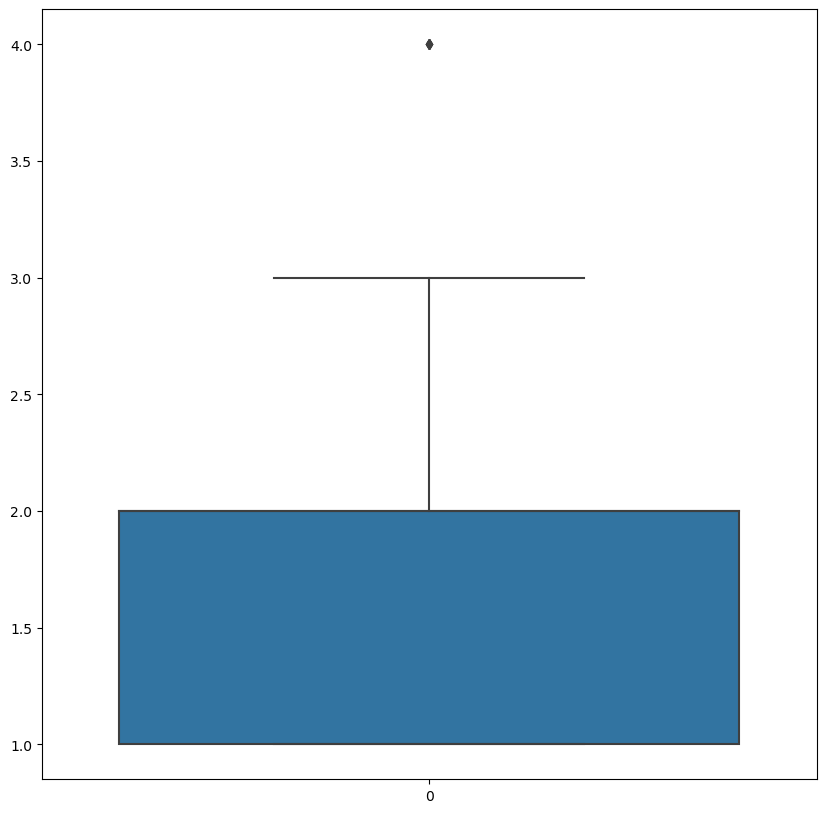

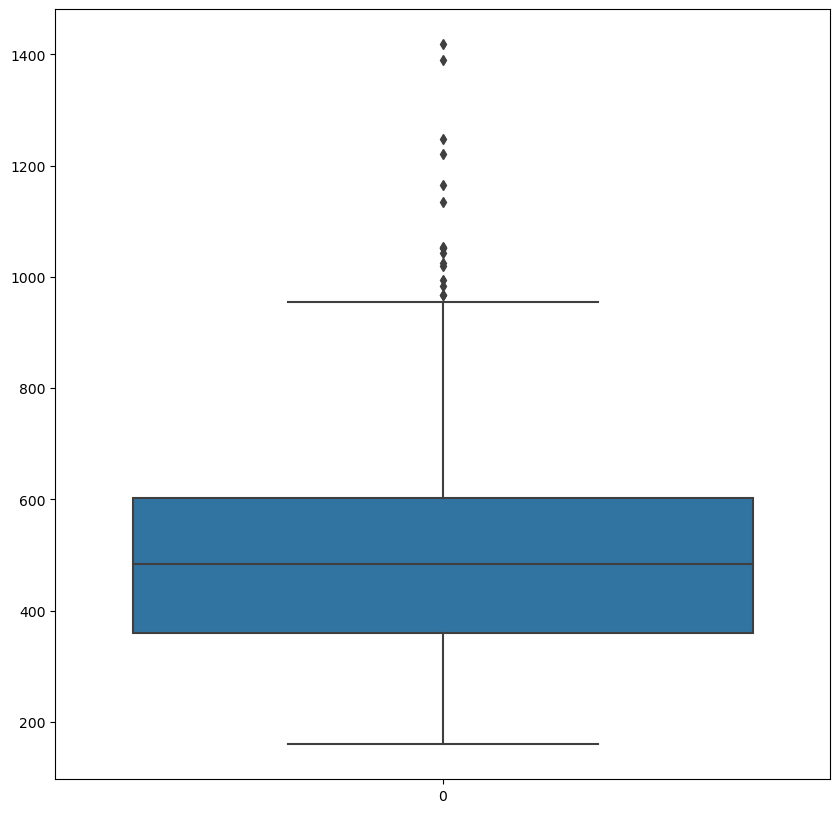

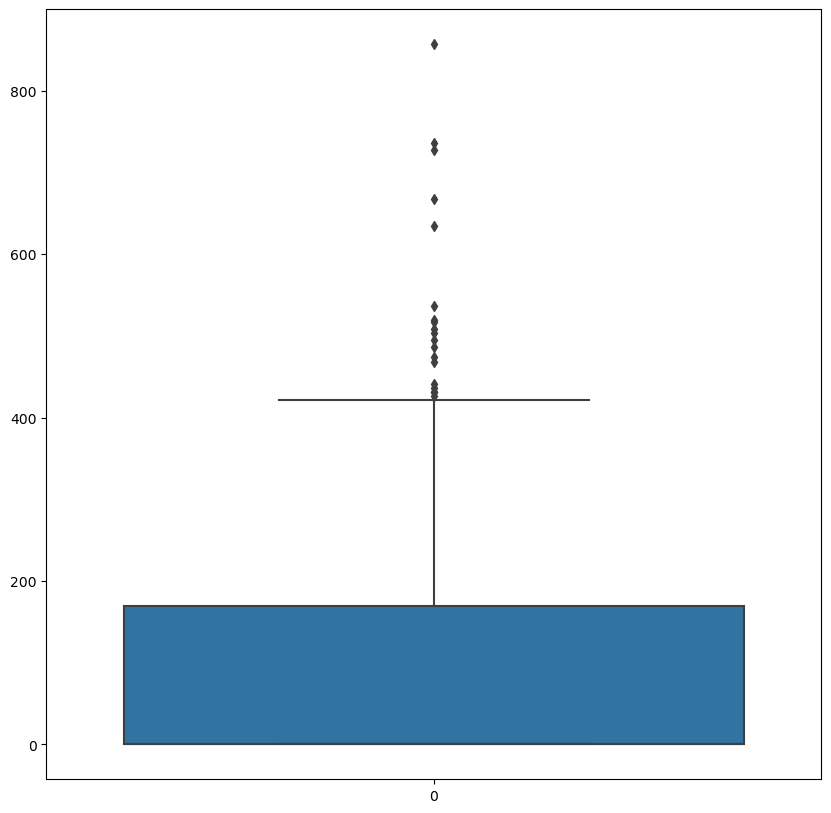

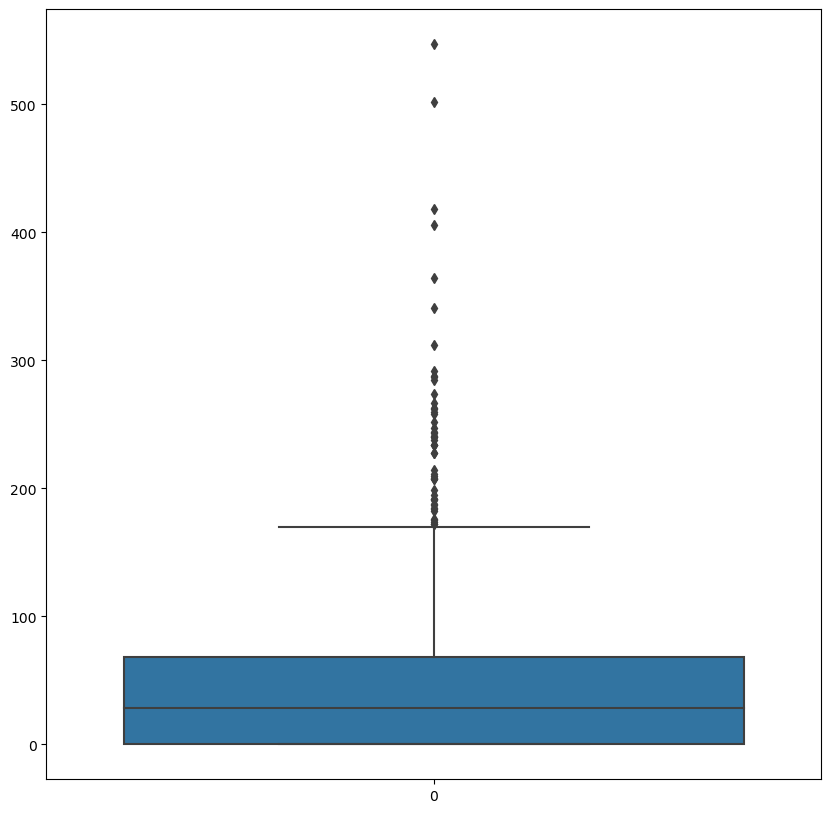

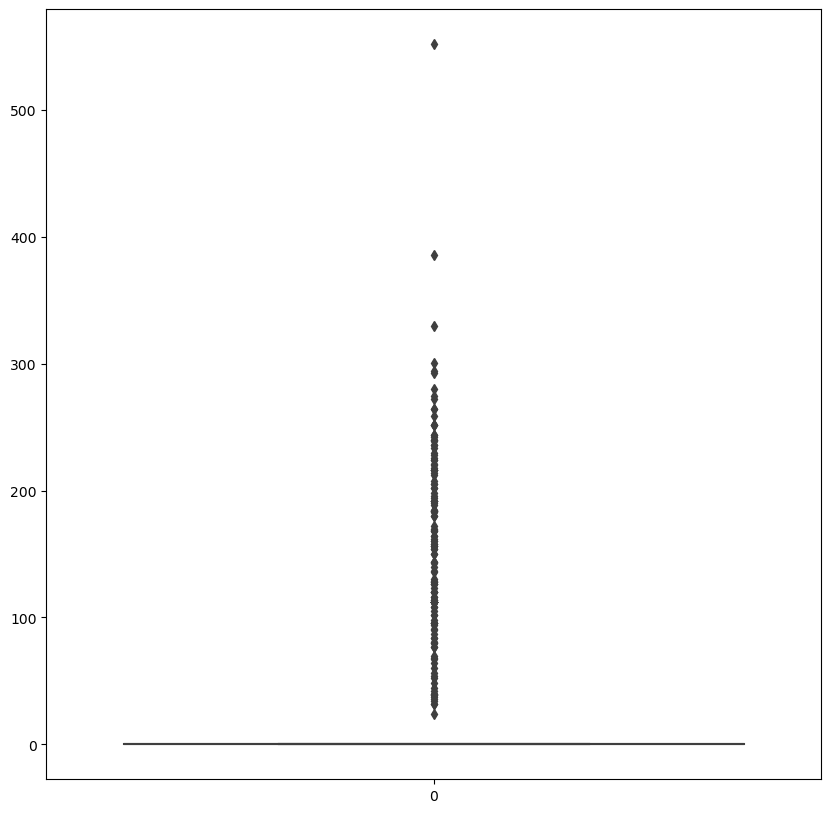

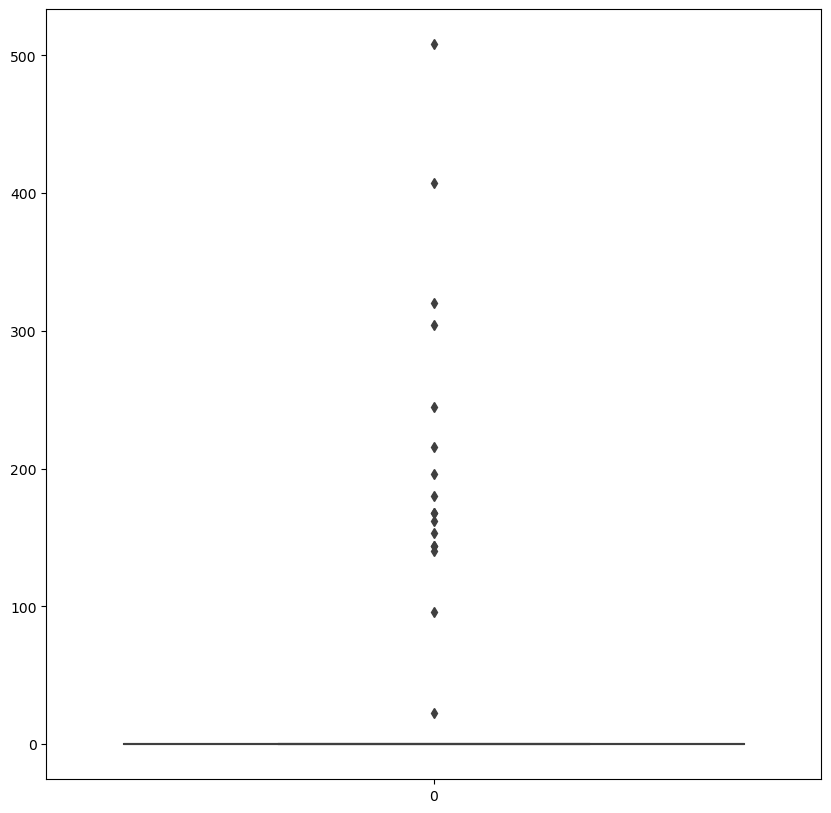

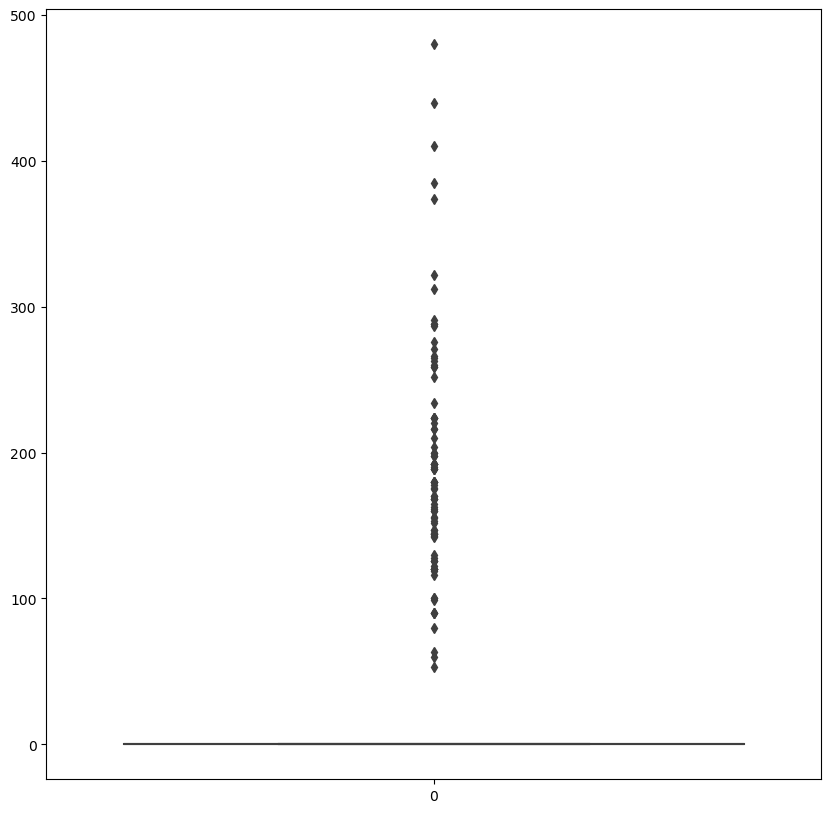

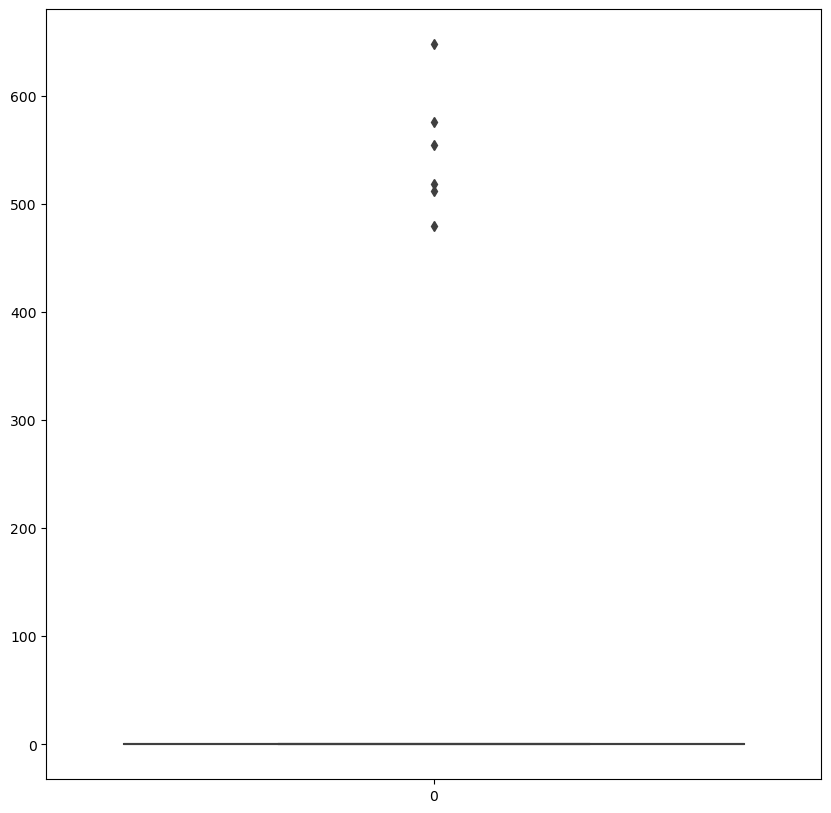

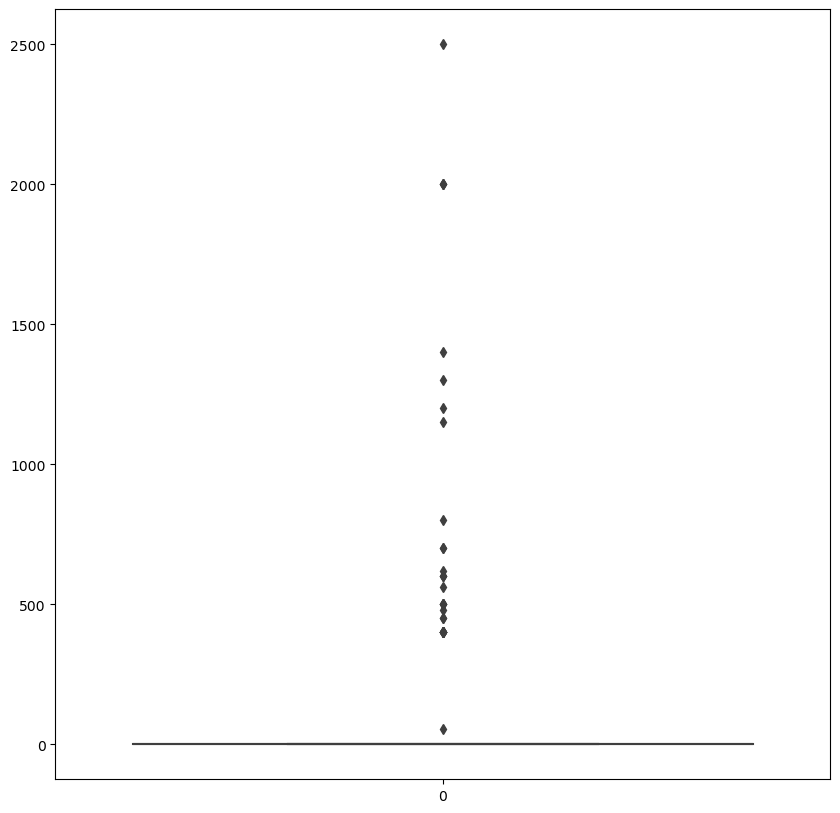

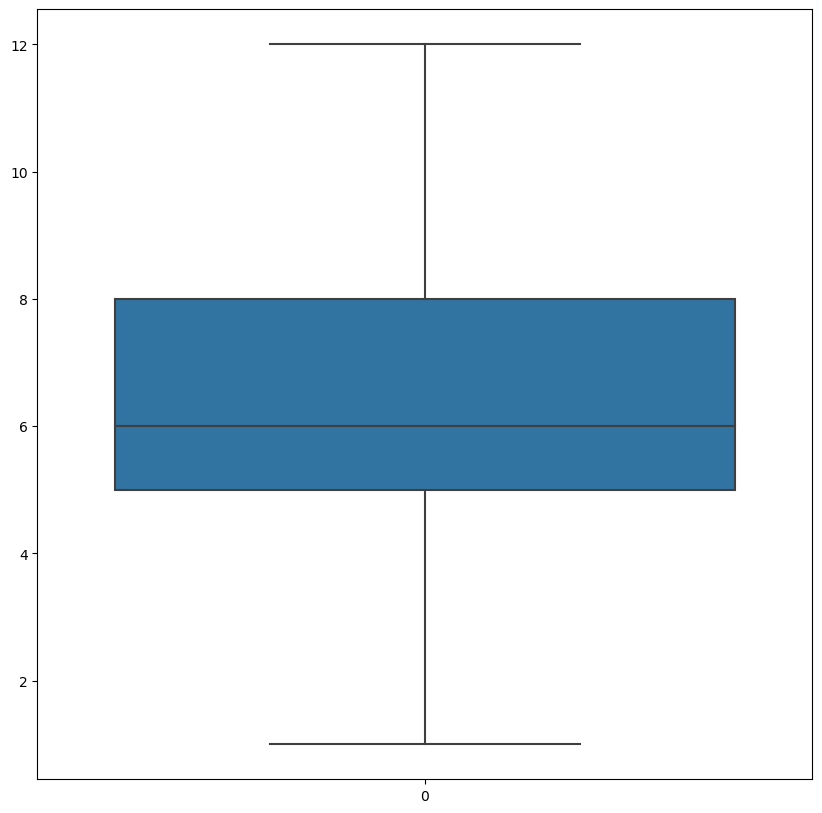

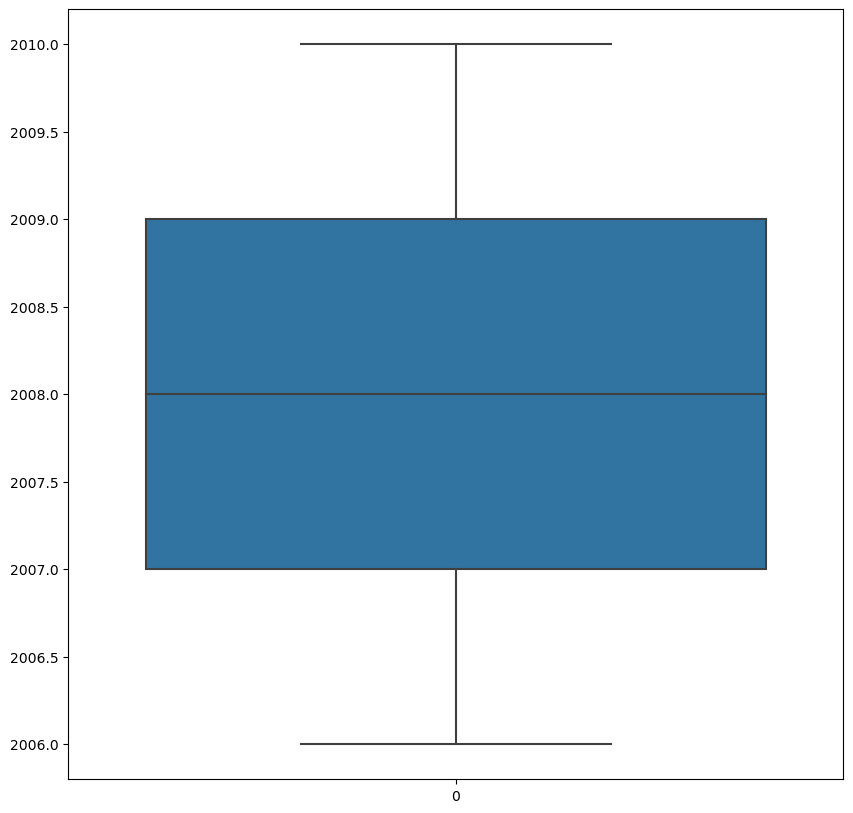

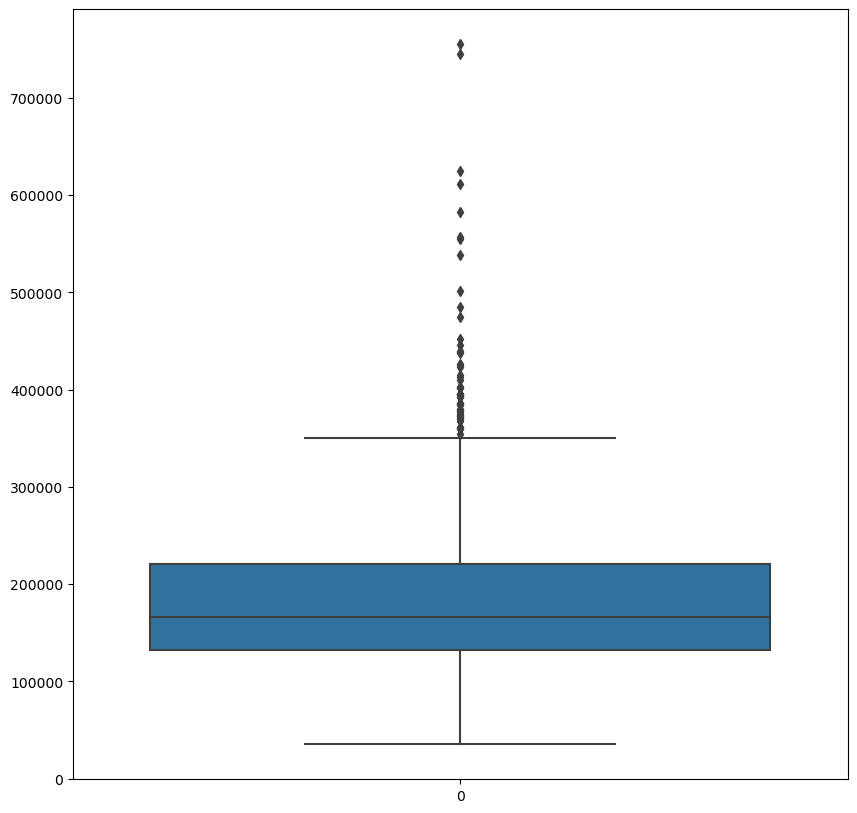

In [71]:
for i in num_cols:
    plt.figure(figsize=(10,10))
    sns.boxplot(data = df[i], orient = 'v')
    plt.show()

In [72]:
df = pd.get_dummies(df, columns=cat_cols,drop_first=True,dtype = 'int')

In [73]:
df.shape

(1094, 217)

In [74]:
df.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0   1          60         65.0     8450            7            5   
1   2          20         80.0     9600            6            8   
2   3          60         68.0    11250            7            5   
3   4          70         60.0     9550            7            5   
4   5          60         84.0    14260            8            5   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  SaleType_ConLI  \
0          2003       196.0         706           0  ...               0   
1          1976         0.0         978           0  ...               0   
2          2002       162.0         486           0  ...               0   
3          1970         0.0         216           0  ...               0   
4          2000       350.0         655           0  ...               0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 217 columns]

In [75]:
scaler = MinMaxScaler()
df[df.columns] = scaler.fit_transform(df[df.columns])

In [76]:
df

Id  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
0     0.000000    0.235294     0.150685  0.033420        0.625     0.428571   
1     0.000685    0.000000     0.202055  0.038795        0.500     0.857143   
2     0.001371    0.235294     0.160959  0.046507        0.625     0.428571   
3     0.002056    0.294118     0.133562  0.038561        0.625     0.428571   
4     0.002742    0.235294     0.215753  0.060576        0.750     0.428571   
...        ...         ...          ...       ...          ...          ...   
1455  0.997258    0.235294     0.140411  0.030929        0.500     0.428571   
1456  0.997944    0.000000     0.219178  0.055505        0.500     0.571429   
1457  0.998629    0.294118     0.154110  0.036187        0.625     1.000000   
1458  0.999315    0.000000     0.160959  0.039342        0.375     0.571429   
1459  1.000000    0.000000     0.184932  0.040370        0.375     0.571429   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  SaleType_ConLI  \
0         0.883333    0.122500    0.125089    0.000000  ...             0.0   
1         0.433333    0.000000    0.173281    0.000000  ...             0.0   
2         0.866667    0.101250    0.086109    0.000000  ...             0.0   
3         0.333333    0.000000    0.038271    0.000000  ...             0.0   
4         0.833333    0.218750    0.116052    0.000000  ...             0.0   
...            ...         ...         ...         ...  ...             ...   
1455      0.833333    0.000000    0.000000    0.000000  ...             0.0   
1456      0.633333    0.074375    0.139972    0.110583  ...             0.0   
1457      0.933333    0.000000    0.048724    0.000000  ...             0.0   
1458      0.766667    0.000000    0.008682    0.698100  ...             0.0   
1459      0.250000    0.000000    0.147059    0.196744  ...             0.0   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0                0.0           0.0           0.0          1.0   
1                0.0           0.0           0.0          1.0   
2                0.0           0.0           0.0          1.0   
3                0.0           0.0           0.0          1.0   
4                0.0           0.0           0.0          1.0   
...              ...           ...           ...          ...   
1455             0.0           0.0           0.0          1.0   
1456             0.0           0.0           0.0          1.0   
1457             0.0           0.0           0.0          1.0   
1458             0.0           0.0           0.0          1.0   
1459             0.0           0.0           0.0          1.0   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                       0.0                   0.0                   0.0   
1                       0.0                   0.0                   0.0   
2                       0.0                   0.0                   0.0   
3                       0.0                   0.0                   0.0   
4                       0.0                   0.0                   0.0   
...                     ...                   ...                   ...   
1455                    0.0                   0.0                   0.0   
1456                    0.0                   0.0                   0.0   
1457                    0.0                   0.0                   0.0   
1458                    0.0                   0.0                   0.0   
1459                    0.0                   0.0                   0.0   

      SaleCondition_Normal  SaleCondition_Partial  
0                      1.0                    0.0  
1                      1.0                    0.0  
2                      1.0                    0.0  
3                      0.0                    0.0  
4                      1.0                    0.0  
...                    ...                    ...  
1455                   1.0                    0.0  
1456            

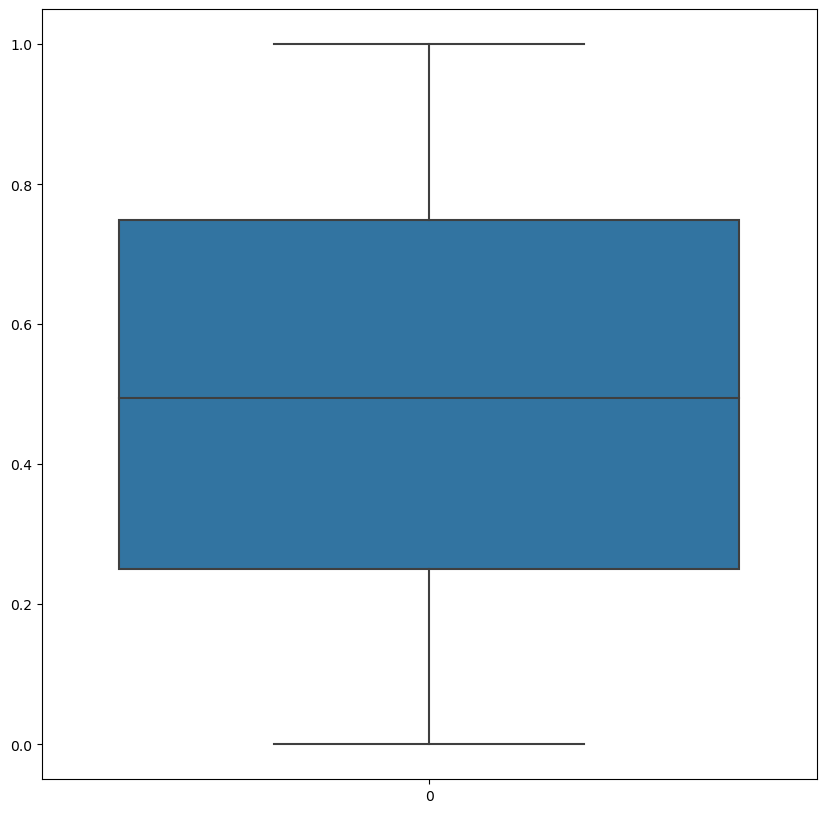

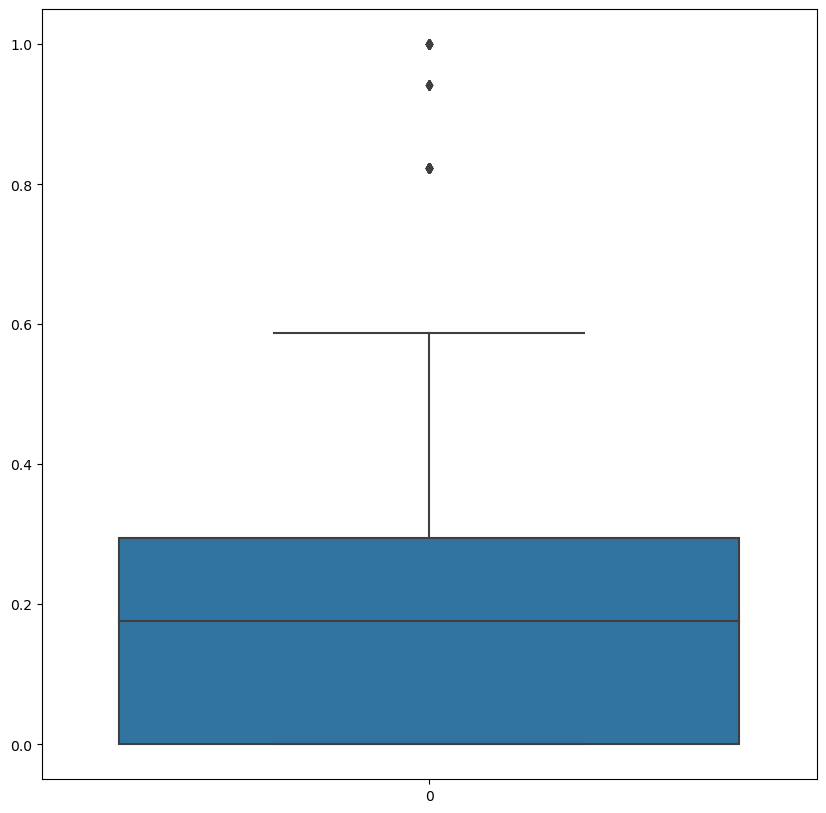

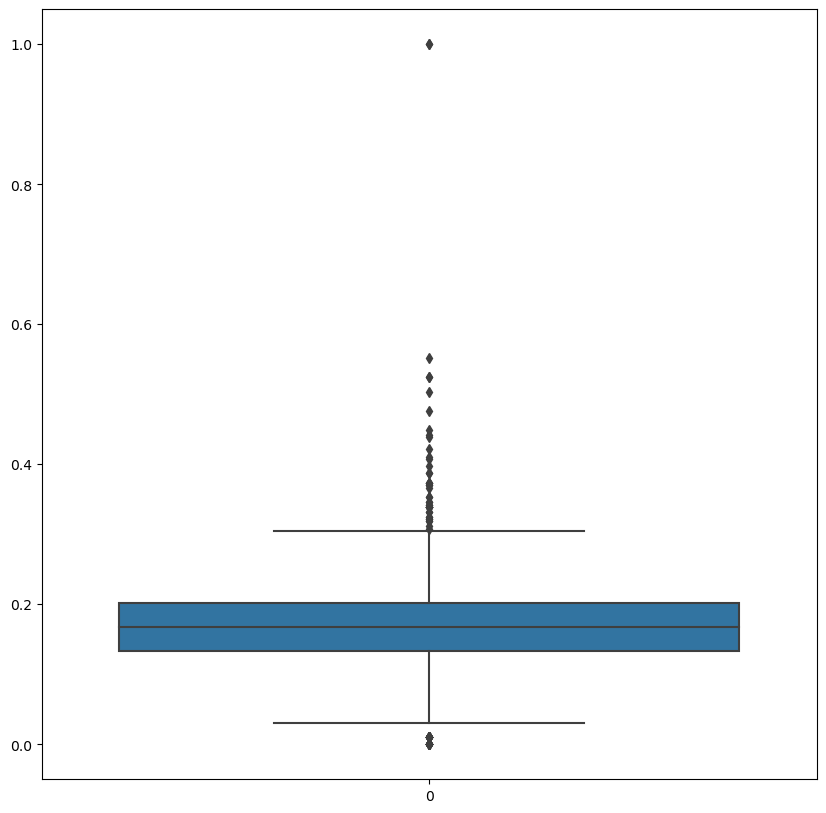

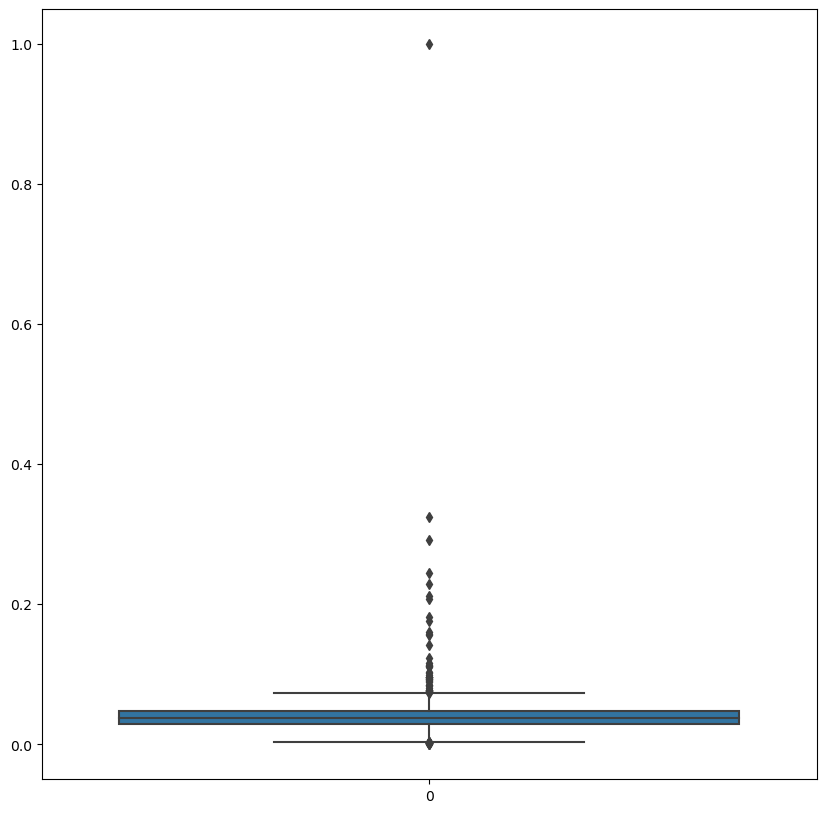

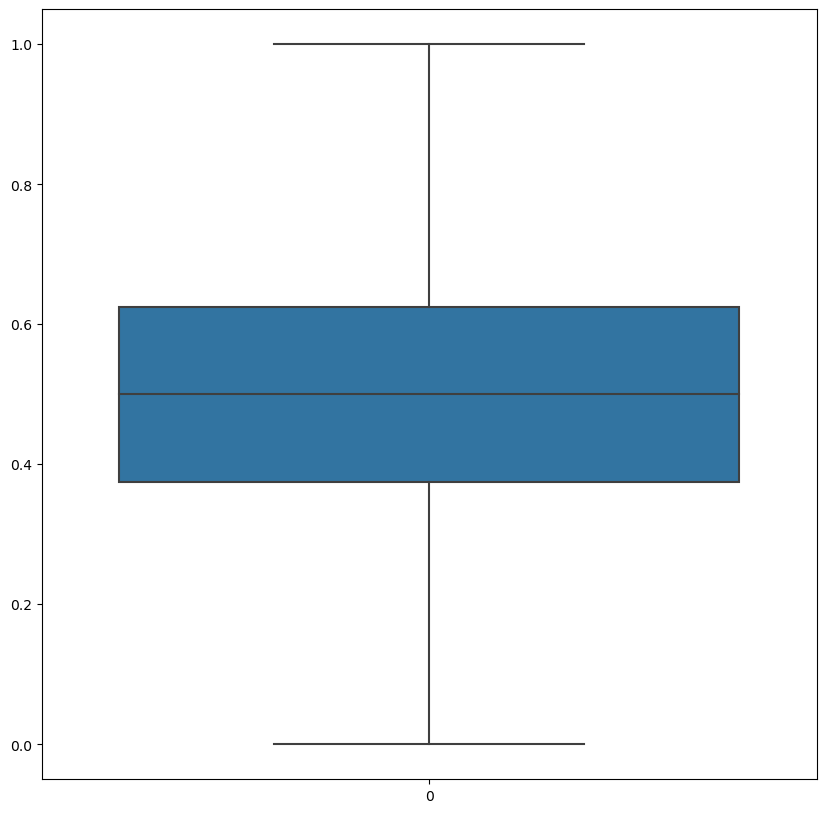

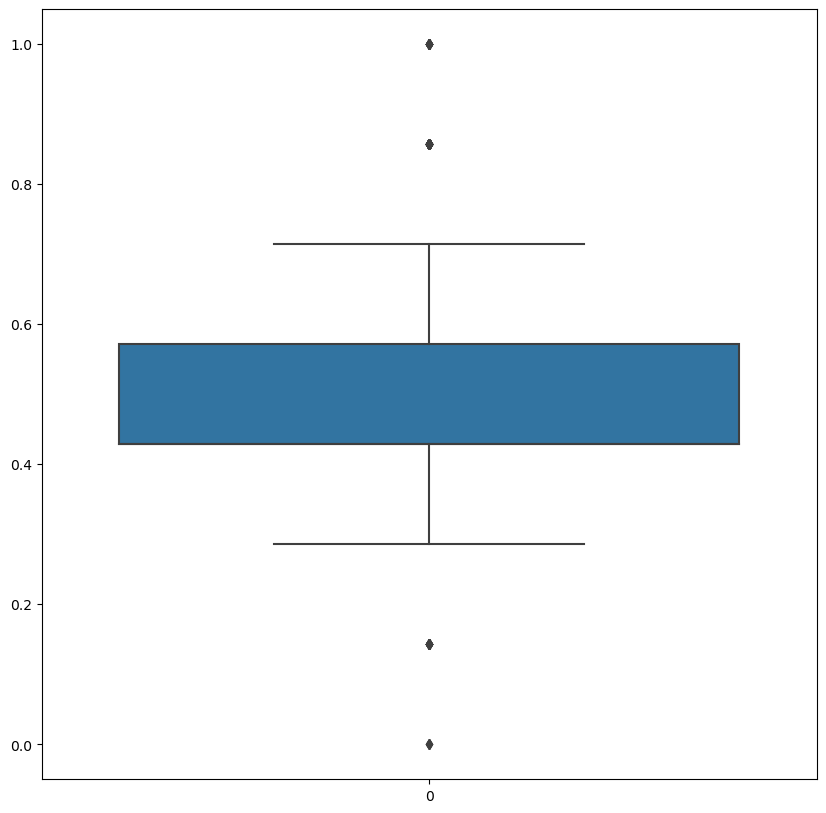

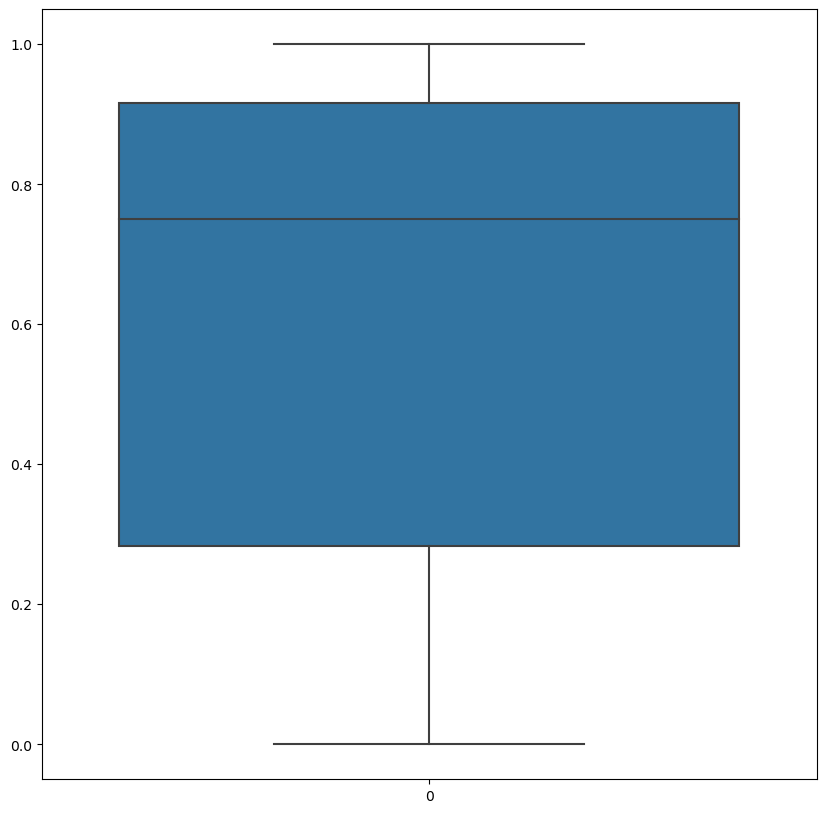

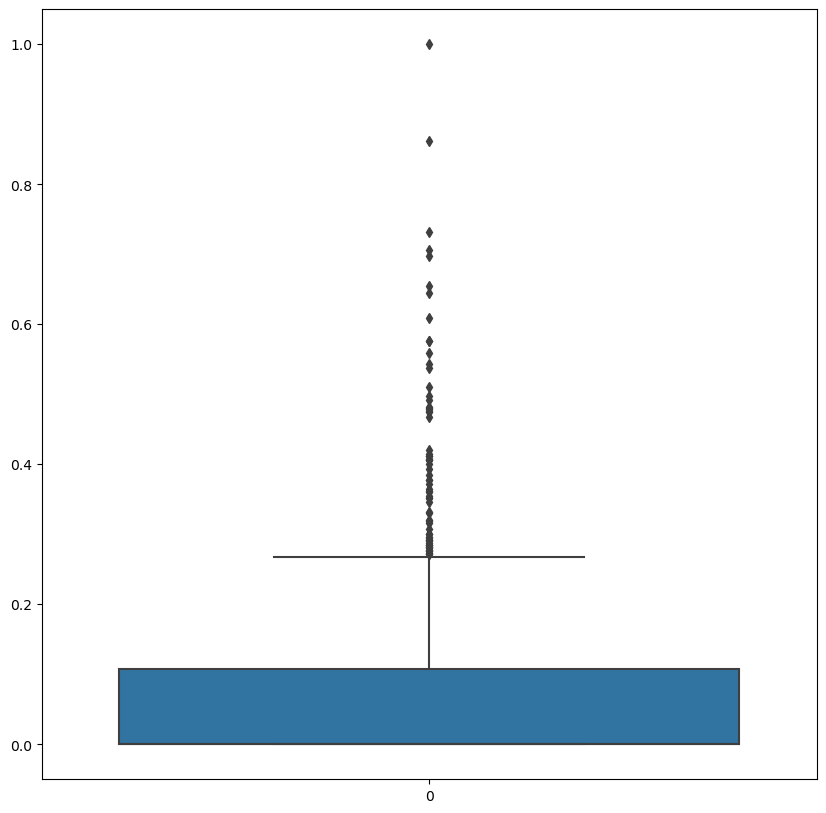

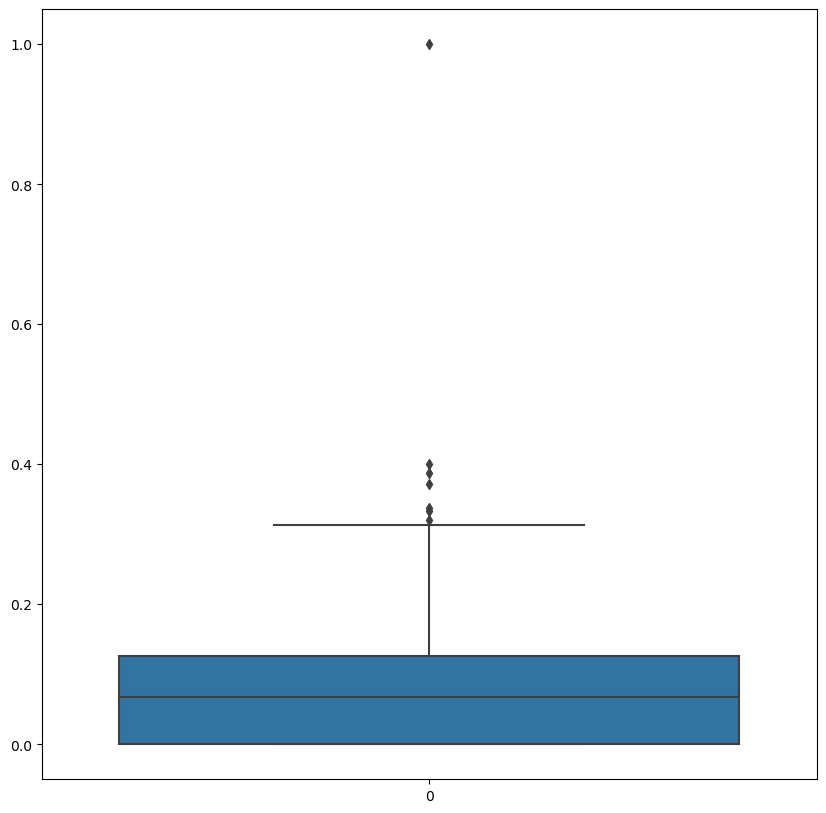

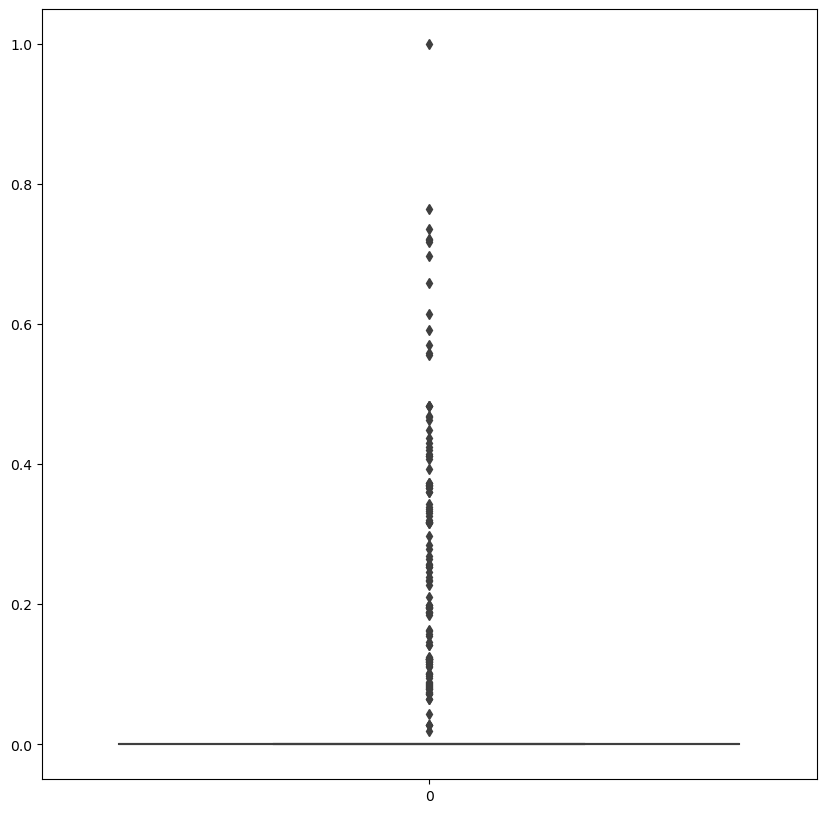

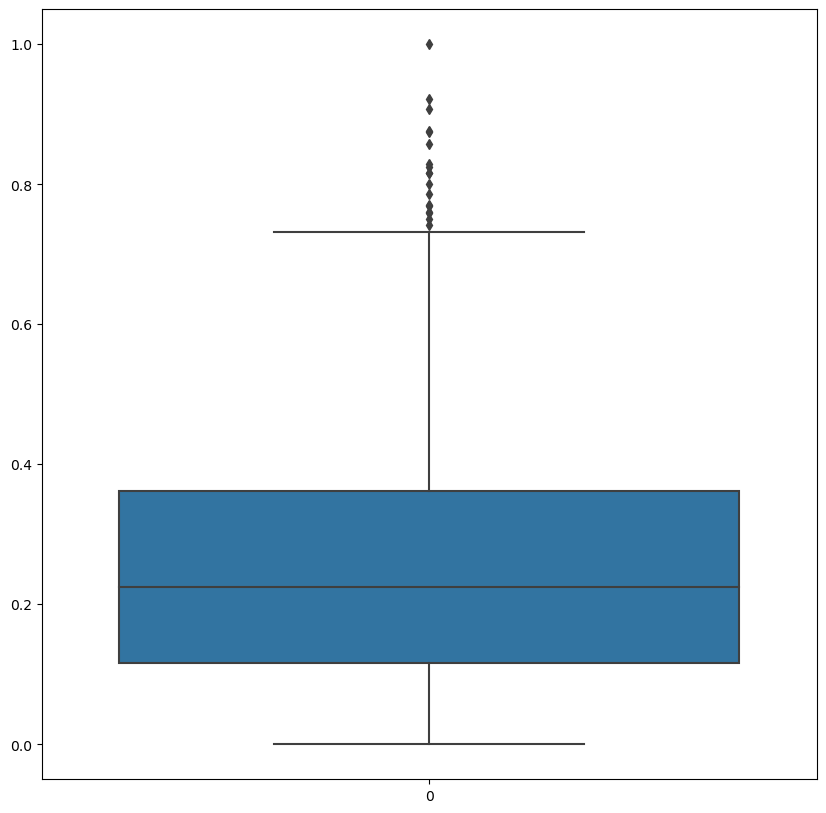

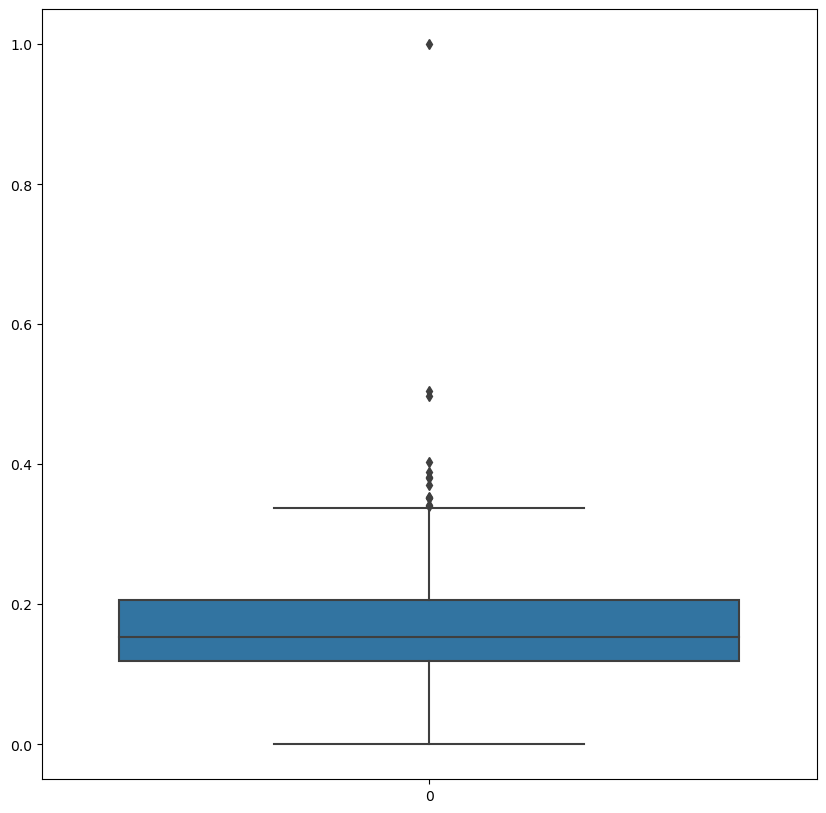

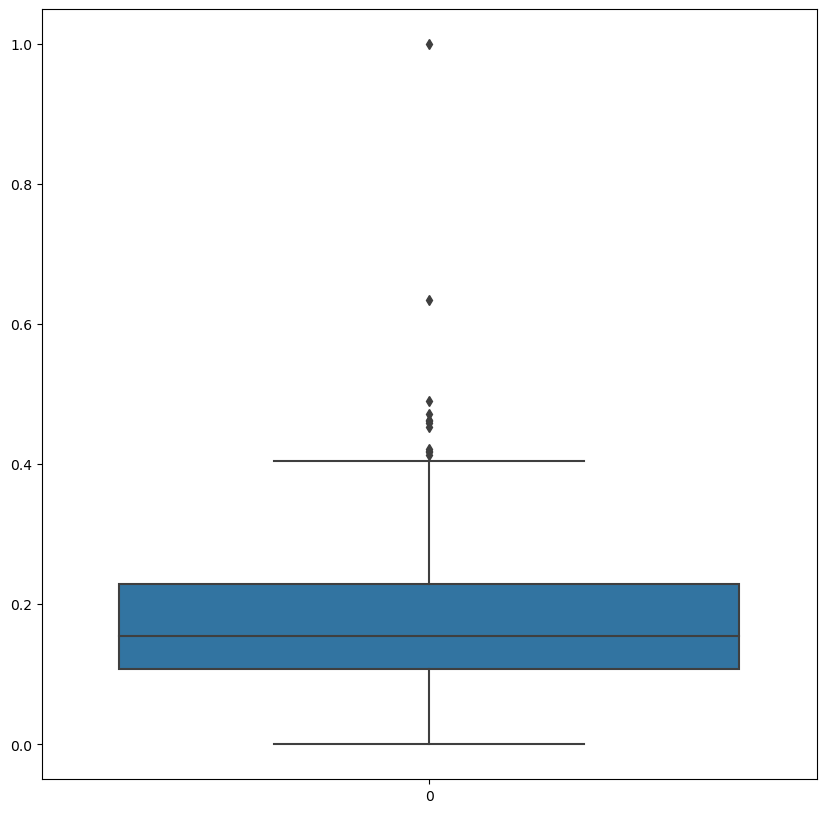

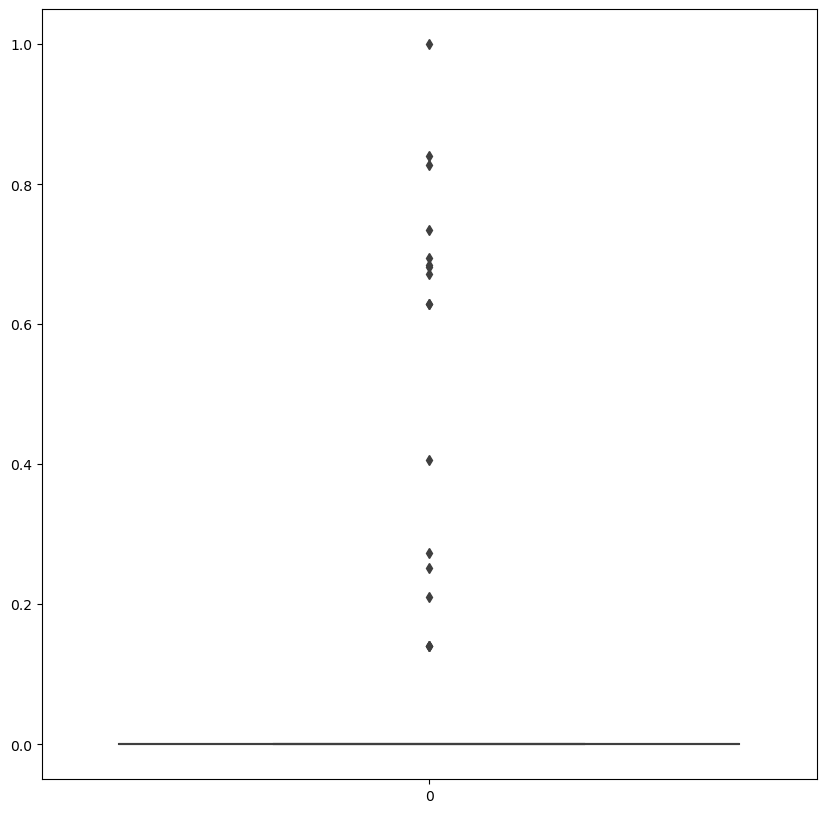

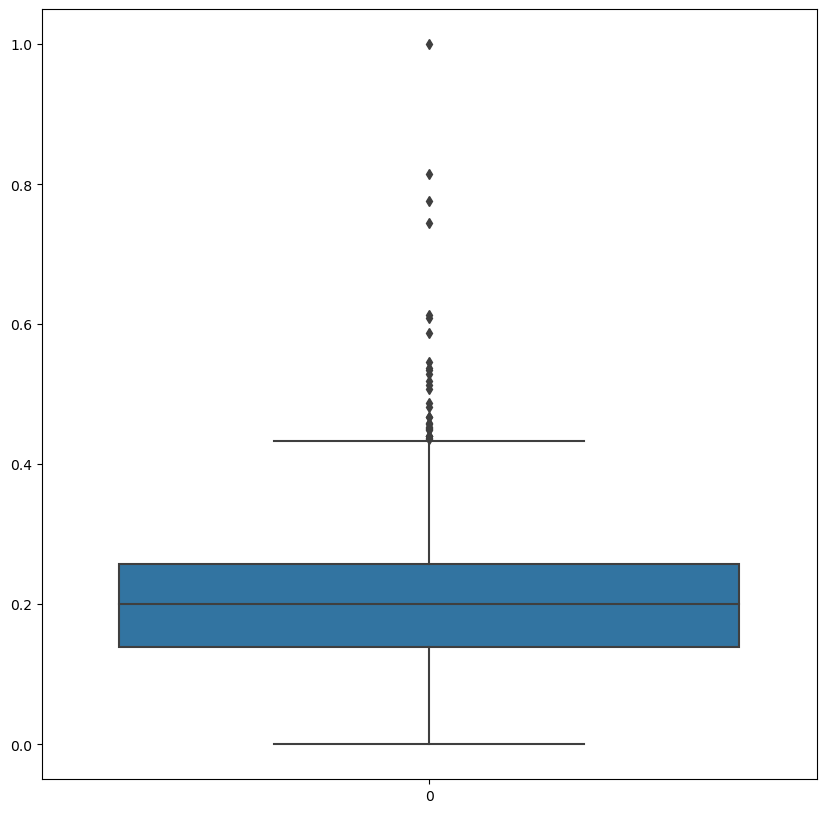

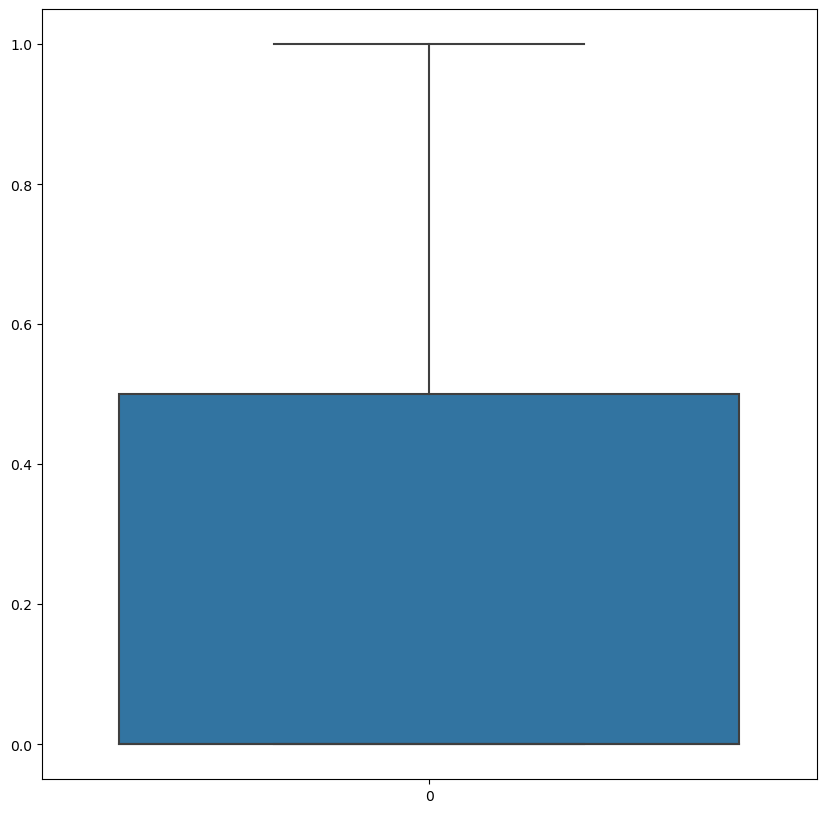

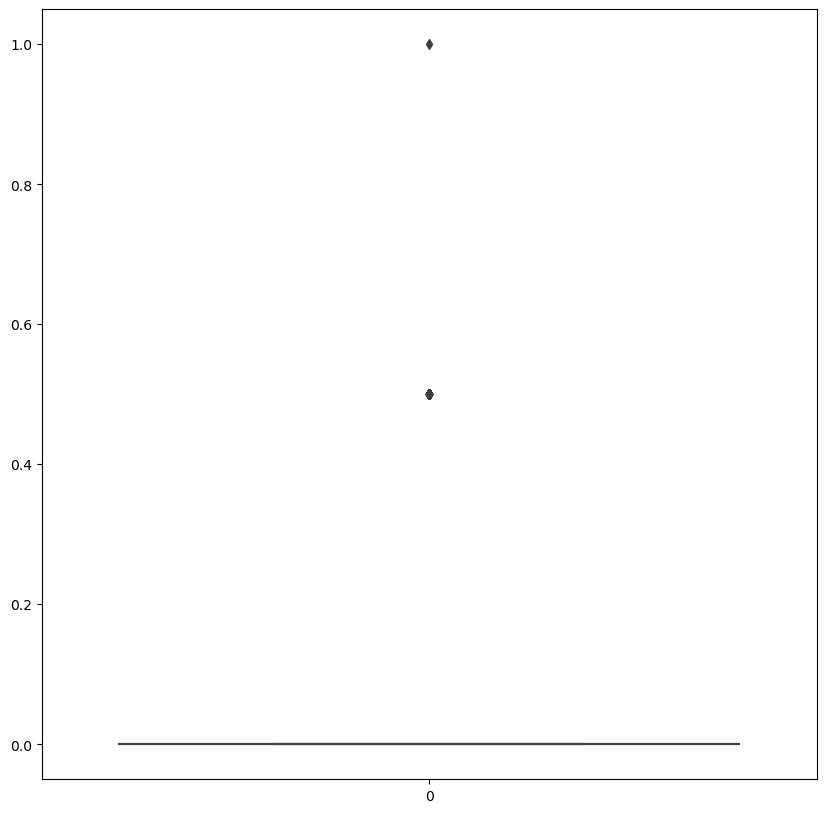

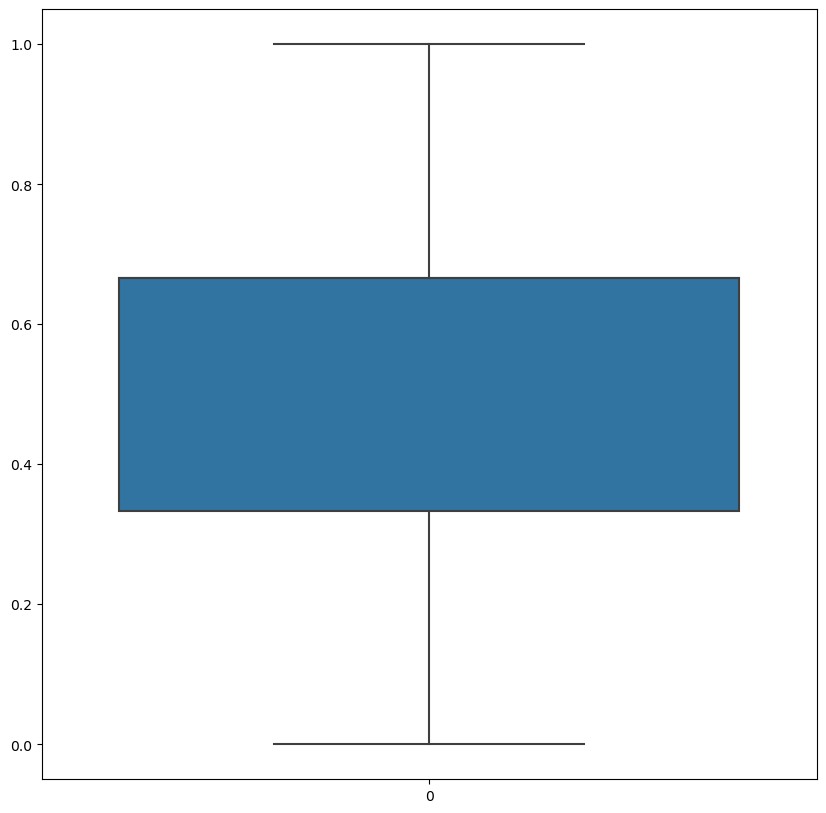

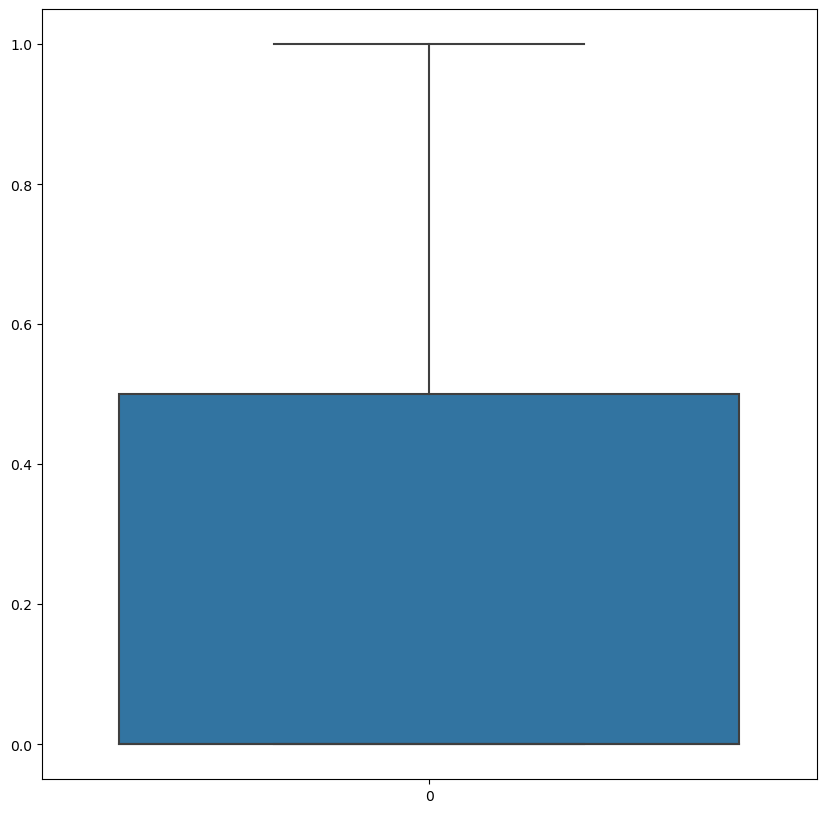

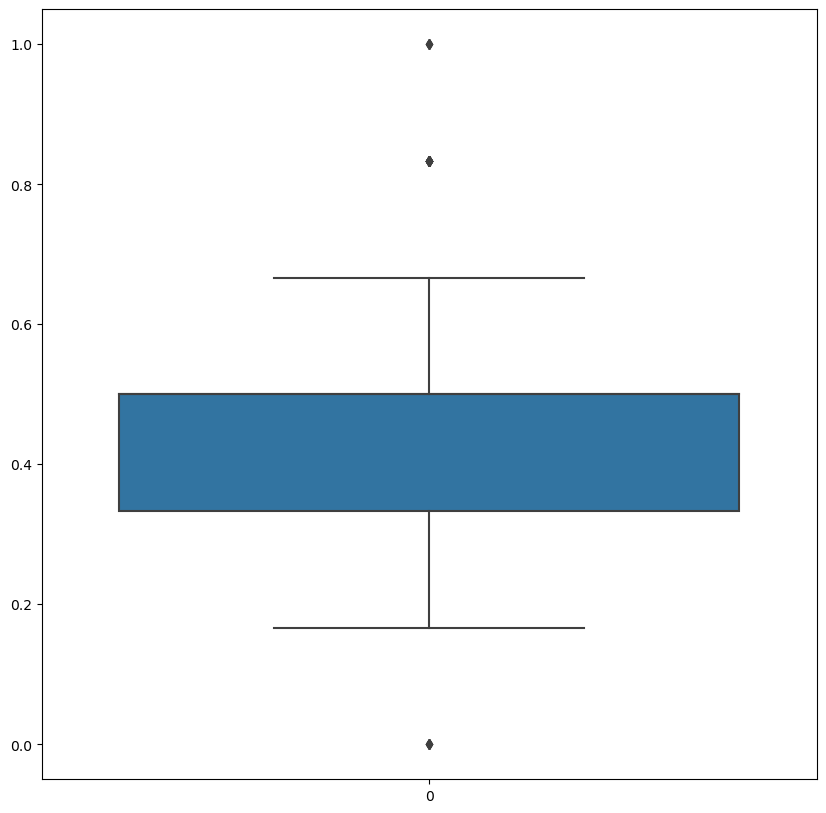

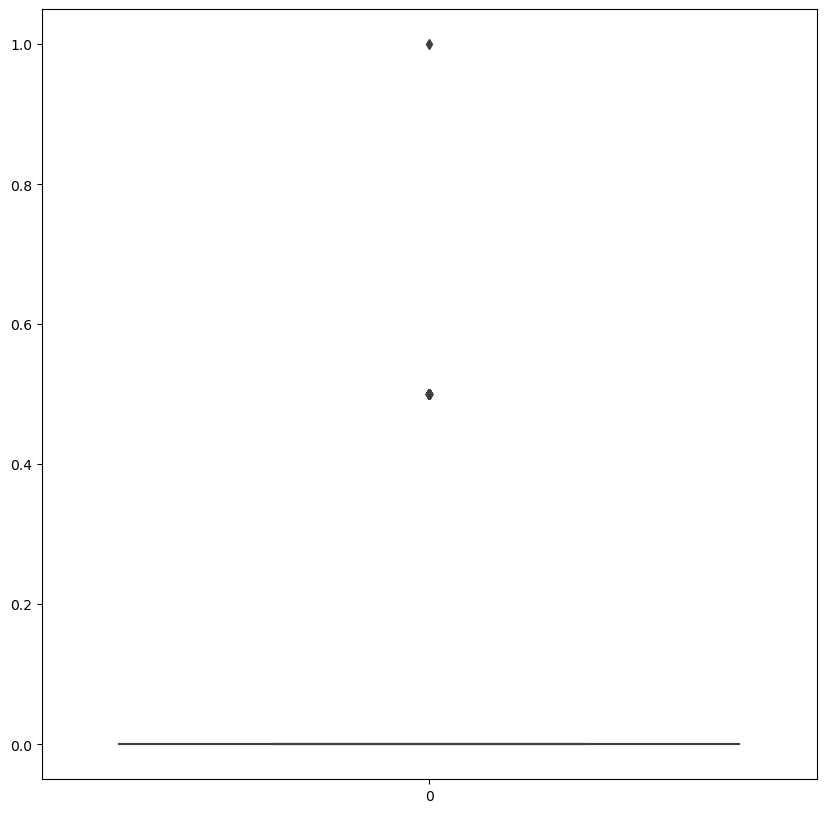

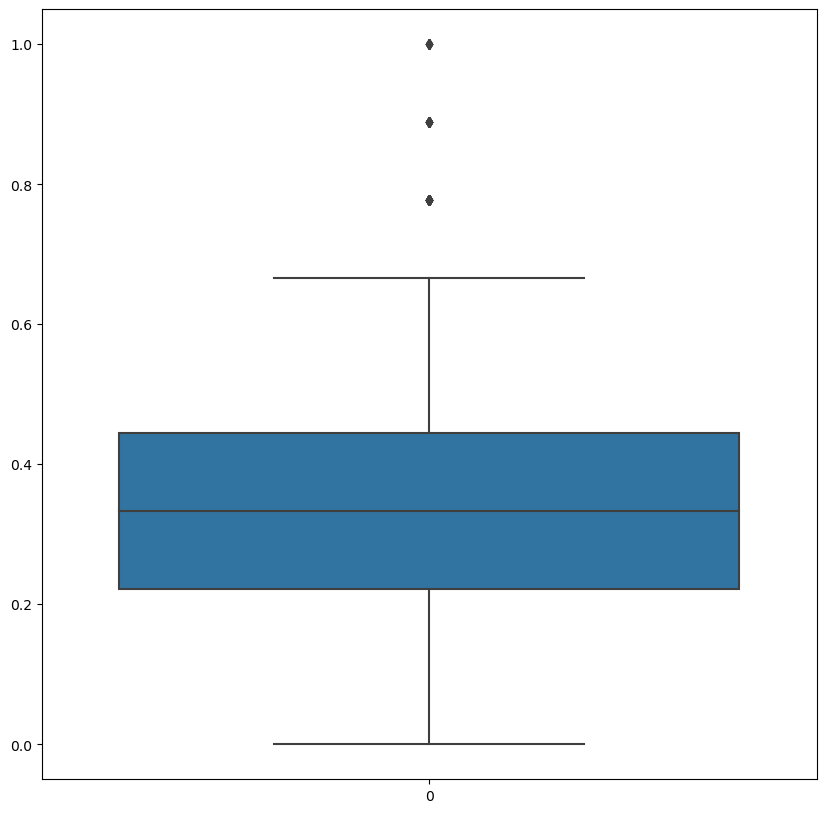

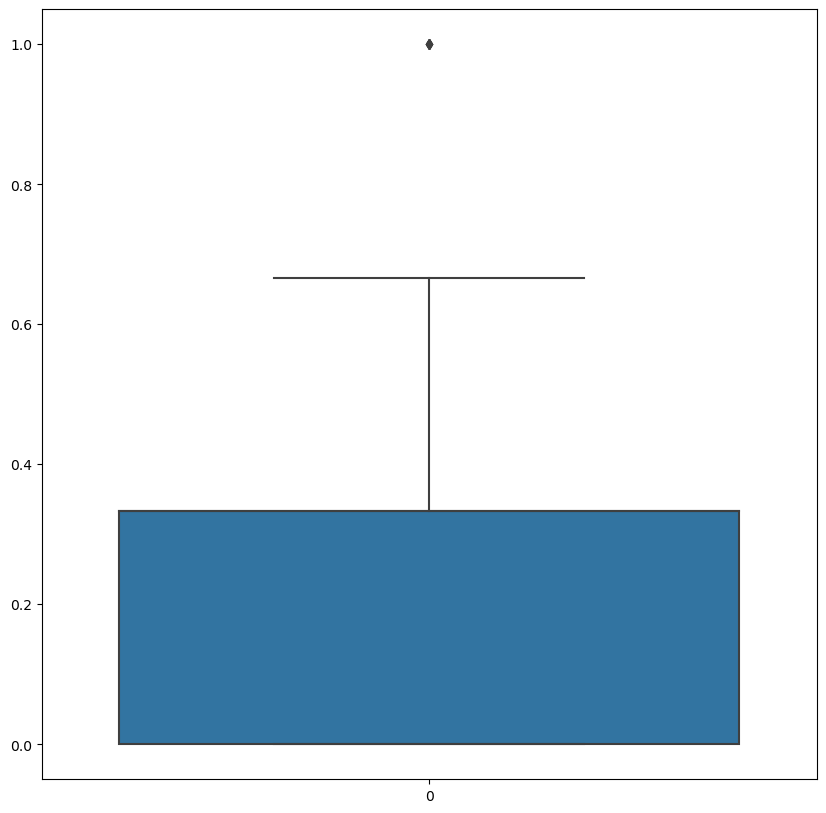

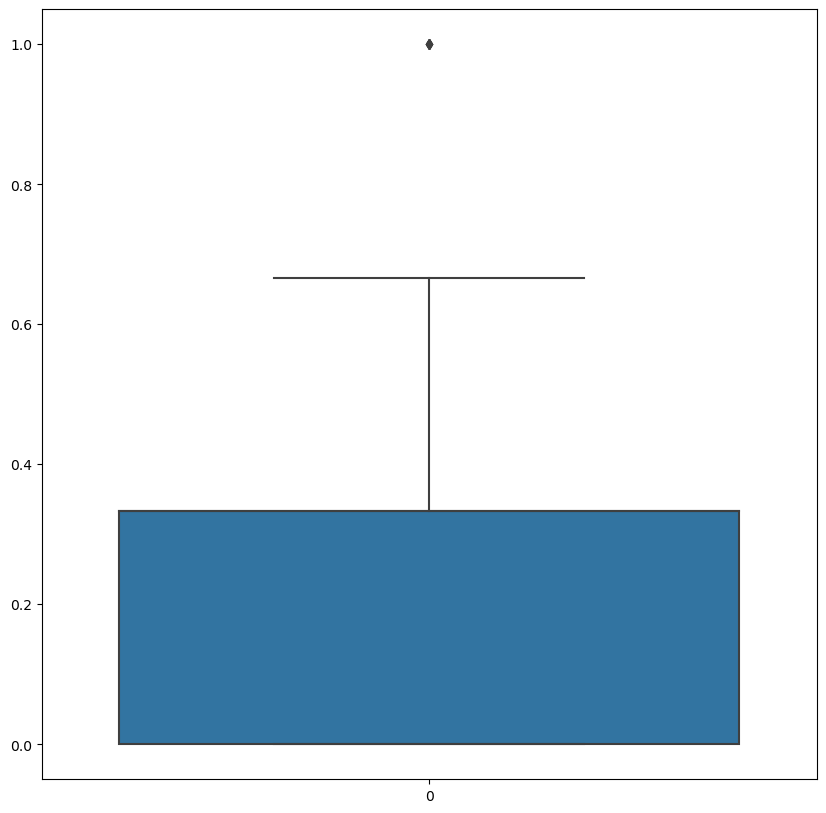

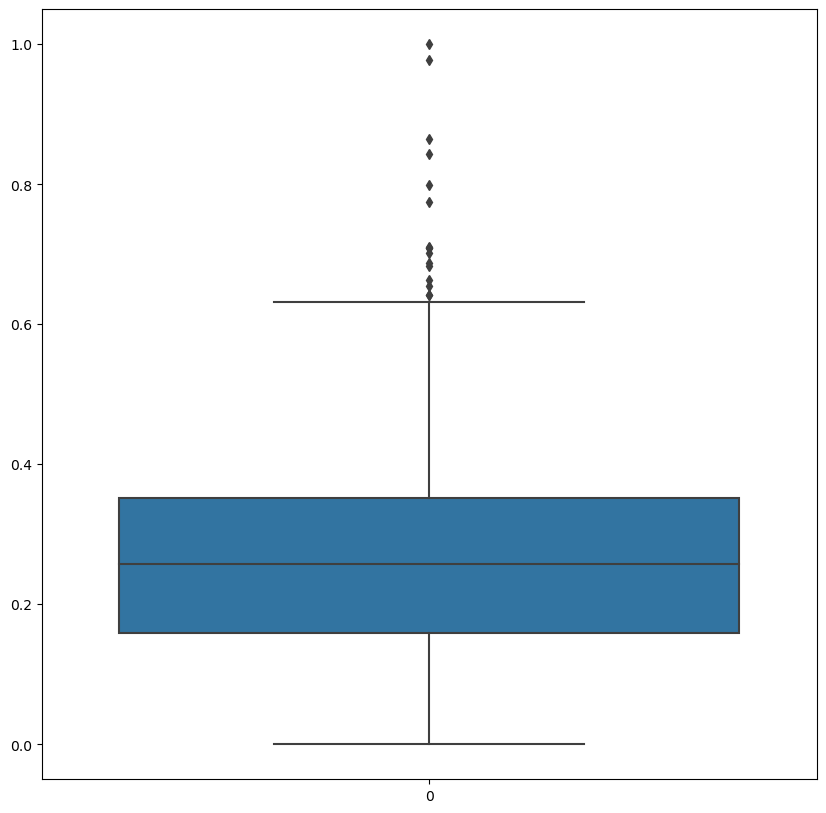

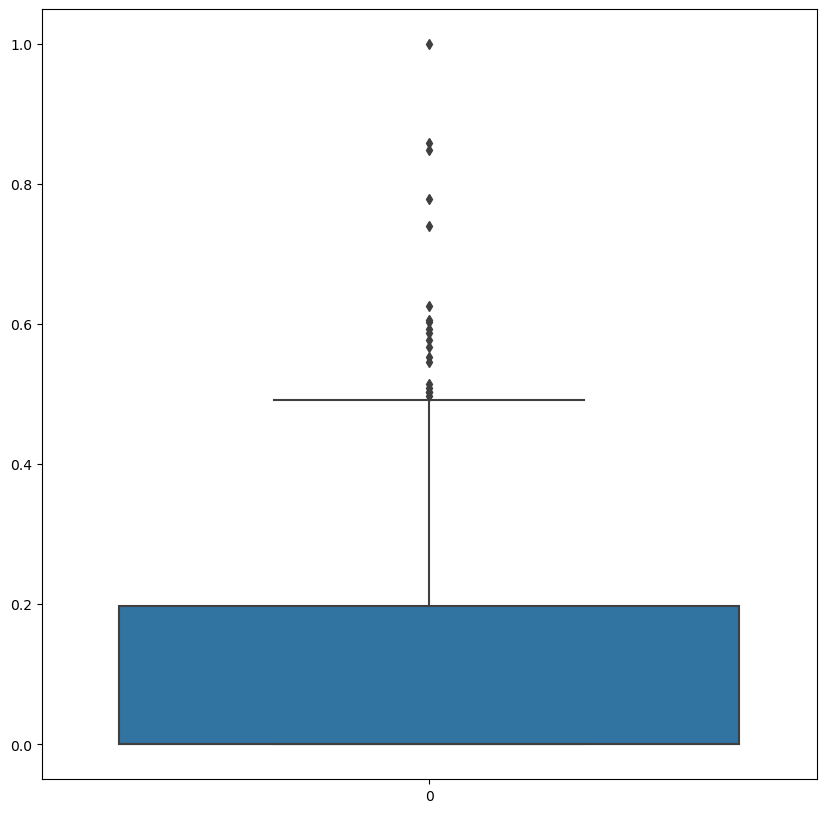

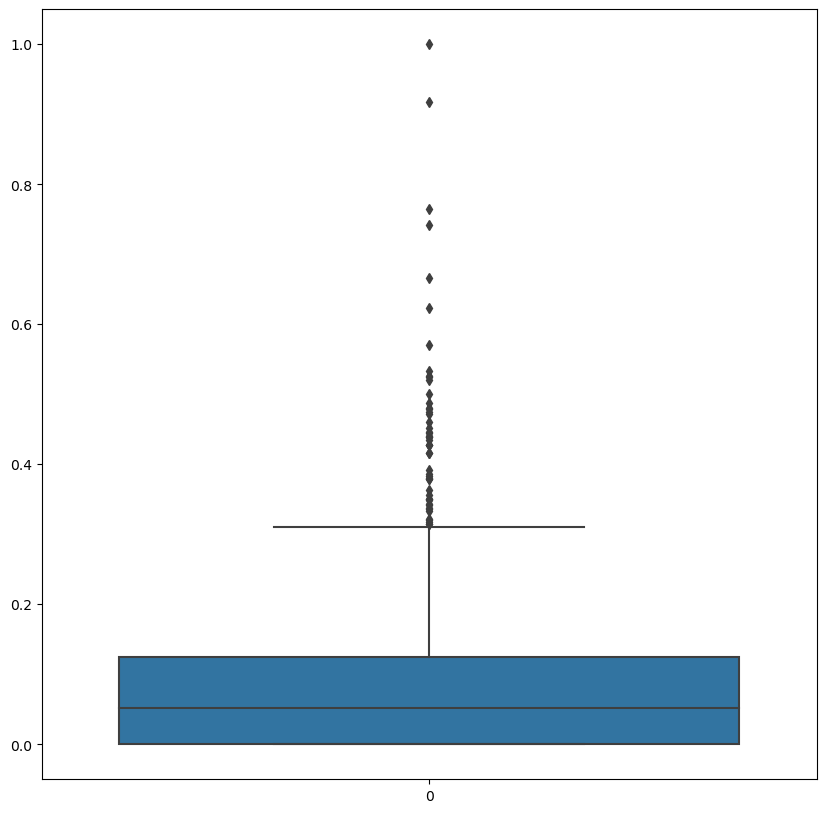

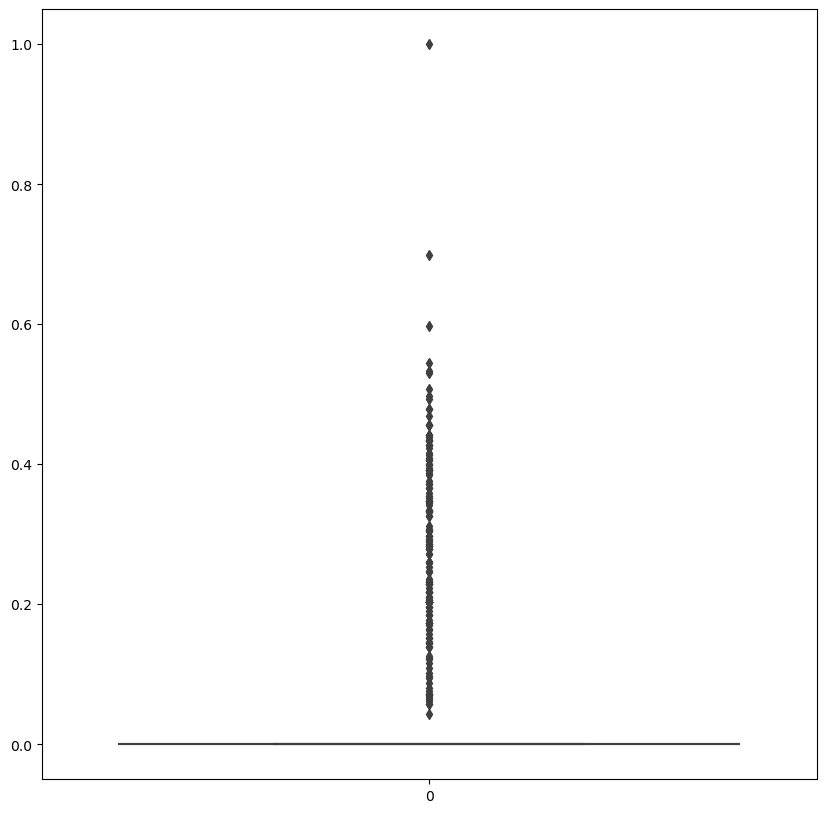

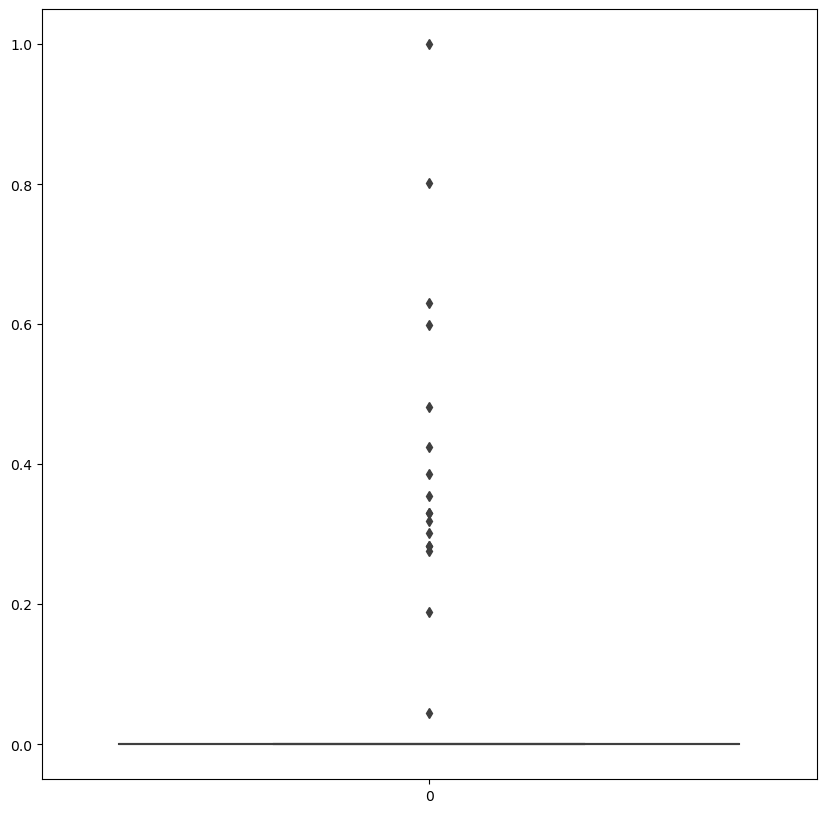

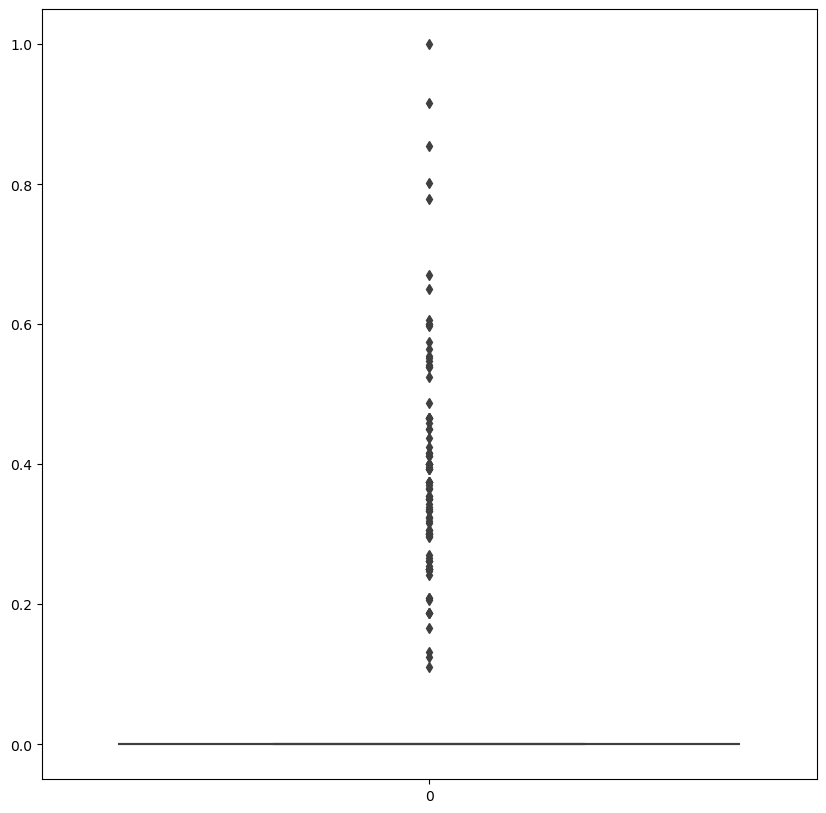

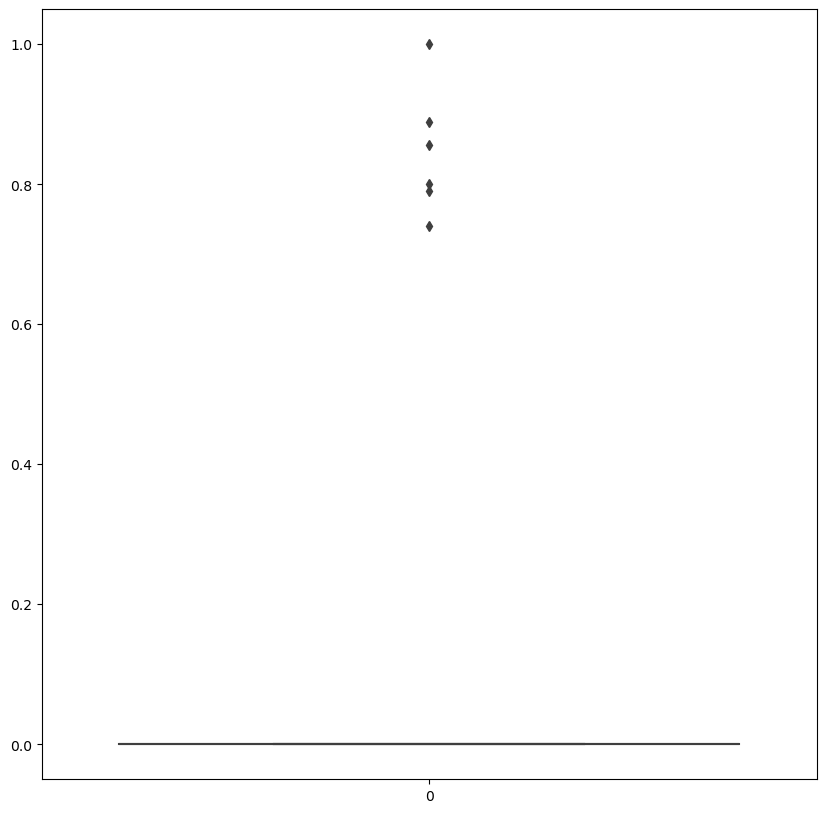

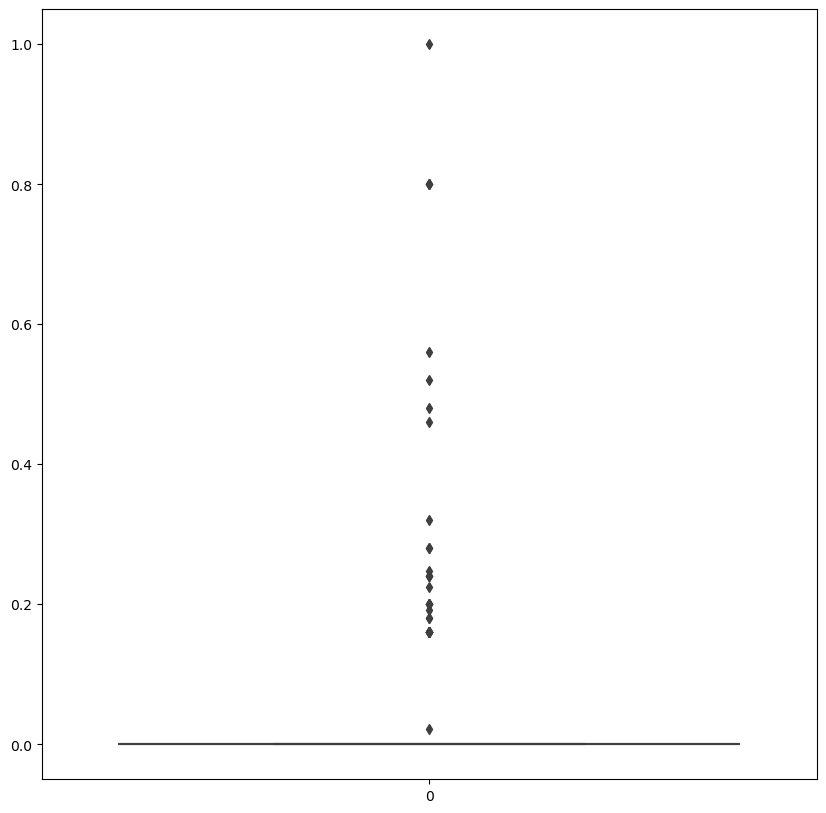

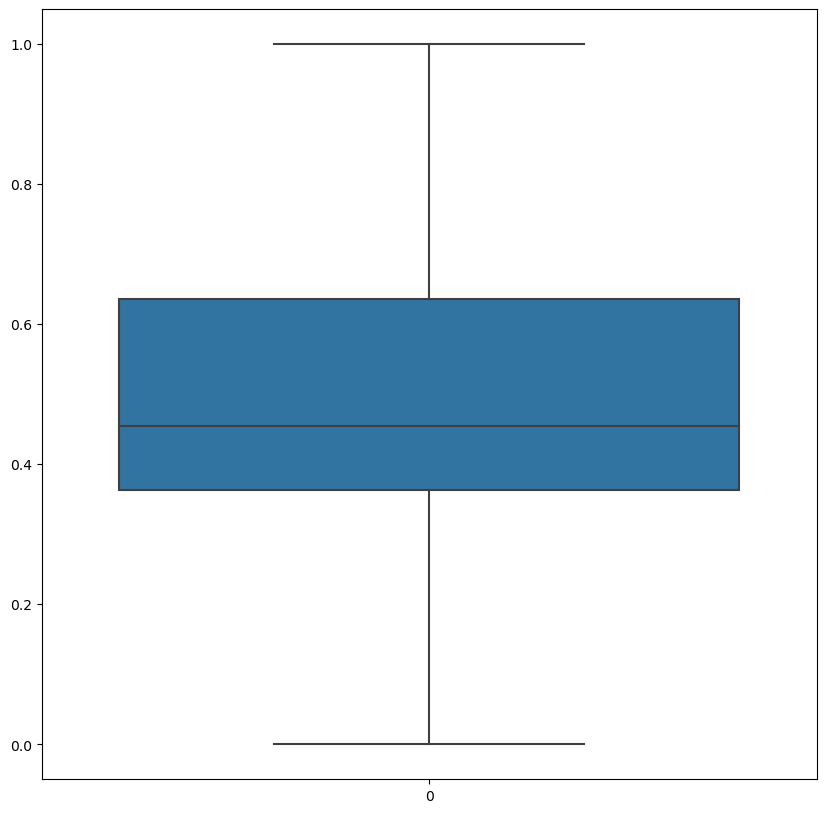

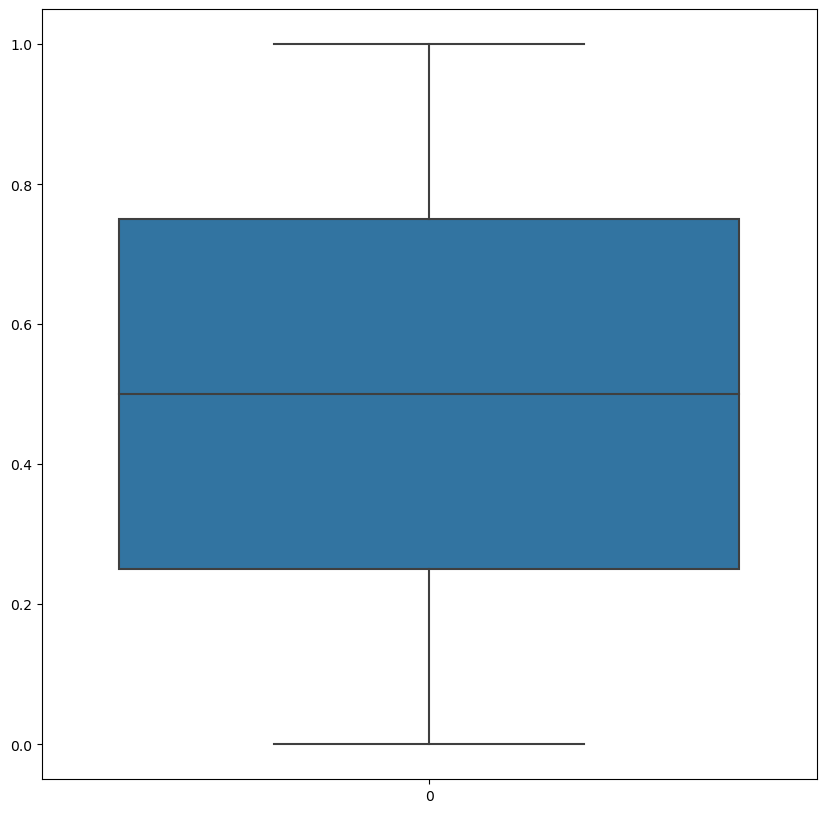

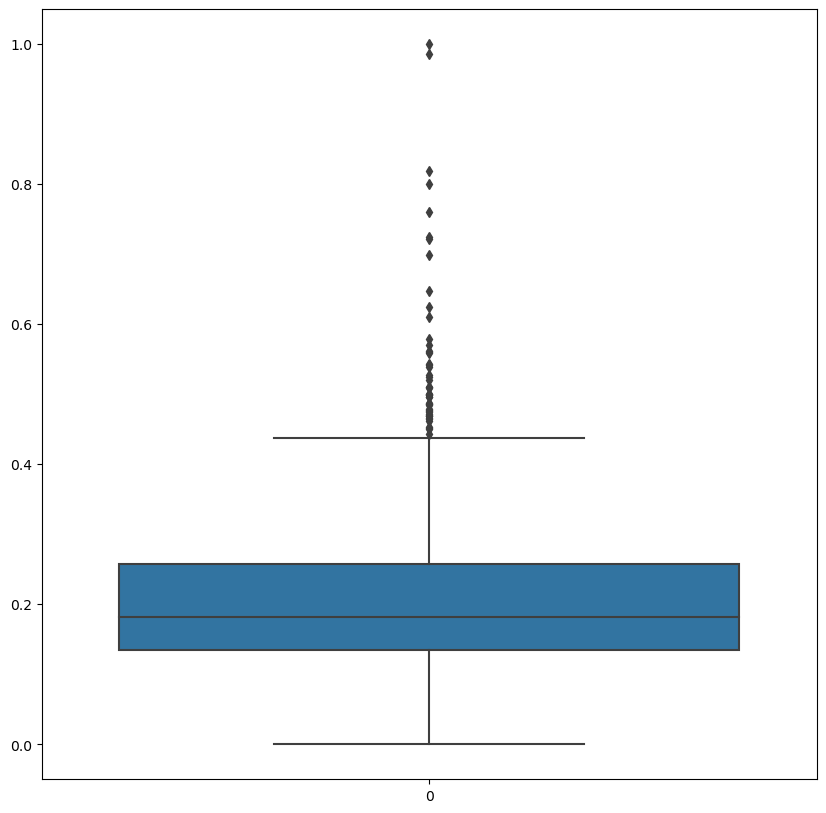

In [77]:
for i in num_cols:
    plt.figure(figsize=(10,10))
    sns.boxplot(data = df[i], orient = 'v')
    plt.show() 

In [78]:
num_cols.remove('SalePrice')

## Removing Outliers

In [79]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [80]:
for column in num_cols:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

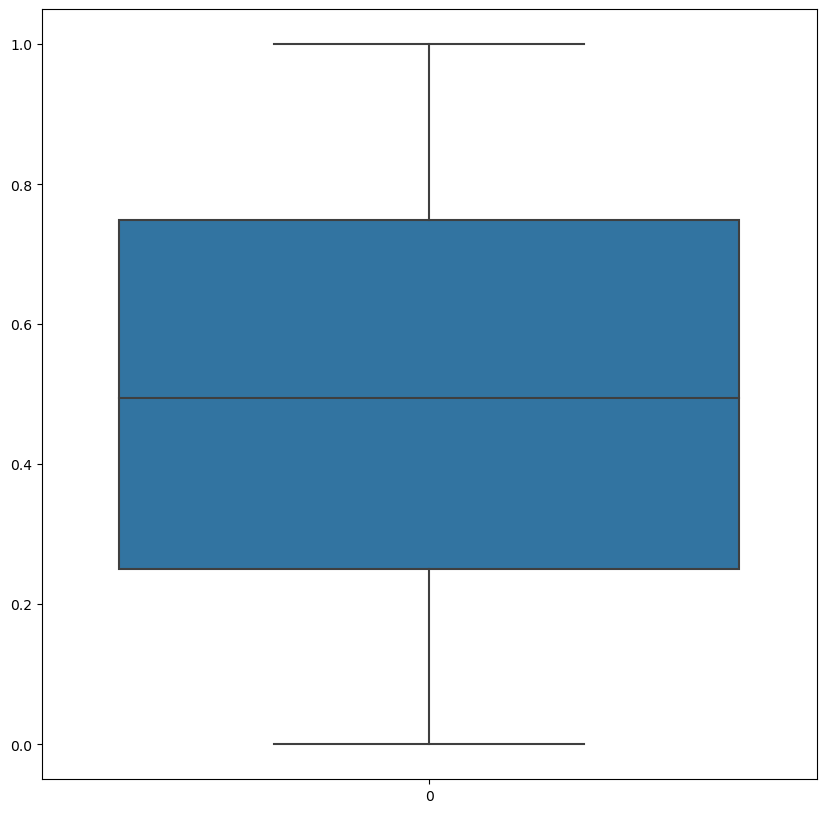

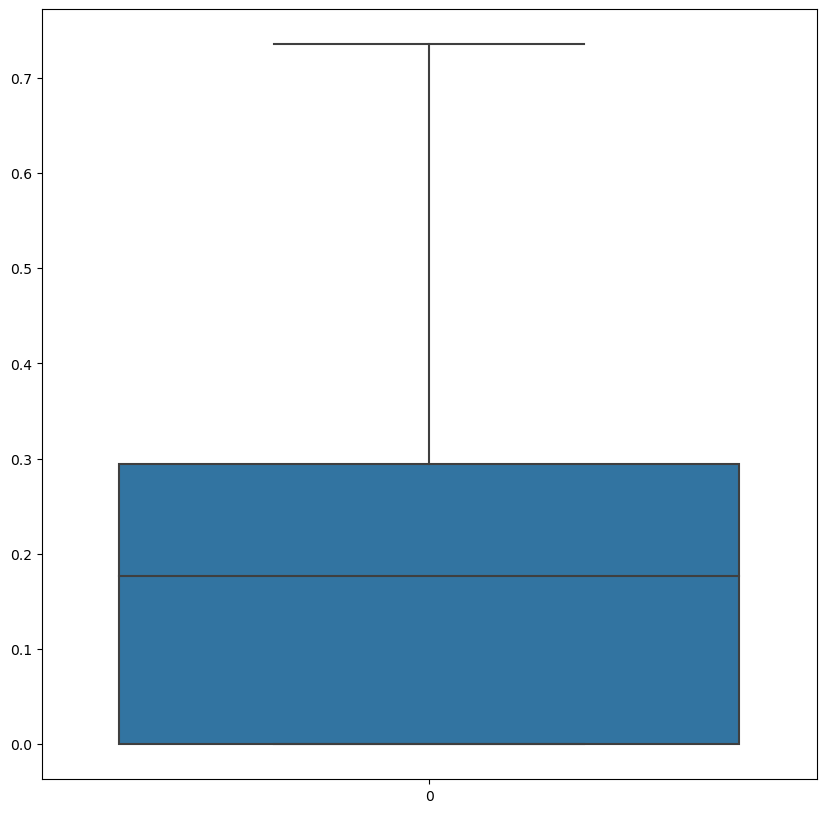

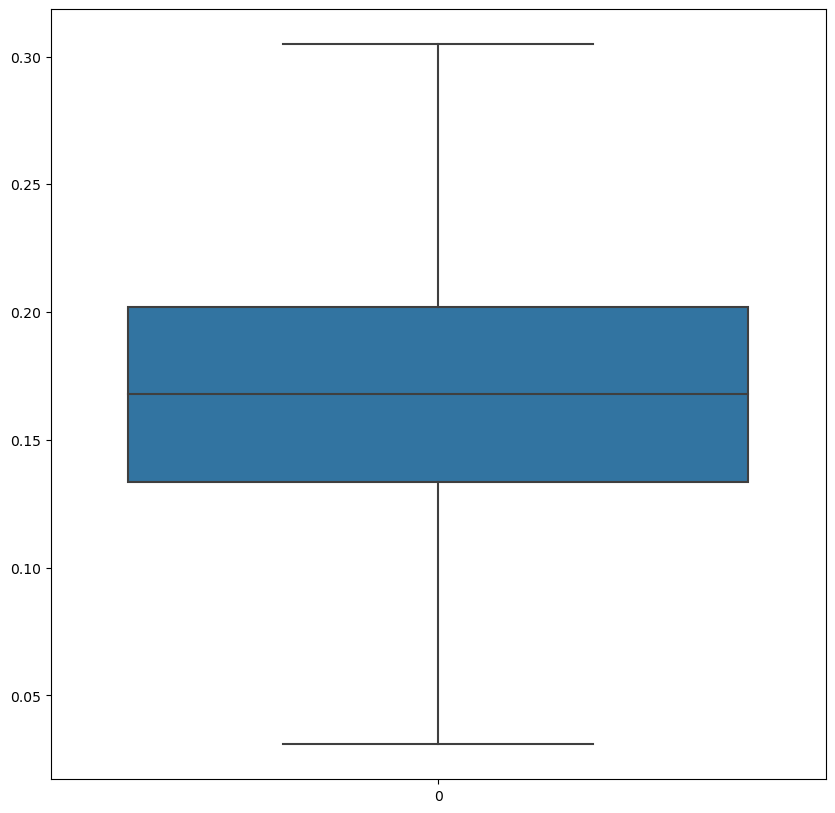

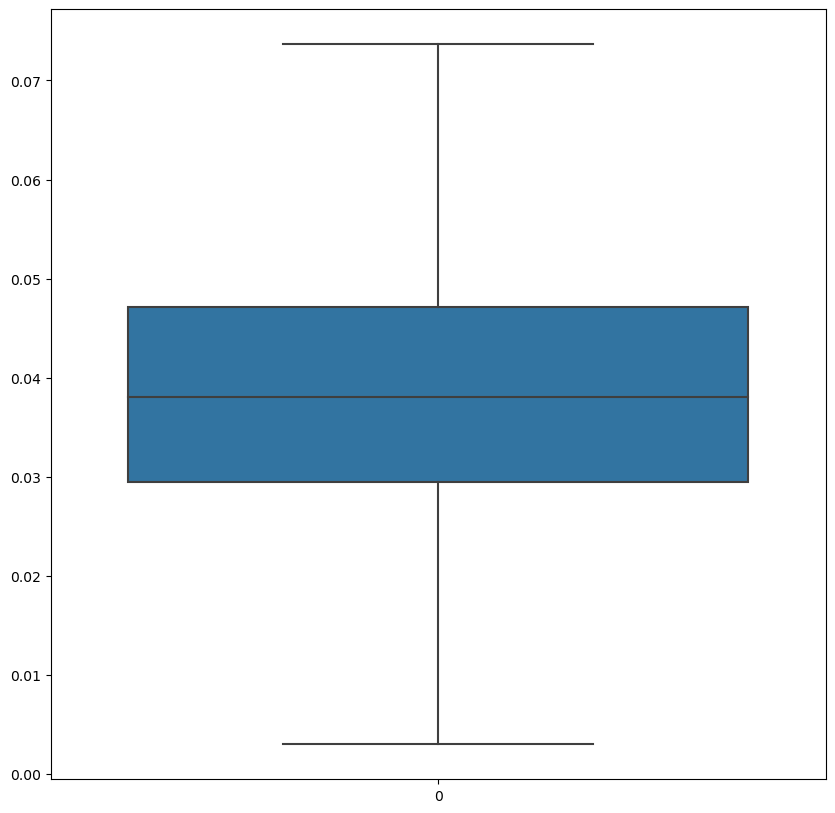

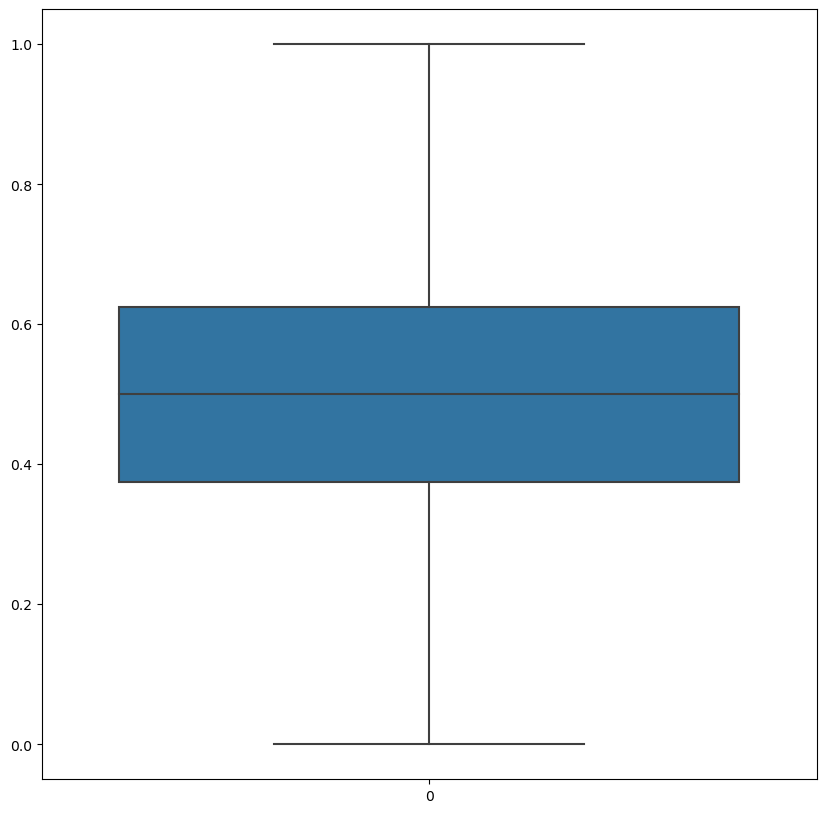

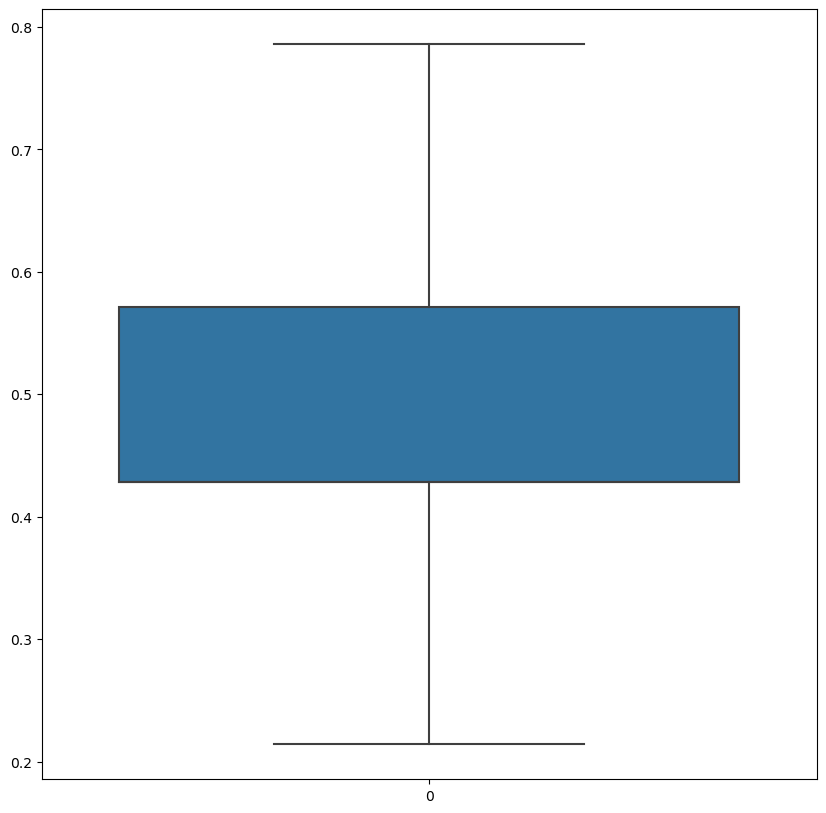

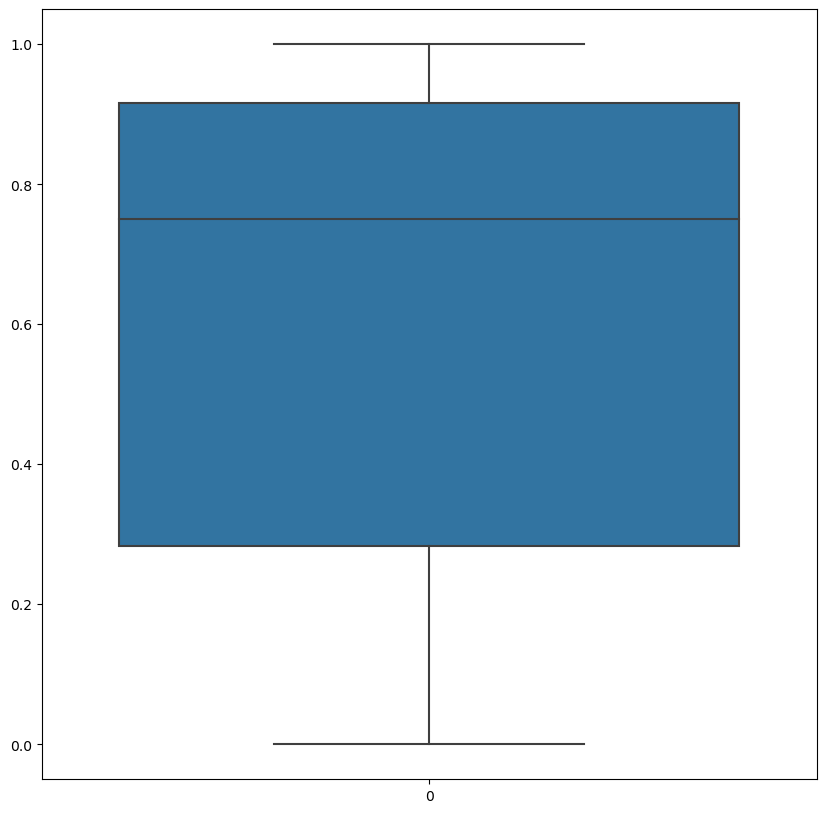

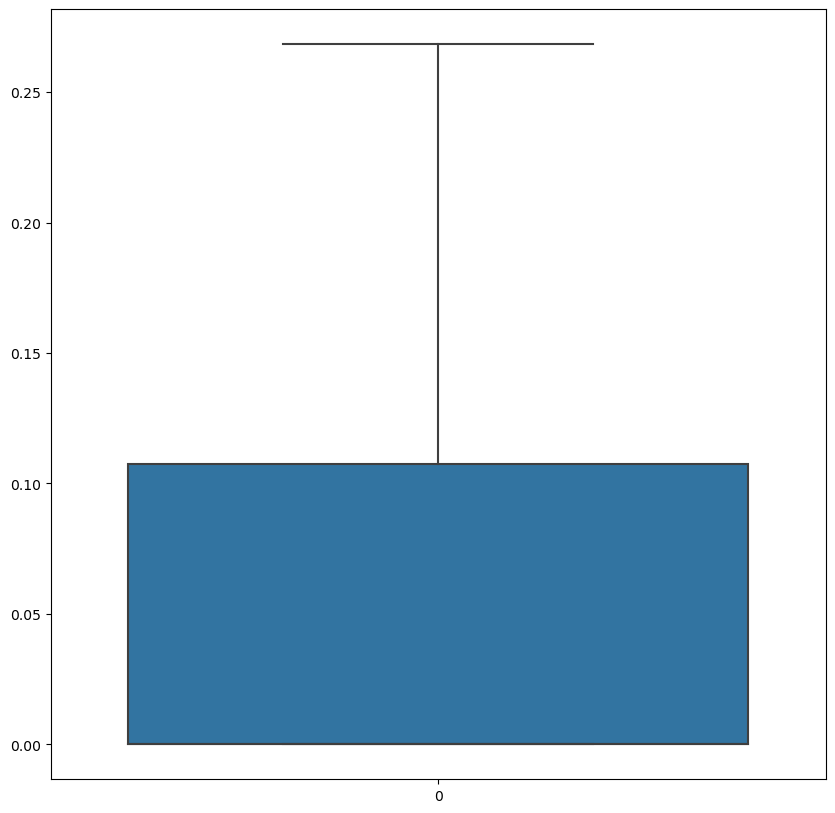

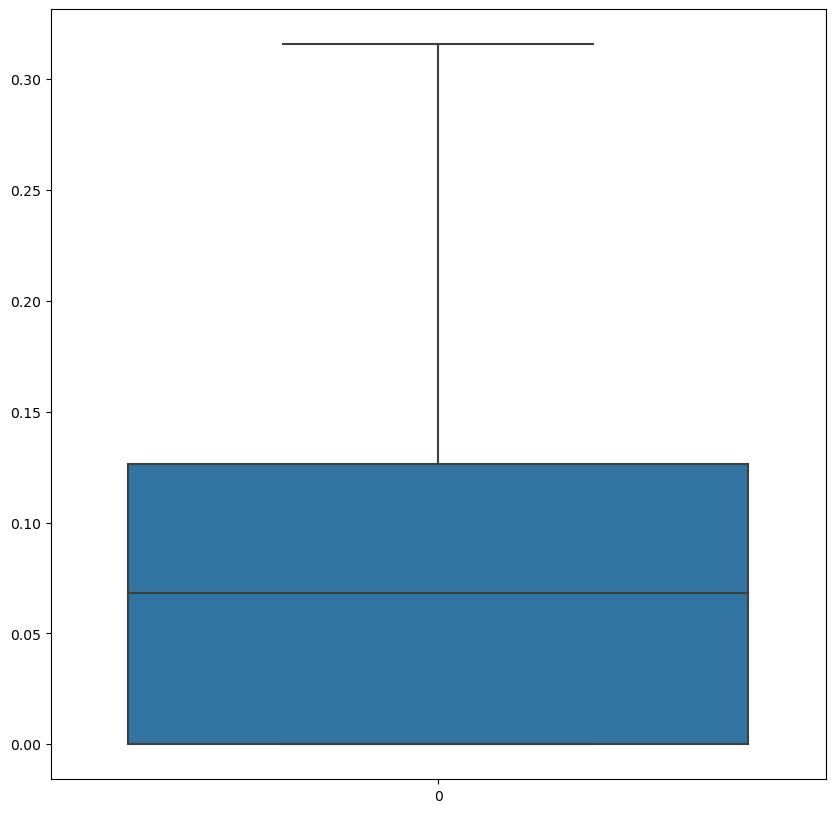

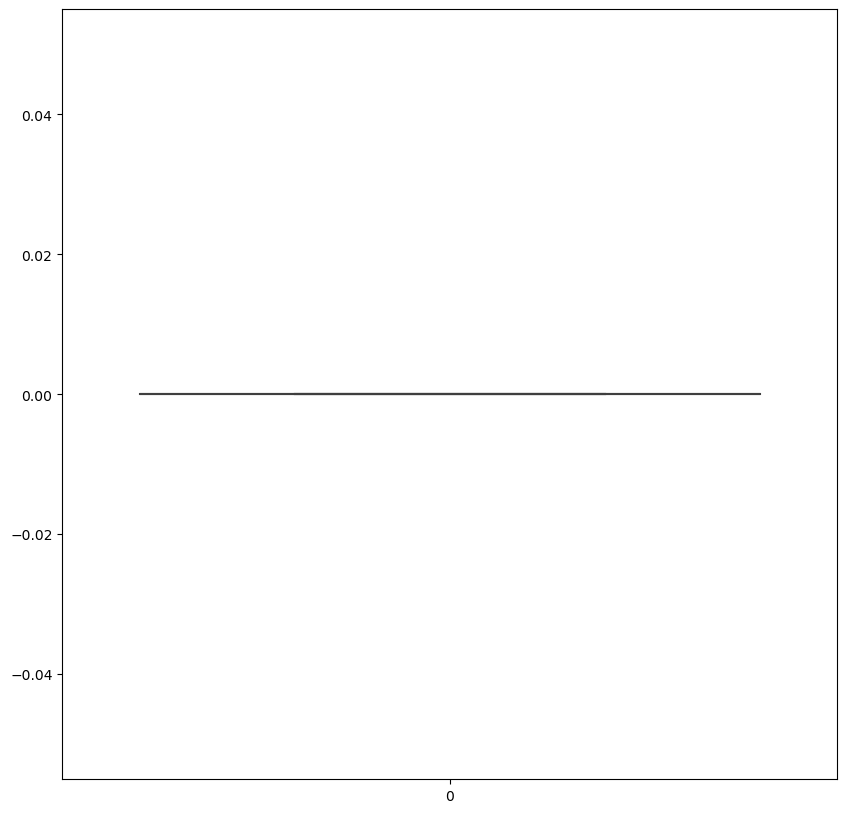

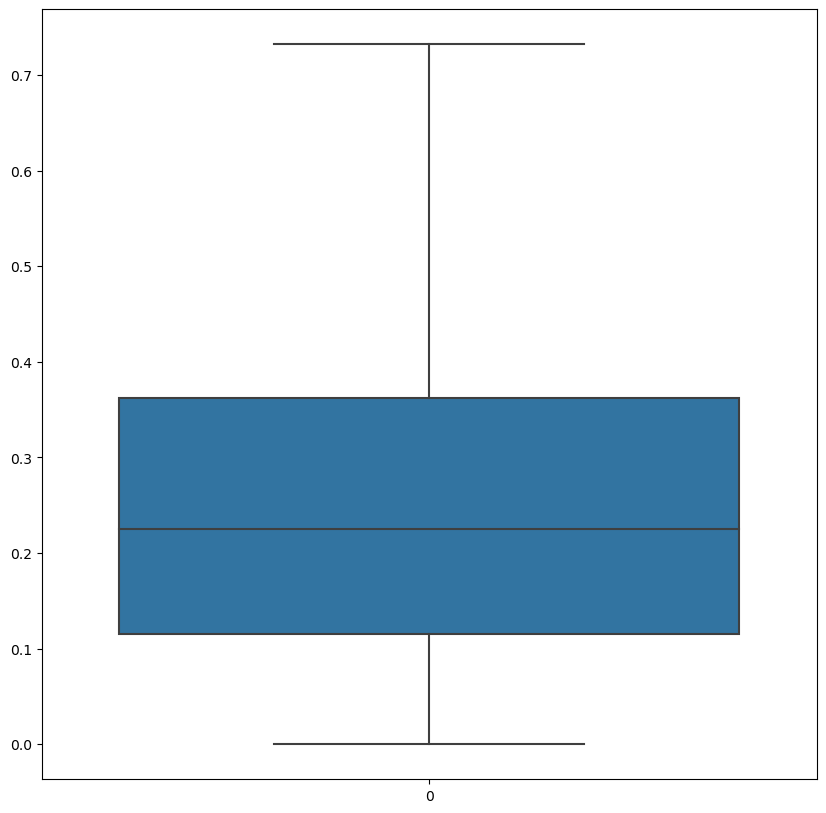

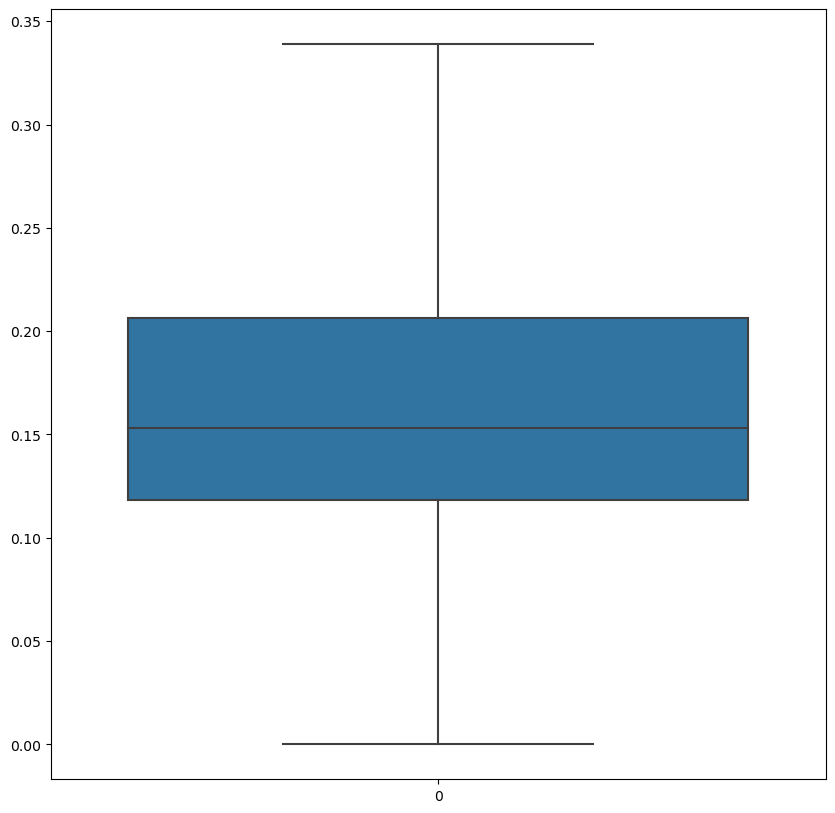

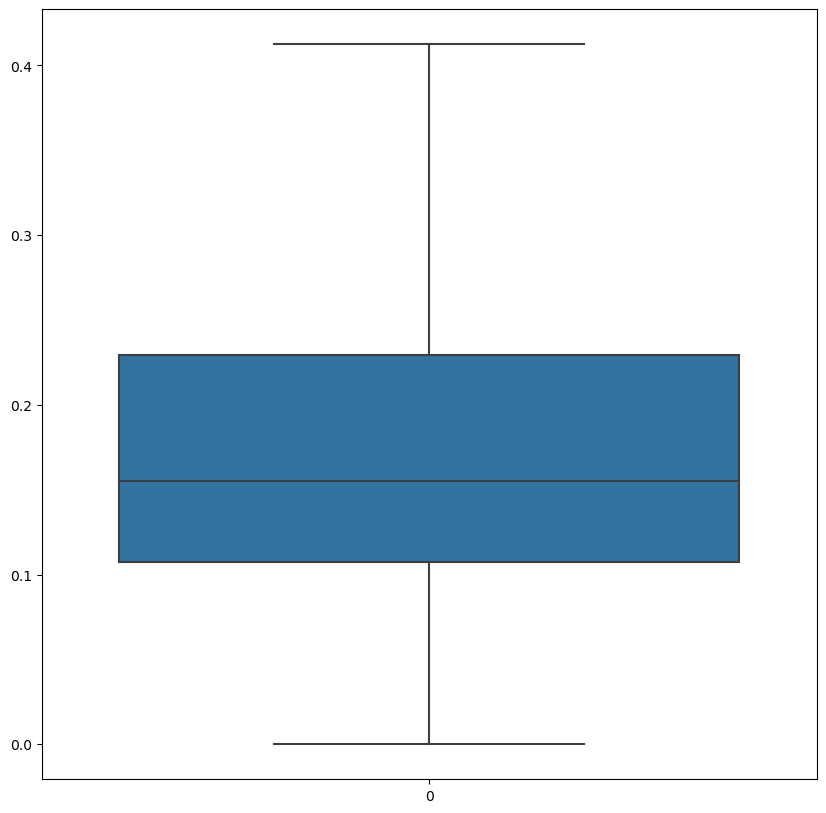

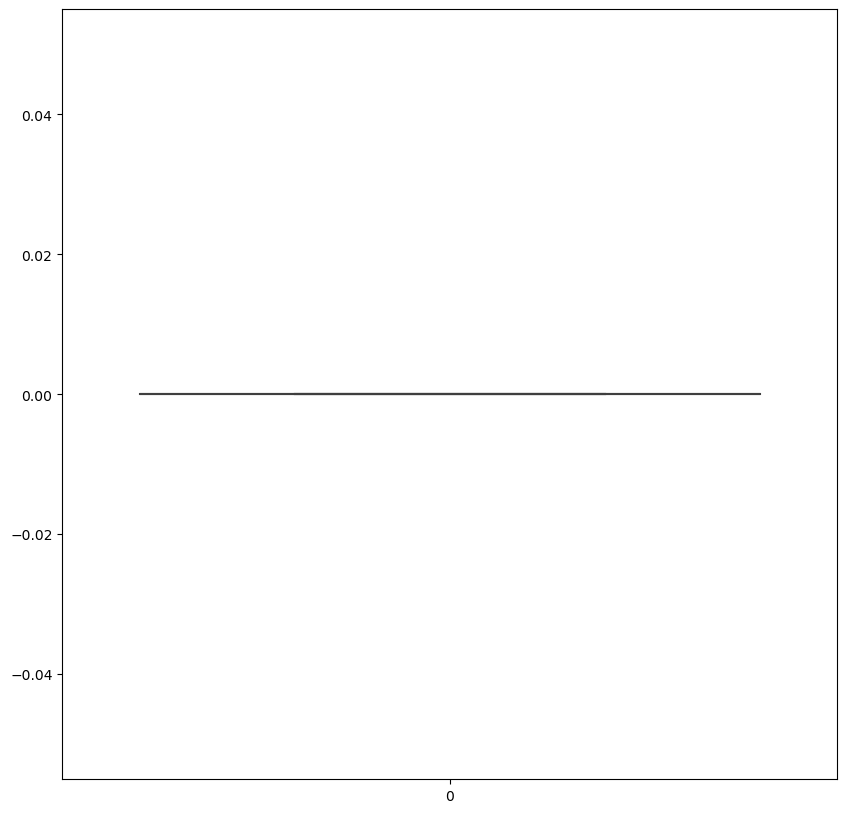

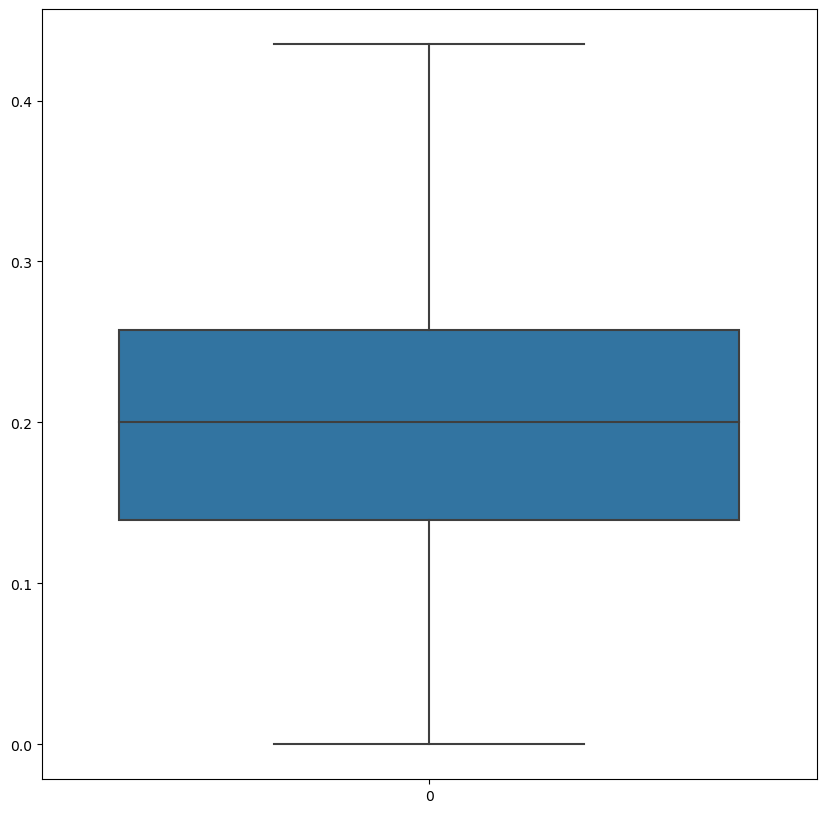

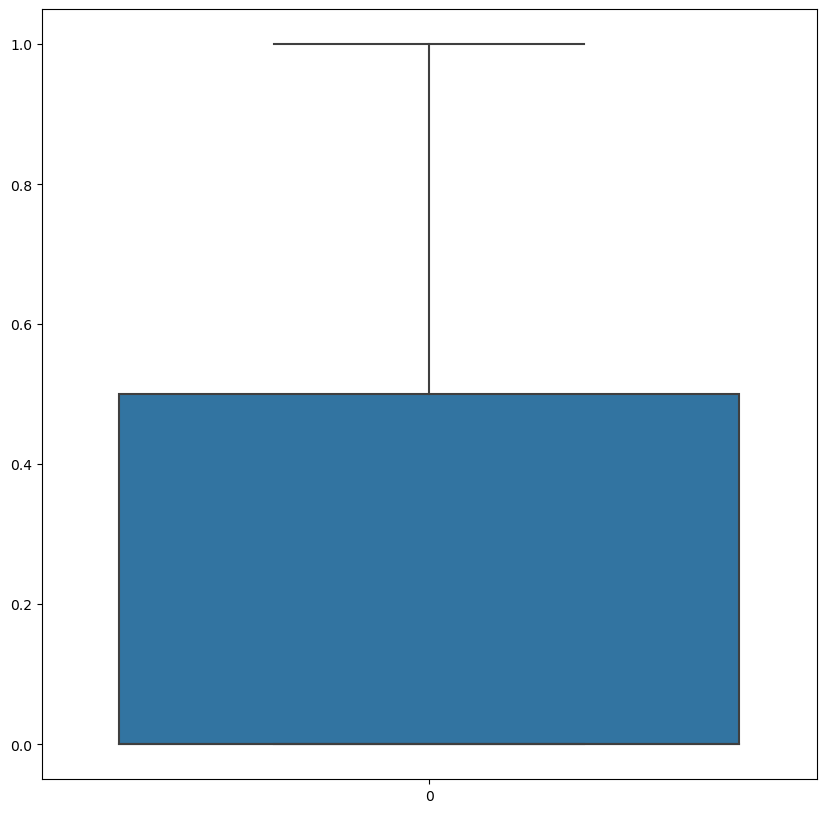

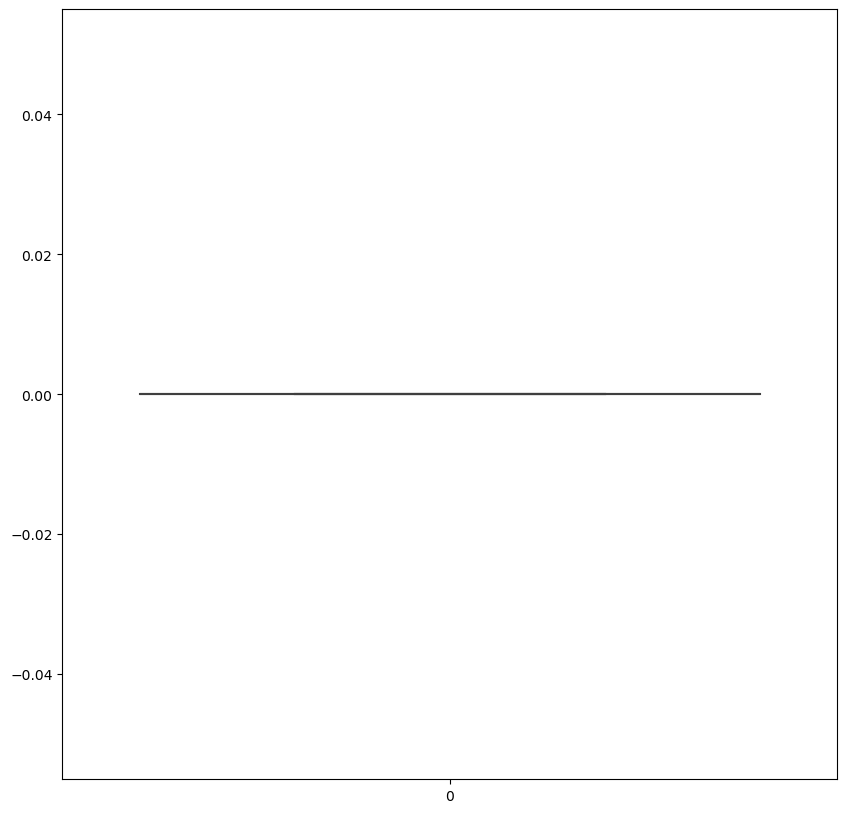

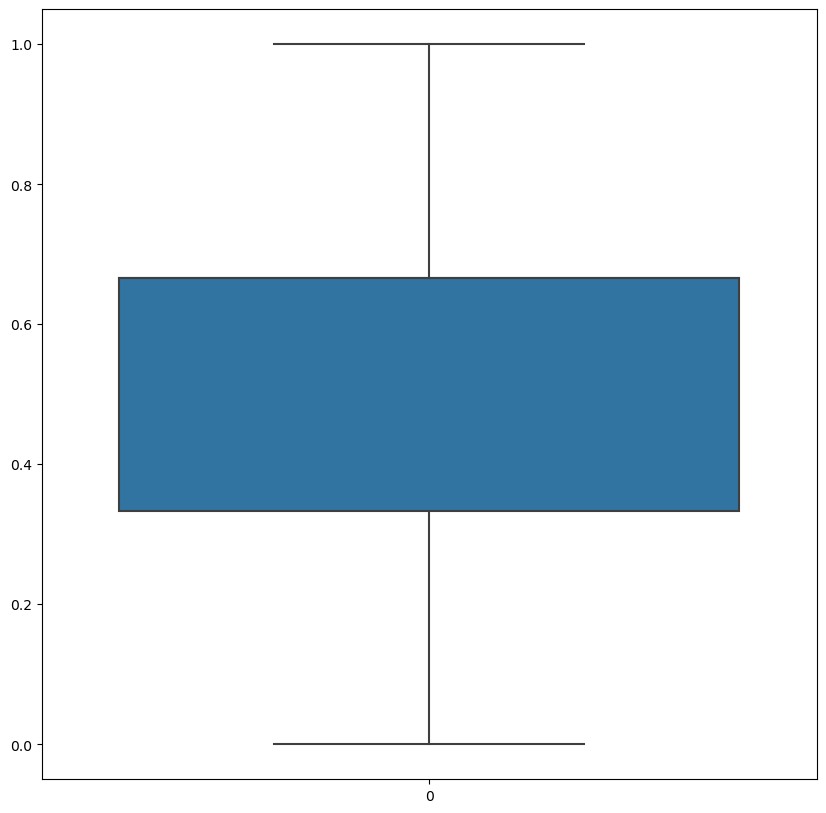

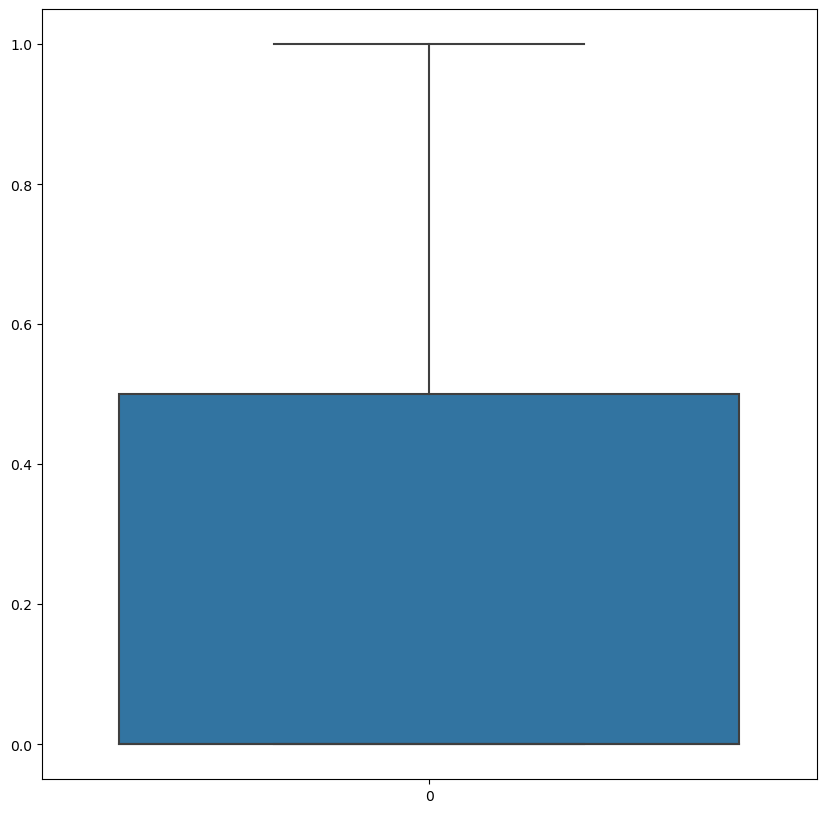

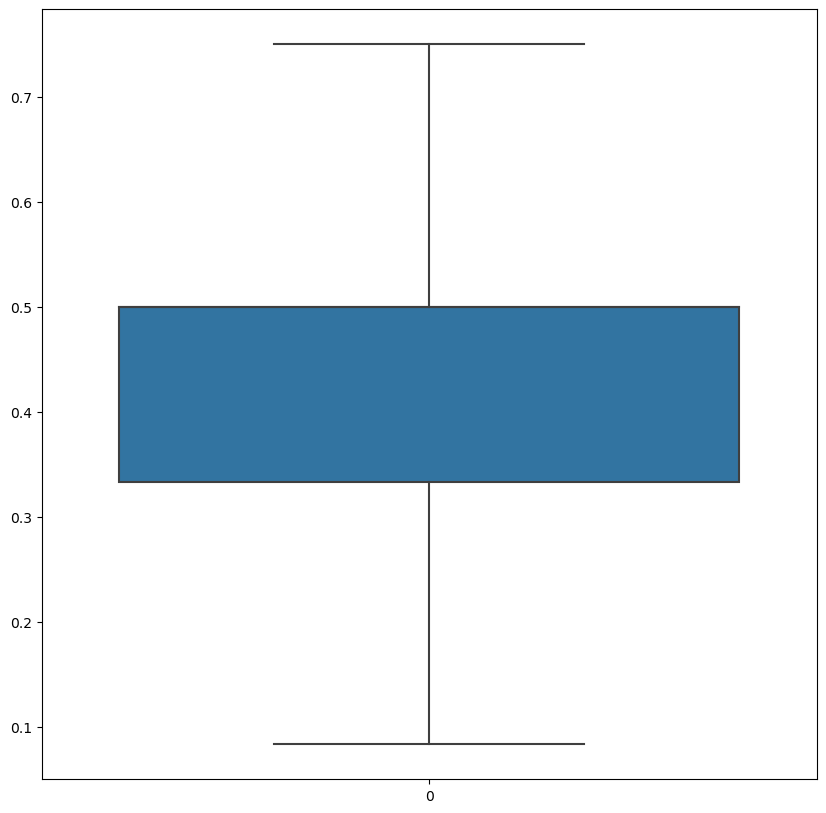

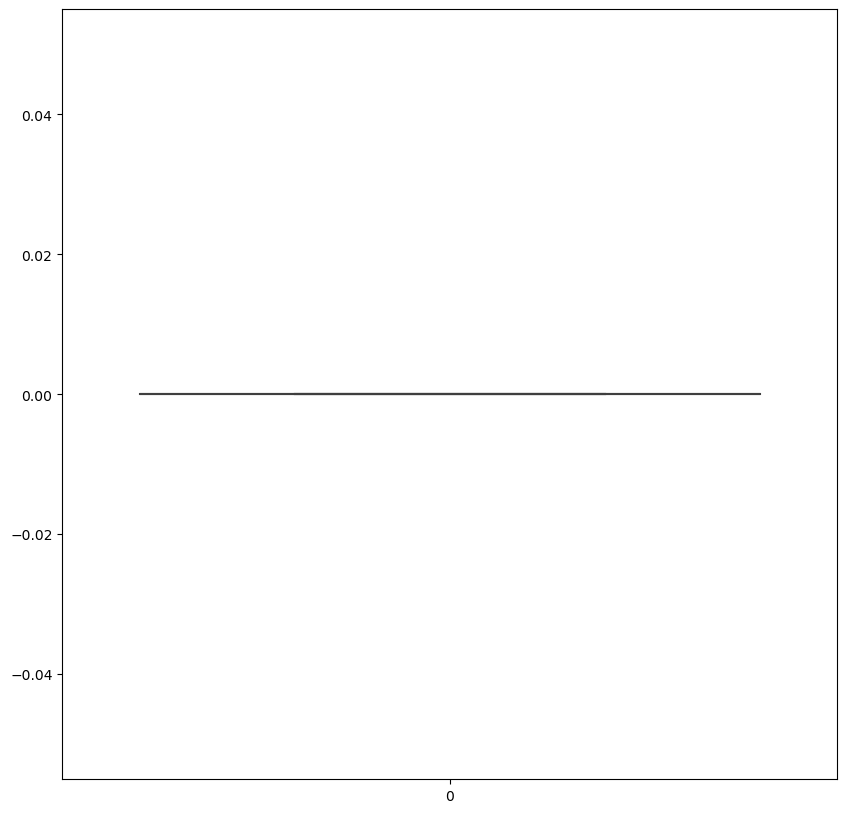

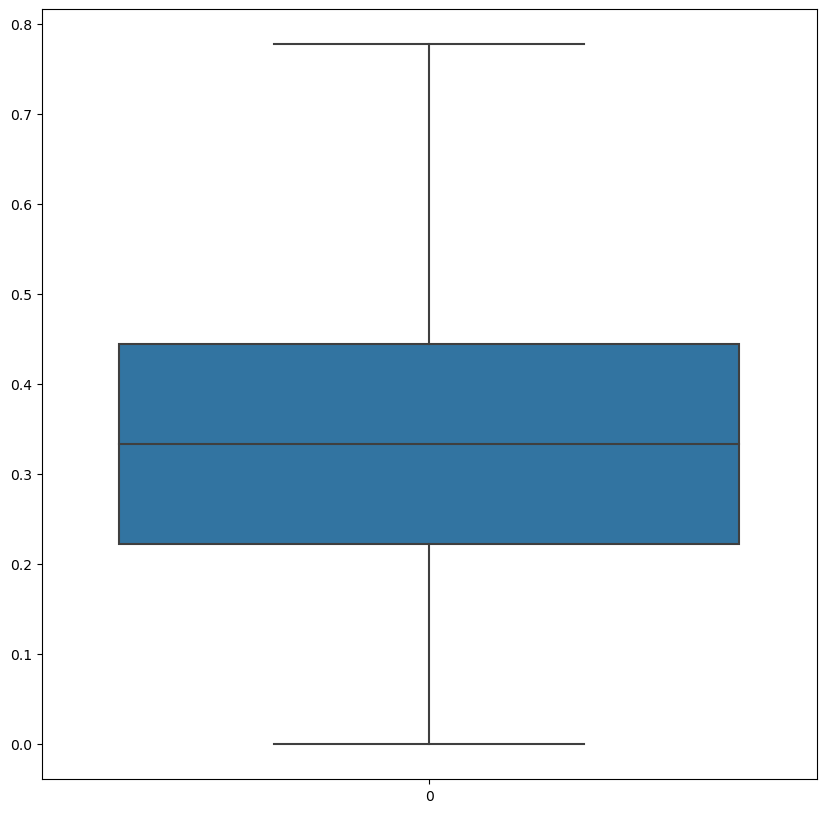

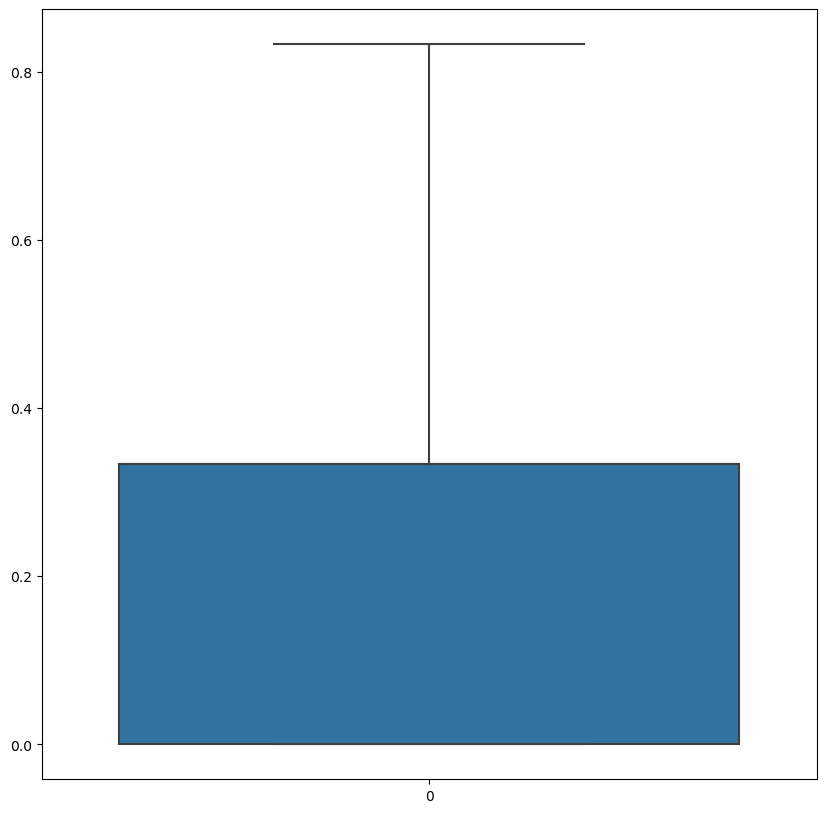

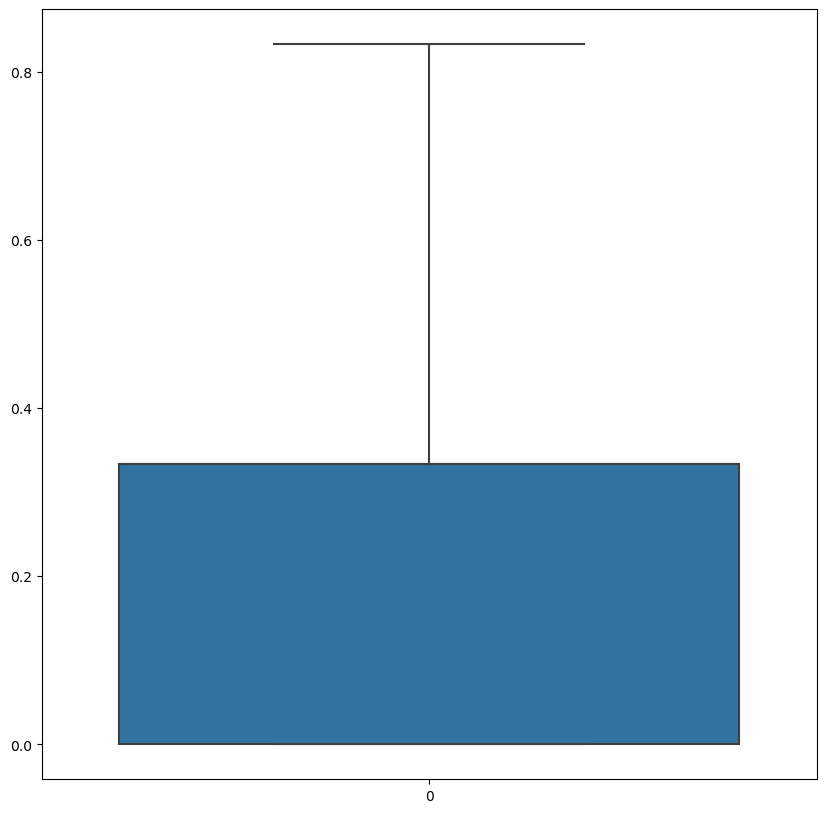

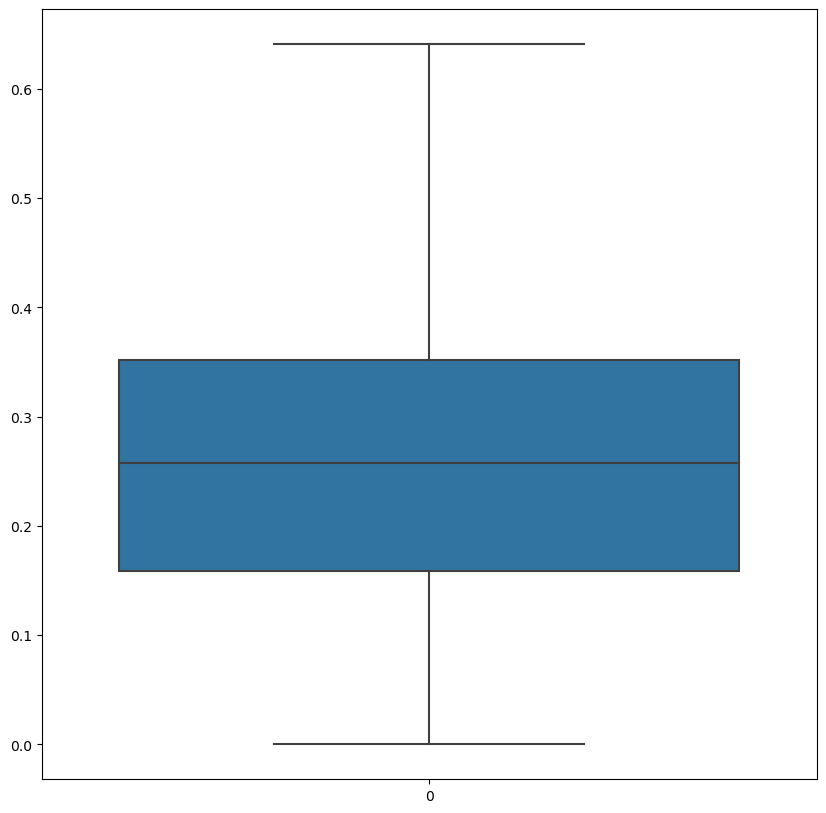

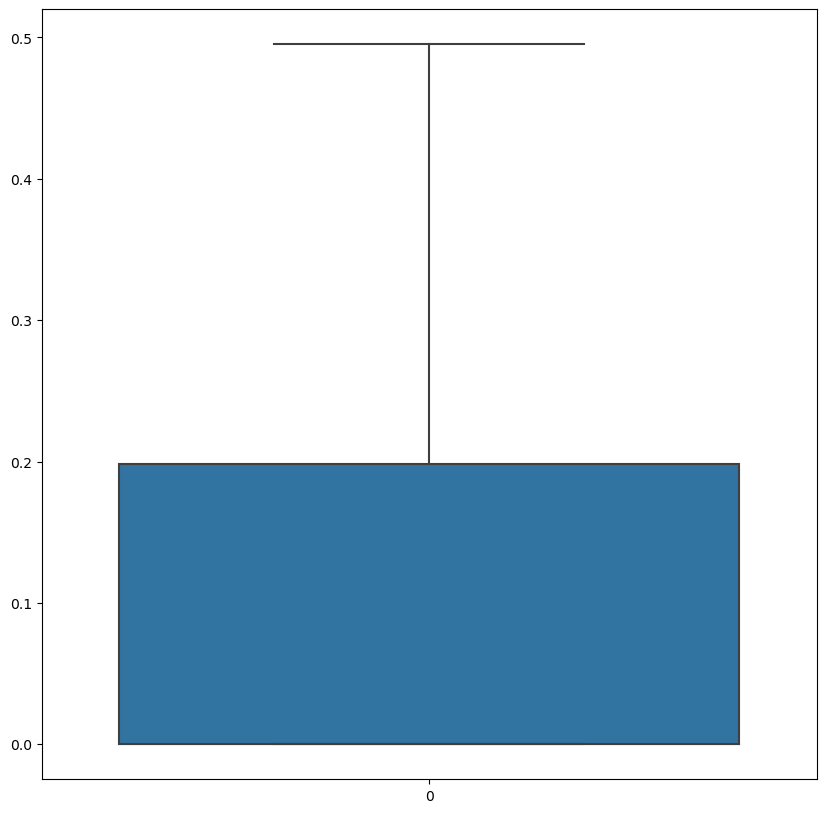

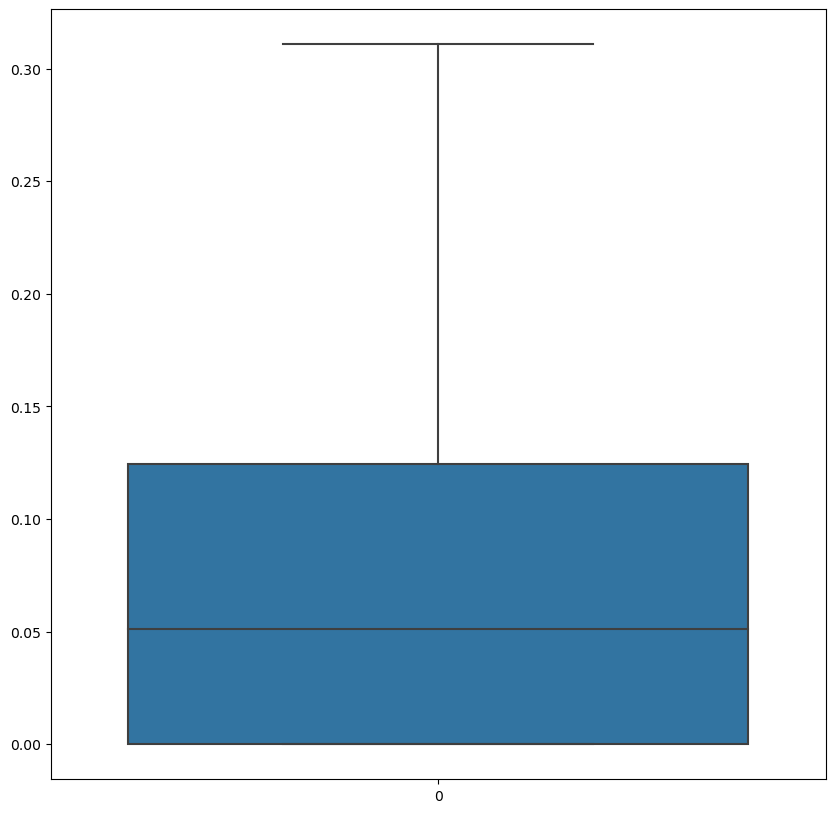

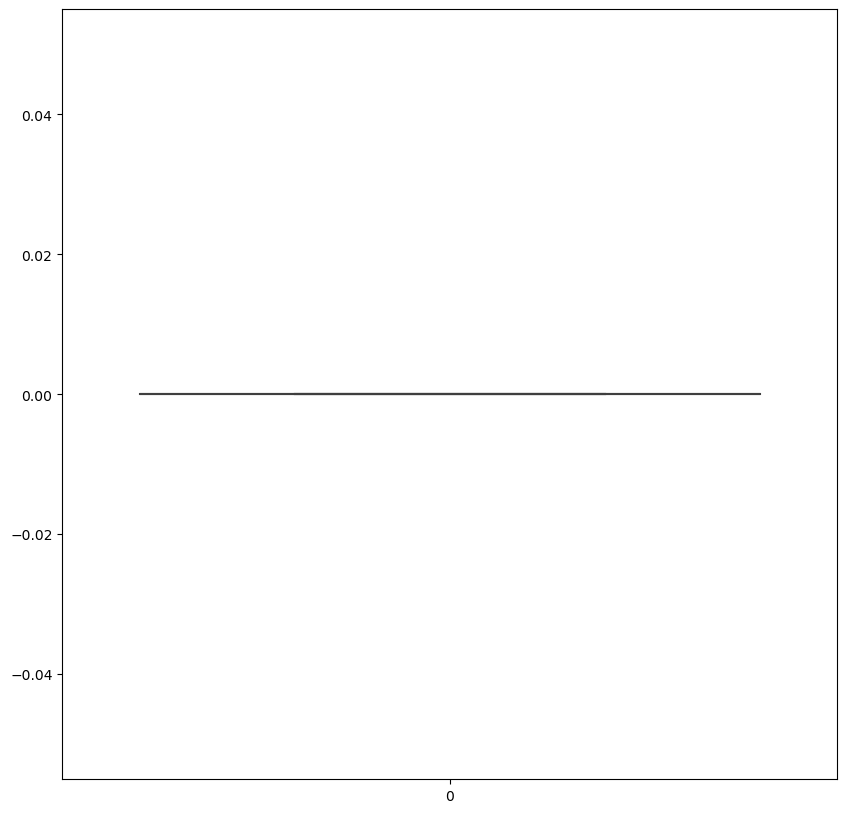

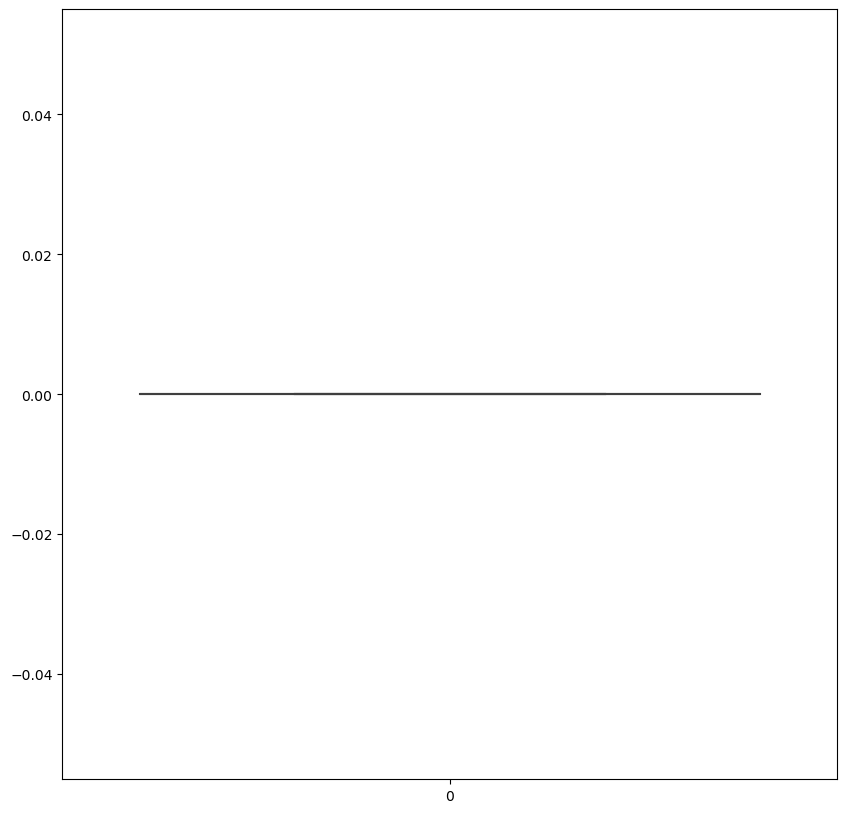

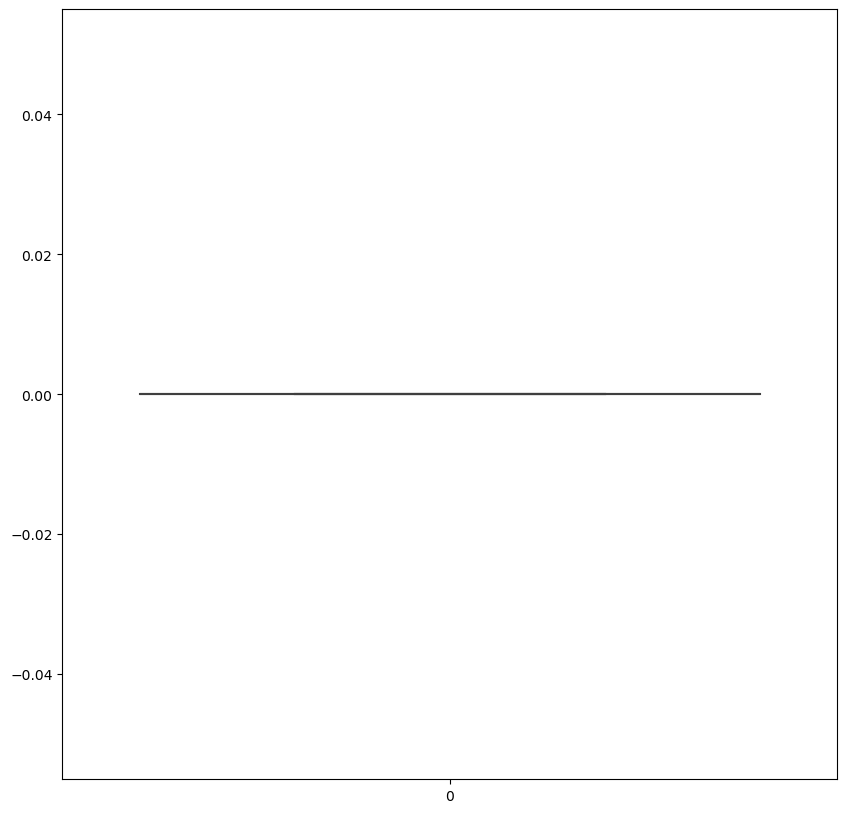

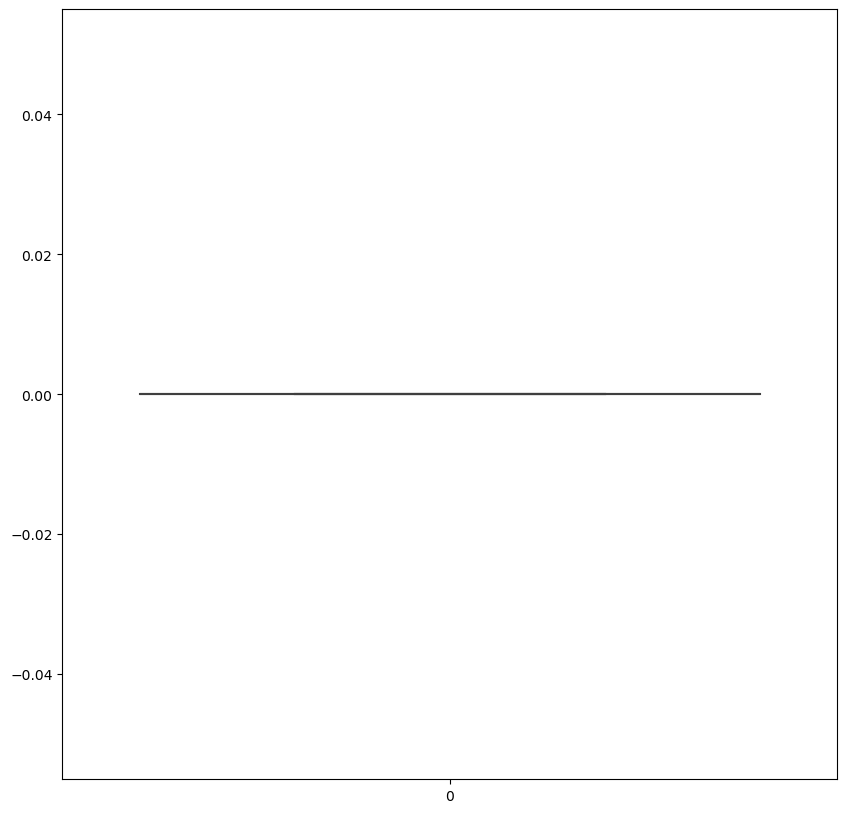

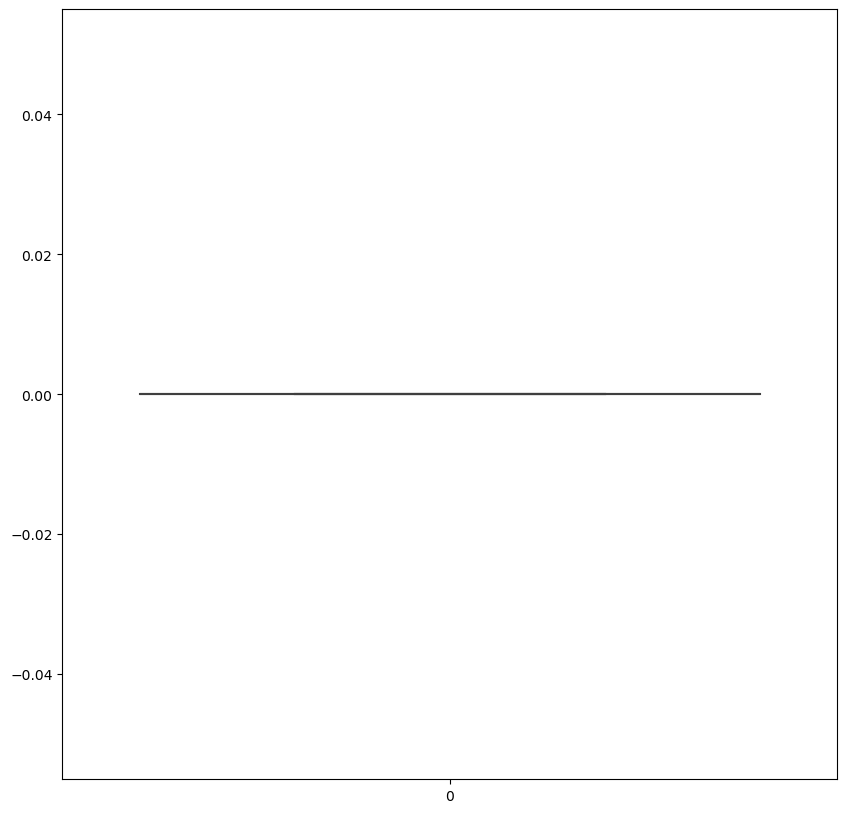

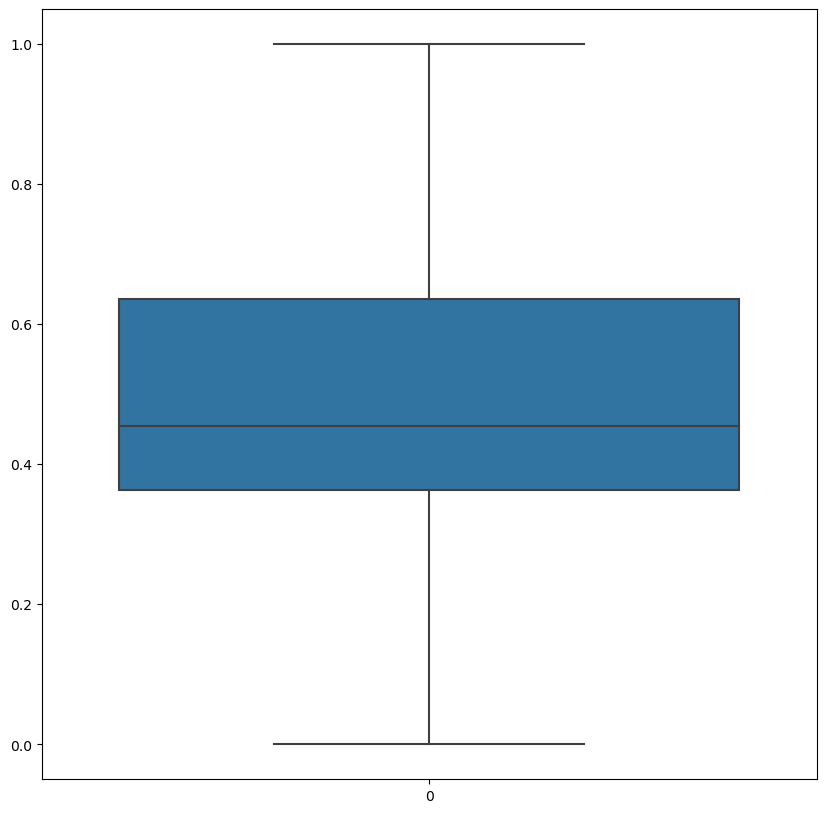

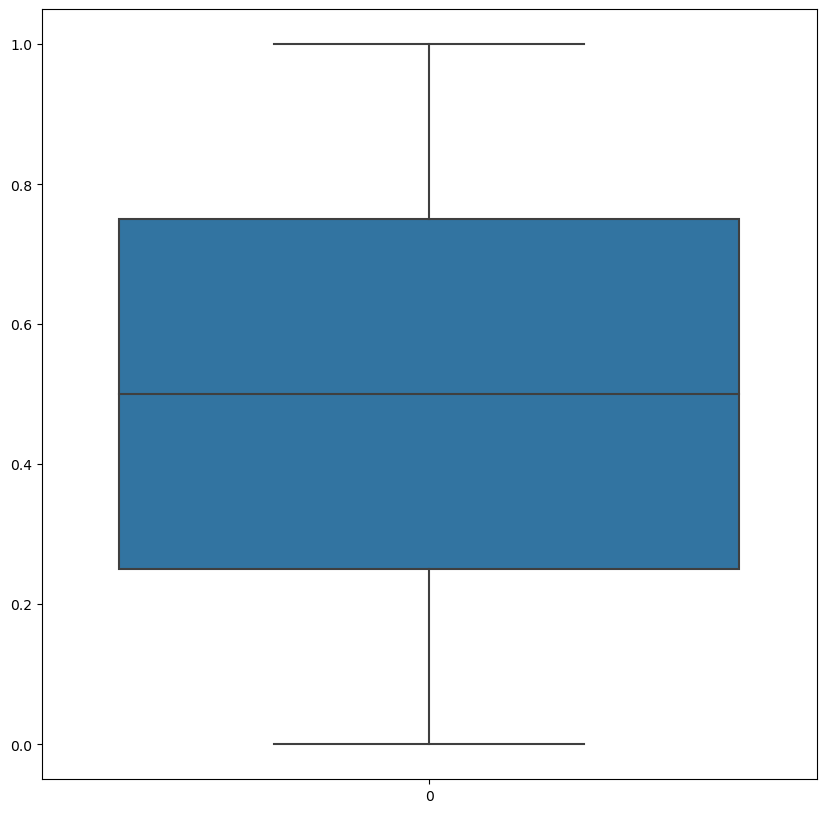

In [81]:
for i in num_cols:
    plt.figure(figsize=(10,10))
    sns.boxplot(data = df[i], orient = 'v')
    plt.show() 

In [82]:
df.drop('Id',axis = 1,inplace = True)

In [83]:
X = df.drop('SalePrice', axis=1)

# Copy target into the y dataframe. 
y = df[['SalePrice']]

## Splitting the data into training and testing set

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

## Ridge Regularisation

In [85]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [86]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 5.0}


In [87]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[[-2.18527345e-02  2.04929509e-02  7.05438247e-03  6.89293057e-02
   2.32682508e-02  2.00227810e-02  1.08239264e-02  3.44229205e-02
   0.00000000e+00  9.08563261e-03  3.44475040e-02  4.74623441e-02
   0.00000000e+00  4.75461366e-02  1.13211007e-02  0.00000000e+00
   4.84442717e-02  1.85429038e-02  1.72860405e-02  0.00000000e+00
   4.97264926e-02  3.29745836e-02  3.87725073e-02  2.87676299e-02
   1.91064632e-02  9.59585549e-03  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.41212760e-03
  -2.12004998e-03  9.14250248e-03  4.90801762e-04  6.91055985e-03
  -6.40888240e-04  1.36928352e-02  1.57036702e-02 -6.64747245e-03
  -8.62425062e-03  1.03645699e-02  7.87454396e-04  1.16901300e-02
   2.42974380e-02 -8.72872804e-03 -4.22895910e-03 -3.01674982e-03
   9.11320856e-03 -2.62515936e-03 -7.73086220e-04 -2.51834722e-03
   7.82637134e-04 -8.10015839e-03 -1.01922000e-02  2.50231836e-02
  -2.16255695e-02 -2.03319227e-02 -5.91981364e-03 -1.14717696e-02
  -1.60880

## R2 score, RSS and RMSE

In [88]:
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8767869953332796
0.8526196657765569
SalePrice    1.248589
dtype: float64
SalePrice    0.657543
dtype: float64
0.0016321425539483033
0.0019986104153236774


## Lasso Regularization

In [89]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [90]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [91]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [92]:
lasso.coef_

array([-2.20990976e-02,  4.70271100e-02,  0.00000000e+00,  1.15722214e-01,
        5.44009556e-02,  1.44352035e-02, -0.00000000e+00,  1.37215783e-01,
        0.00000000e+00, -0.00000000e+00,  9.38758271e-02,  1.06601308e-01,
        0.00000000e+00,  1.86668229e-01,  3.68526003e-04,  0.00000000e+00,
        5.76331822e-02,  1.66001756e-02,  0.00000000e+00,  0.00000000e+00,
        2.62517454e-02,  1.34193749e-02,  4.07640268e-02,  0.00000000e+00,
        1.15117567e-02, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -2.65406052e-04,
       -8.04420462e-04,  1.03701092e-02,  0.00000000e+00,  1.04469852e-03,
       -0.00000000e+00,  2.03999045e-02,  1.36485051e-02, -8.48554528e-04,
       -4.03450136e-03,  1.53637294e-02,  0.00000000e+00,  1.21741189e-02,
        3.16657600e-02, -1.42511676e-03, -0.00000000e+00,  1.44773542e-03,
        5.77633953e-03, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        3.74303189e-03, -

## R2 score, RSS and RMSE

In [93]:
y_pred_train = pd.Series(lasso.predict(X_train))
y_pred_test = pd.Series(lasso.predict(X_test))

y_pred_train = pd.DataFrame(y_pred_train)
y_pred_train.columns = ['SalePrice']

y_pred_test = pd.DataFrame(y_pred_test)
y_pred_test.columns = ['SalePrice']

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9027270251532035
0.8596578370447161
SalePrice    10.755534
dtype: float64
SalePrice    2.89144
dtype: float64
0.0012885276357478624
0.0019031664575155165


In [94]:
#RMSE on Training data
predicted_train=lasso.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

0.03589606713482498

In [95]:
#RMSE on Testing data
predicted_test=lasso.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

0.043625296073671715

In [96]:
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Ridge Regression': metric2
        }
lr_table = pd.DataFrame(lr_table)
lr_table

ls_metric = pd.Series(metric3, name = 'Lasso Regression')

In [97]:
final_metric = pd.concat([lr_table, ls_metric], axis = 1)

## Performance of Ridge and lasso Regularization

In [98]:
final_metric

Metric                      Ridge Regression  \
0  R2 Score (Train)                              0.876787   
1   R2 Score (Test)                               0.85262   
2       RSS (Train)  SalePrice    1.248589
dtype: float64   
3        RSS (Test)  SalePrice    0.657543
dtype: float64   
4       MSE (Train)                                0.0404   
5        MSE (Test)                              0.044706   

                        Lasso Regression  
0                               0.902727  
1                               0.859658  
2  SalePrice    10.755534
dtype: float64  
3    SalePrice    2.89144
dtype: float64  
4                               0.035896  
5                               0.043625

In [99]:
betas = pd.DataFrame(index=X.columns)

In [100]:
betas.rows = X.columns

In [101]:
betas.reset_index(inplace = True)

In [102]:
ridge_1 =  pd.DataFrame(ridge.coef_)
lasso_1 =  pd.DataFrame(lasso.coef_)

ridge_1 = ridge_1.T
lasso_1 = lasso_1.T


In [103]:
ridge_1.columns = ['Ridge']

In [104]:
lasso_1 = lasso_1.T

In [105]:
lasso_1.columns = ['Lasso']

In [106]:
final_df = pd.concat([betas,ridge_1,lasso_1],axis = 1)

## Coefficients provided by Ridge and Lasso Regularization

In [107]:
final_df.sort_values(by = 'Lasso',ascending = False)

index     Ridge     Lasso
13             GrLivArea  0.047546  0.186668
107     RoofMatl_WdShngl  0.042824  0.162880
7             BsmtFinSF1  0.034423  0.137216
3            OverallQual  0.068929  0.115722
11              1stFlrSF  0.047462  0.106601
..                   ...       ...       ...
179       KitchenQual_TA -0.033191 -0.029007
178       KitchenQual_Gd -0.038875 -0.033993
148          BsmtQual_TA -0.034555 -0.034284
113  Exterior1st_ImStucc -0.004807 -0.034557
147          BsmtQual_Gd -0.036428 -0.036901

[215 rows x 3 columns]

## Five most important predictor variables not available in the incoming data

In [108]:
not_available_incoming_variables = ['GrLivArea','RoofMatl_WdShngl','BsmtFinSF1','OverallQual','1stFlrSF']

In [109]:
X_train.drop(not_available_incoming_variables,axis = 1,inplace = True)


In [110]:
X_test.drop(not_available_incoming_variables,axis = 1,inplace = True)

## Ridge Regularization

In [111]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [112]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 7.0}


In [113]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 7
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[[-2.35183873e-02  2.72519624e-02  9.47296229e-03  2.67392664e-02
   2.36483133e-02  1.29330517e-02  0.00000000e+00  1.55674245e-02
   5.31241732e-02  0.00000000e+00  1.46687670e-02  0.00000000e+00
   6.16223576e-02  2.28316983e-02  2.28138802e-02  0.00000000e+00
   6.80790661e-02  4.20926941e-02  4.55078487e-02  3.52370604e-02
   2.41863455e-02  1.18093937e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -3.52624042e-05
  -3.19086499e-03  1.31670570e-02  2.28858756e-03  7.73501334e-03
   2.17001726e-03  2.03017162e-02  1.79777952e-02 -6.51869044e-03
  -8.23768745e-03  1.09217791e-02 -8.67051314e-04  1.27449363e-02
   2.78660079e-02 -1.12363452e-02 -5.73739875e-03 -2.89855562e-03
   1.04581042e-02 -5.01929712e-03 -1.24357377e-03 -1.73186413e-03
  -1.37561639e-03 -1.12119544e-02 -8.69242953e-03  3.16157367e-02
  -2.66439817e-02 -2.34839255e-02 -1.05980358e-02 -1.74625856e-02
  -1.99207827e-02 -1.09325544e-02 -2.07885422e-03 -9.73170176e-03
   8.12304

In [114]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8677505405029283
0.8290771017787831
SalePrice    1.340161
dtype: float64
SalePrice    0.762579
dtype: float64
0.001751844061961537
0.0023178688418790047


## Lasso Regularization

In [115]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [116]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [117]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [118]:
lasso.coef_

array([-2.97270207e-02,  4.92895632e-02,  0.00000000e+00,  5.63071907e-02,
        2.25551474e-02,  0.00000000e+00,  0.00000000e+00, -2.58733183e-02,
        4.40664745e-01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        7.39058392e-02,  2.58047897e-02,  0.00000000e+00,  0.00000000e+00,
        8.28287145e-02,  2.66435453e-02,  5.02802071e-02,  4.70188684e-03,
        2.60238748e-02, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  9.59794647e-04,
       -3.36235657e-03,  1.53214939e-02,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  3.11178956e-02,  1.07546547e-02, -7.18850122e-03,
       -2.98738406e-03,  1.32564010e-02, -0.00000000e+00,  1.05724555e-02,
        2.98900160e-02, -5.19103285e-03, -0.00000000e+00,  3.82095626e-04,
        7.00899701e-03, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        7.41828512e-03, -3.69451007e-03,  6.65032139e-03,  4.19586491e-02,
       -1.77374694e-02, -

In [119]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = pd.Series(lasso.predict(X_train))
y_pred_test = pd.Series(lasso.predict(X_test))

y_pred_train = pd.DataFrame(y_pred_train)
y_pred_train.columns = ['SalePrice']

y_pred_test = pd.DataFrame(y_pred_test)
y_pred_test.columns = ['SalePrice']

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8899342605454189
0.7940075375665407
SalePrice    10.66165
dtype: float64
SalePrice    2.971541
dtype: float64
0.0014579871465802328
0.0027934438001308045


In [120]:
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Ridge Regression': metric2
        }
lr_table = pd.DataFrame(lr_table)
lr_table

ls_metric = pd.Series(metric3, name = 'Lasso Regression')

In [121]:
final_metric = pd.concat([lr_table, ls_metric], axis = 1)

In [122]:
final_metric

Metric                      Ridge Regression  \
0  R2 Score (Train)                              0.867751   
1   R2 Score (Test)                              0.829077   
2       RSS (Train)  SalePrice    1.340161
dtype: float64   
3        RSS (Test)  SalePrice    0.762579
dtype: float64   
4       MSE (Train)                              0.041855   
5        MSE (Test)                              0.048144   

                       Lasso Regression  
0                              0.889934  
1                              0.794008  
2  SalePrice    10.66165
dtype: float64  
3  SalePrice    2.971541
dtype: float64  
4                              0.038184  
5                              0.052853

In [123]:
X.shape

(1094, 215)

In [124]:
X.drop(not_available_incoming_variables,axis = 1,inplace = True)


In [125]:
betas = pd.DataFrame(index=X.columns)

In [126]:
betas.rows = X.columns

In [127]:
betas.reset_index(inplace = True)

In [128]:
ridge_1 =  pd.DataFrame(ridge.coef_)
lasso_1 =  pd.DataFrame(lasso.coef_)

ridge_1 = ridge_1.T
lasso_1 = lasso_1.T


In [129]:
ridge_1.columns = ['Ridge']

In [130]:
lasso_1 = lasso_1.T

In [131]:
lasso_1.columns = ['Lasso']

In [132]:
final_df = pd.concat([betas,ridge_1,lasso_1],axis = 1)

In [133]:
final_df.sort_values(by = 'Lasso',ascending = False)

index     Ridge     Lasso
8             TotalBsmtSF  0.053124  0.440665
89      HouseStyle_2.5Fin  0.027257  0.193357
60   Neighborhood_NoRidge  0.081230  0.113306
16           TotRmsAbvGrd  0.068079  0.082829
67   Neighborhood_StoneBr  0.049704  0.082562
..                    ...       ...       ...
84        BldgType_Duplex -0.018157 -0.040755
141           BsmtQual_Fa -0.035368 -0.040992
173        KitchenQual_Gd -0.047542 -0.044461
143           BsmtQual_TA -0.042744 -0.046311
142           BsmtQual_Gd -0.043201 -0.046416

[210 rows x 3 columns]